In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-car-safety-seats/Child Car Safety Seats.csv


https://www.kaggle.com/datasets/motahareshokri/child-car-safety-seats

In [2]:
import pandas as pd
import numpy as np
import warnings

# Ignore FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/kaggle/input/child-car-safety-seats/Child Car Safety Seats.csv")
df

sales  comp_price  income  advertising  population  price shelveLoc  age  \
0     9.50         138      73           11         276    120       Bad   42   
1    11.22         111      48           16         260     83      Good   65   
2    10.06         113      35           10         269     80    Medium   59   
3     7.40         117     100            4         466     97    Medium   55   
4     4.15         141      64            3         340    128       Bad   38   
..     ...         ...     ...          ...         ...    ...       ...  ...   
395  12.57         138     108           17         203    128      Good   33   
396   6.14         139      23            3          37    120    Medium   55   
397   7.41         162      26           12         368    159    Medium   40   
398   5.94         100      79            7         284     95       Bad   50   
399   9.71         134      37            0          27    120      Good   49   

     education urban   us  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# Split Dataset

In [4]:
from sklearn.model_selection import train_test_split
#x = df.drop('MEDV', axis=1) 
#y = df['MEDV'] 

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("X_train shape:", df_train.shape)
#print("y_train shape:", y_train.shape)
print("X_test shape:", df_test.shape)
#print("y_test shape:", y_test.shape)

X_train shape: (320, 11)
X_test shape: (80, 11)


# EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train.head()

sales  comp_price  income  advertising  population  price shelveLoc  age  \
3     7.40         117     100            4         466     97    Medium   55   
18   13.91         110     110            0         408     68      Good   46   
202   4.10         121      78            4         413    130       Bad   46   
250   9.16         137     105           10         435    156      Good   72   
274   7.22         135      93            2          67    119    Medium   34   

     education urban   us  
3           14   Yes  Yes  
18          17    No  Yes  
202         10    No  Yes  
250         14   Yes  Yes  
274         11   Yes  Yes

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 3 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales        320 non-null    float64
 1   comp_price   320 non-null    int64  
 2   income       320 non-null    int64  
 3   advertising  320 non-null    int64  
 4   population   320 non-null    int64  
 5   price        320 non-null    int64  
 6   shelveLoc    320 non-null    object 
 7   age          320 non-null    int64  
 8   education    320 non-null    int64  
 9   urban        320 non-null    object 
 10  us           320 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 30.0+ KB


In [8]:
df_train.describe()

sales  comp_price      income  advertising  population  \
count  320.000000  320.000000  320.000000   320.000000  320.000000   
mean     7.388188  124.634375   68.212500     6.509375  271.646875   
std      2.726779   15.493170   28.496579     6.630407  145.180691   
min      0.000000   85.000000   21.000000     0.000000   10.000000   
25%      5.327500  115.000000   42.000000     0.000000  148.000000   
50%      7.425000  124.000000   68.000000     5.000000  281.000000   
75%      9.180000  134.000000   92.000000    12.000000  402.000000   
max     15.630000  175.000000  120.000000    29.000000  509.000000   

            price         age   education  
count  320.000000  320.000000  320.000000  
mean   116.121875   53.321875   13.825000  
std     23.594022   16.453587    2.596236  
min     49.000000   25.000000   10.000000  
25%    100.750000   39.000000   12.000000  
50%    116.500000   55.000000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

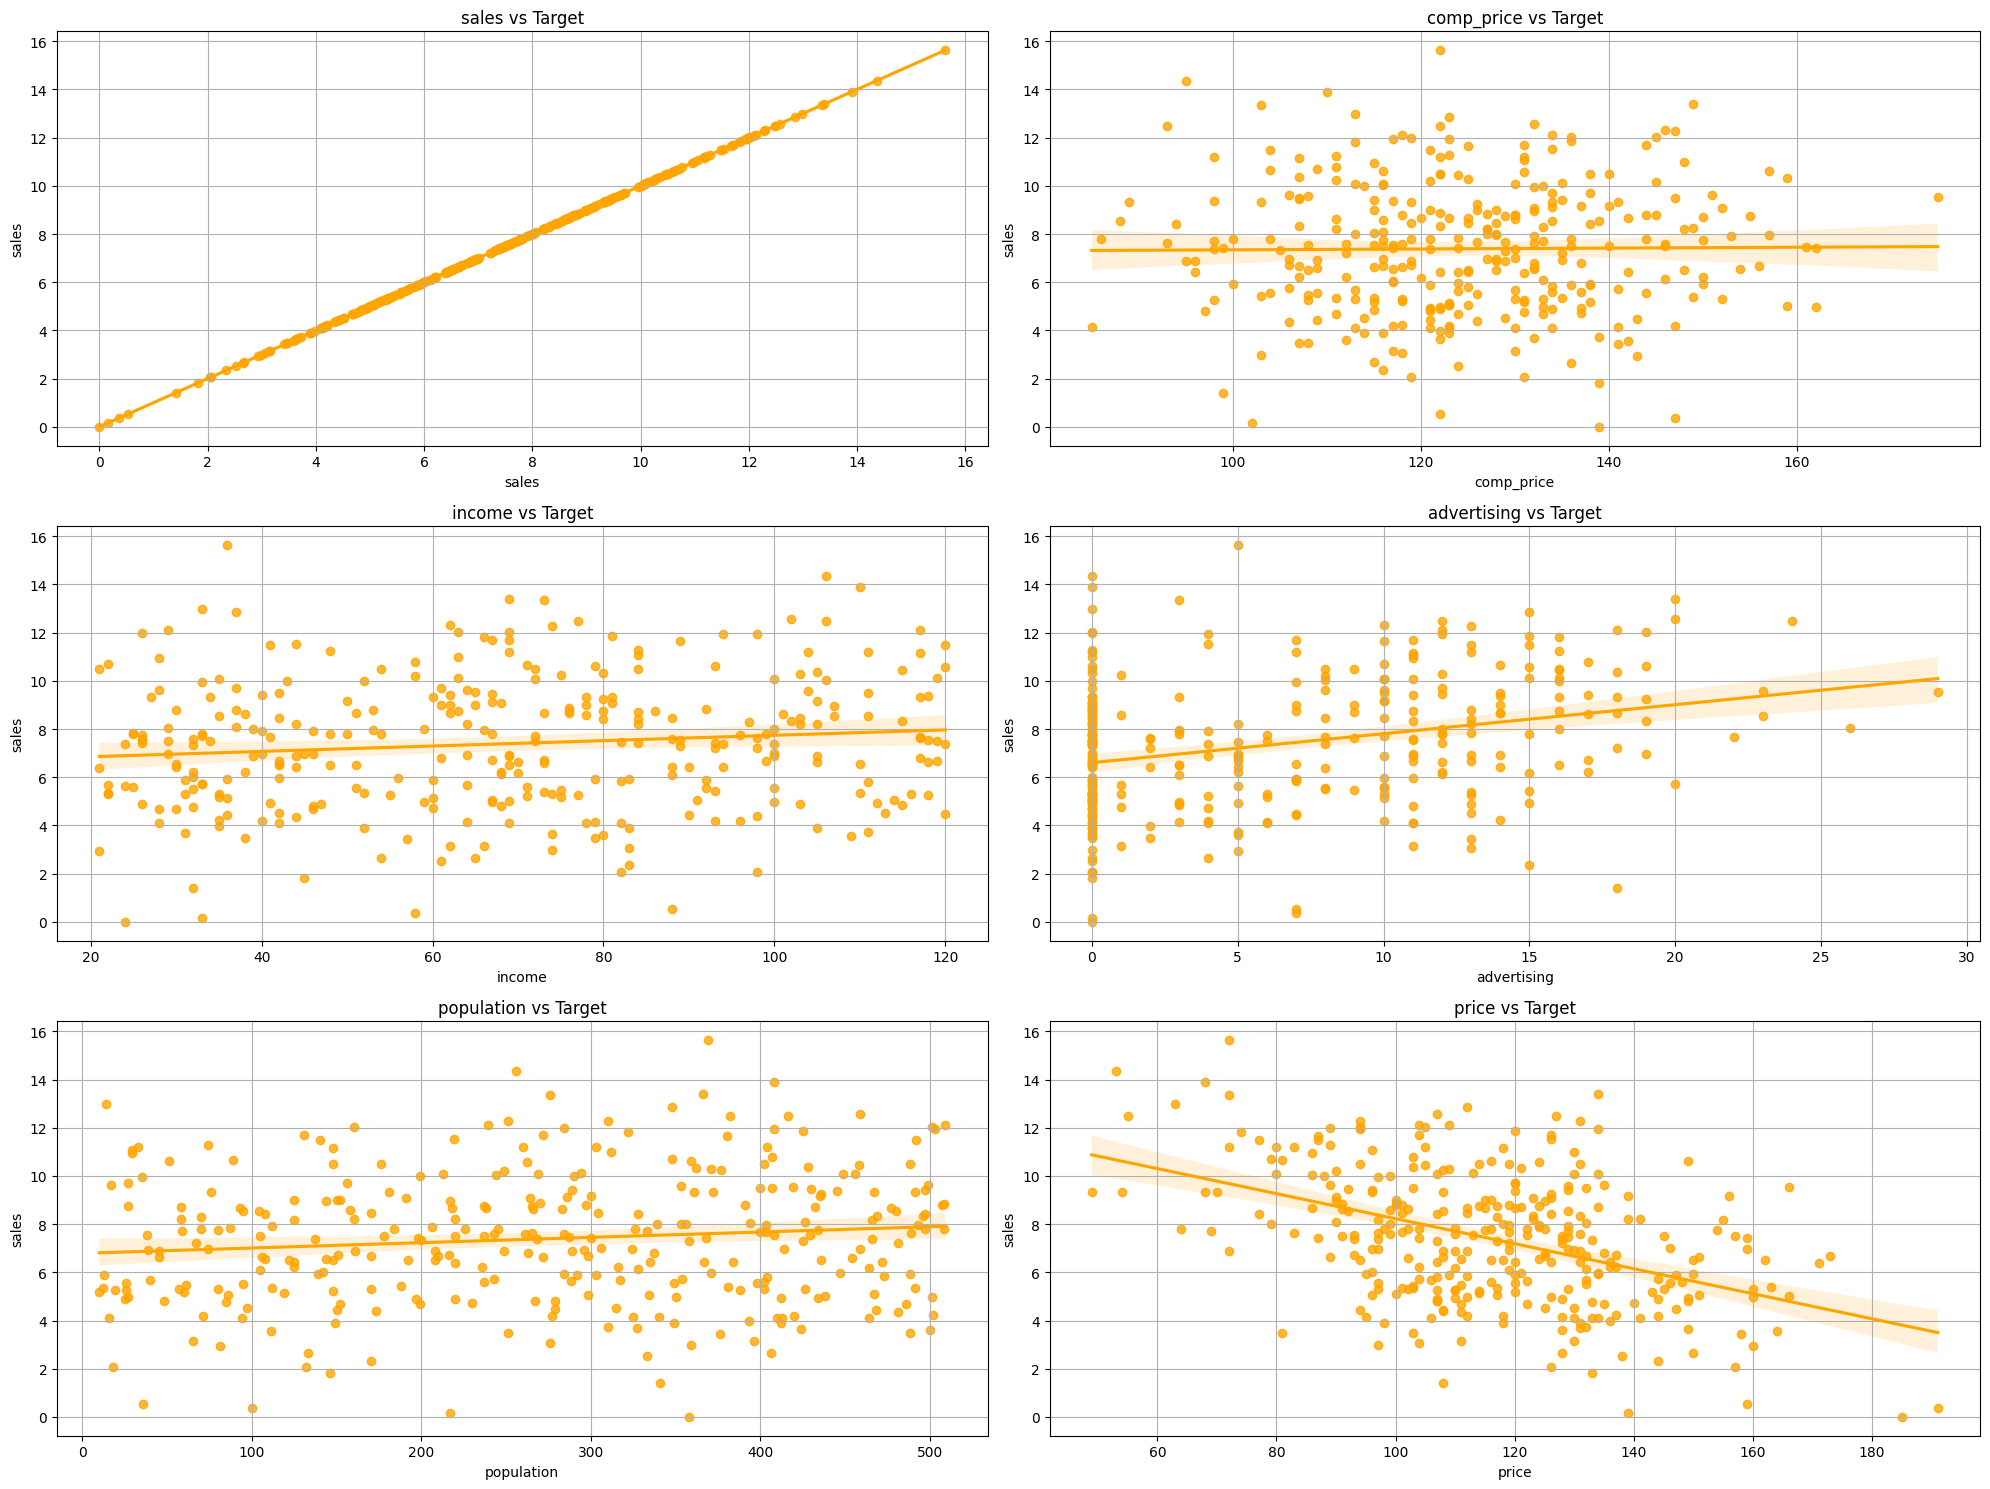

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x_train_sorted = df_train.select_dtypes(include=np.number)
y_train_sorted = df_train['sales']
# Ensure x_train_sorted is a DataFrame and y_train_sorted is a Series
if not isinstance(x_train_sorted, pd.DataFrame):
    x_train_sorted = pd.DataFrame(x_train_sorted)
if not isinstance(y_train_sorted, pd.Series):
    y_train_sorted = pd.Series(y_train_sorted, name='sales')

# Create the subplot grid
fig, ax1 = plt.subplots(3, 2, figsize=(20, 15))

# List of columns to plot
columns = df_train.select_dtypes(include=np.number).columns
k = 0

# Plot regression plots for each feature
for i in range(3):
    for j in range(2):
        # Use keyword arguments x and y for sns.regplot
        sns.regplot(x=x_train_sorted[columns[k]], y=y_train_sorted, ax=ax1[i][j], color="orange")
        ax1[i][j].grid(True)
        ax1[i][j].set_title(f"{columns[k]} vs Target")  # Optional: Add title for clarity
        k += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

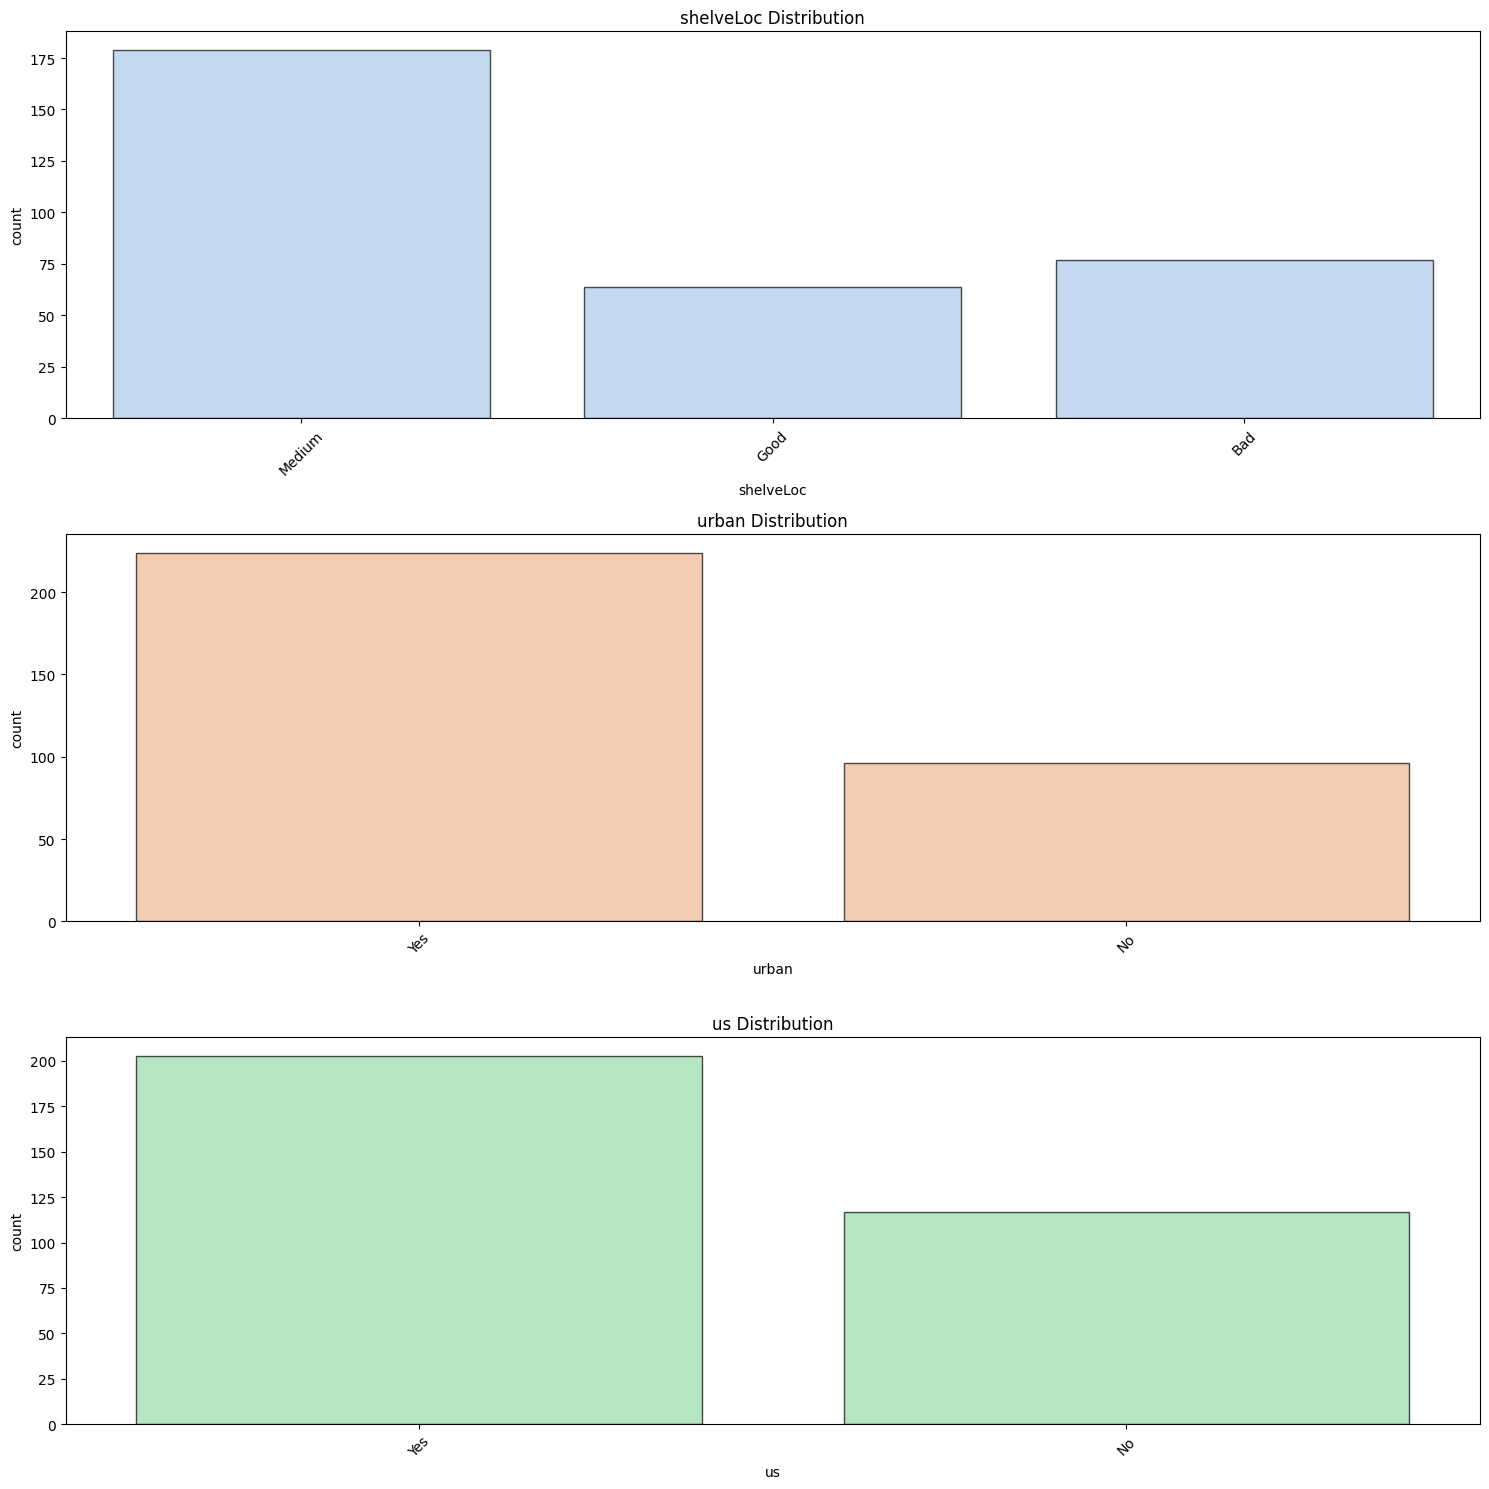

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select categorical columns from df_train
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns

# Set pastel color palette
pastel_colors = sns.color_palette("pastel")

# Create subplots for count plots
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(15, 5 * len(categorical_cols)))

# Handle case when there's only one categorical column (axes will not be a 2D array)
if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    # Count plot for categorical data
    sns.countplot(data=df_train, x=col, ax=axes[idx], 
                  color=pastel_colors[idx % len(pastel_colors)], 
                  edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate x labels if needed for readability

# Adjust layout
plt.tight_layout()
plt.show()

## Check target label that dataset is balance or not

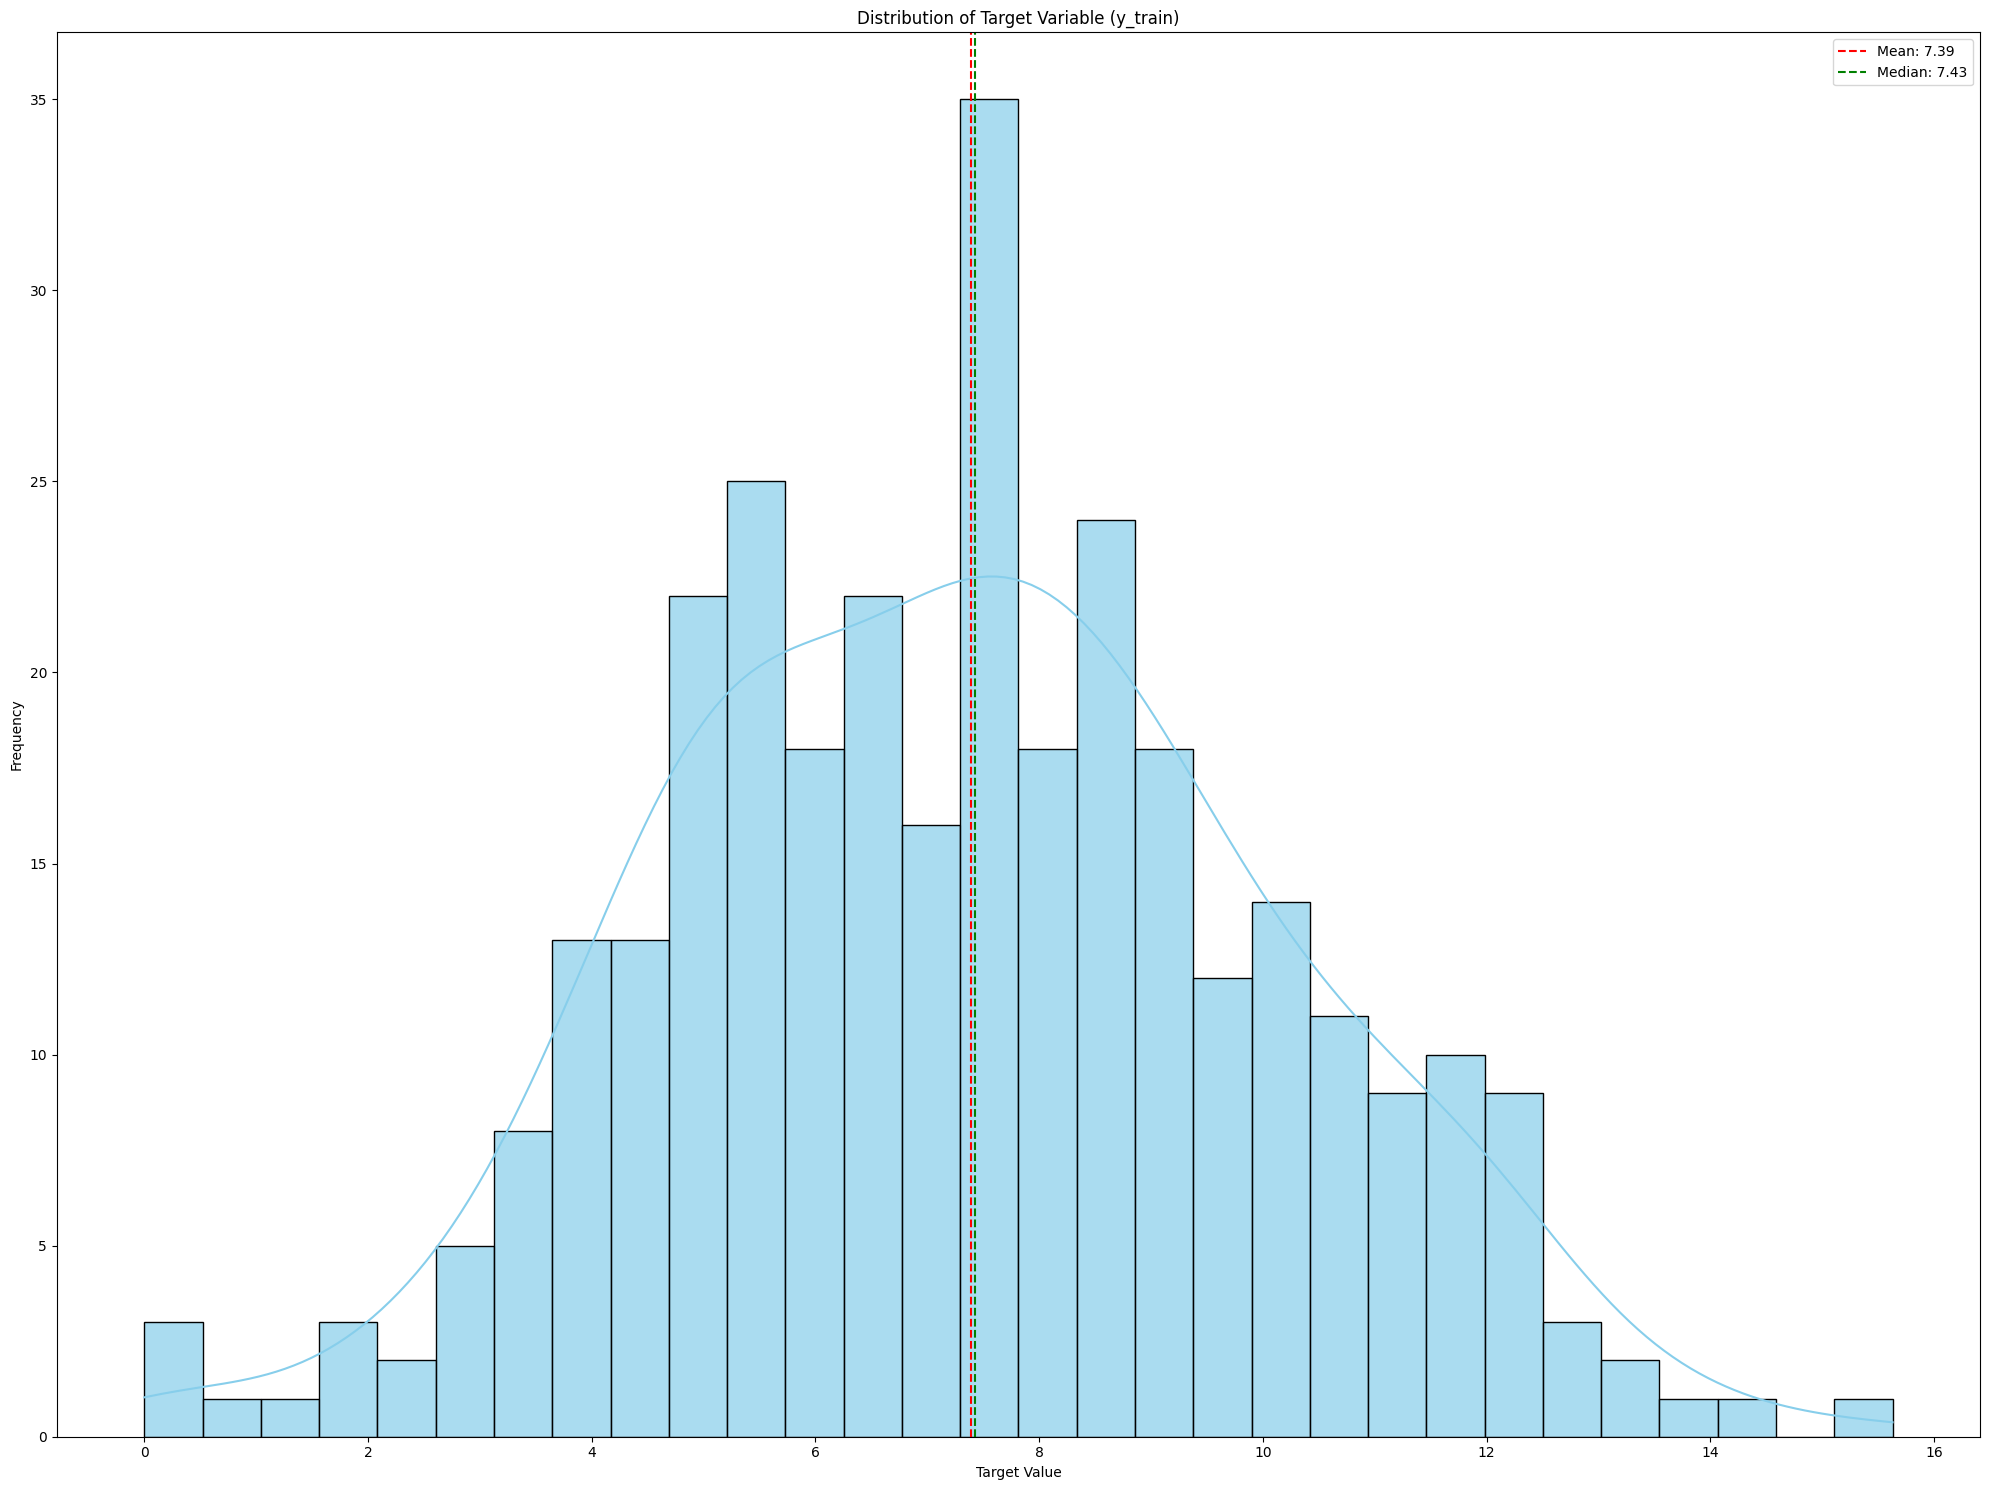

Basic Statistics of y_train:
count    320.000000
mean       7.388188
std        2.726779
min        0.000000
25%        5.327500
50%        7.425000
75%        9.180000
max       15.630000
Name: sales, dtype: float64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y_train = df_train['sales']
# Ensure y_train is a pandas Series or convert it
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='target')

# Create a figure with a single subplot
plt.figure(figsize=(20, 15))

# Plot histogram with KDE
sns.histplot(data=y_train, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Target Variable (y_train)')
plt.xlabel('Target Value')
plt.ylabel('Frequency')

# Add vertical lines for mean and median to assess skewness
plt.axvline(y_train.mean(), color='red', linestyle='--', label=f'Mean: {y_train.mean():.2f}')
plt.axvline(y_train.median(), color='green', linestyle='--', label=f'Median: {y_train.median():.2f}')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print basic statistics for further insight
print("Basic Statistics of y_train:")
print(y_train.describe())

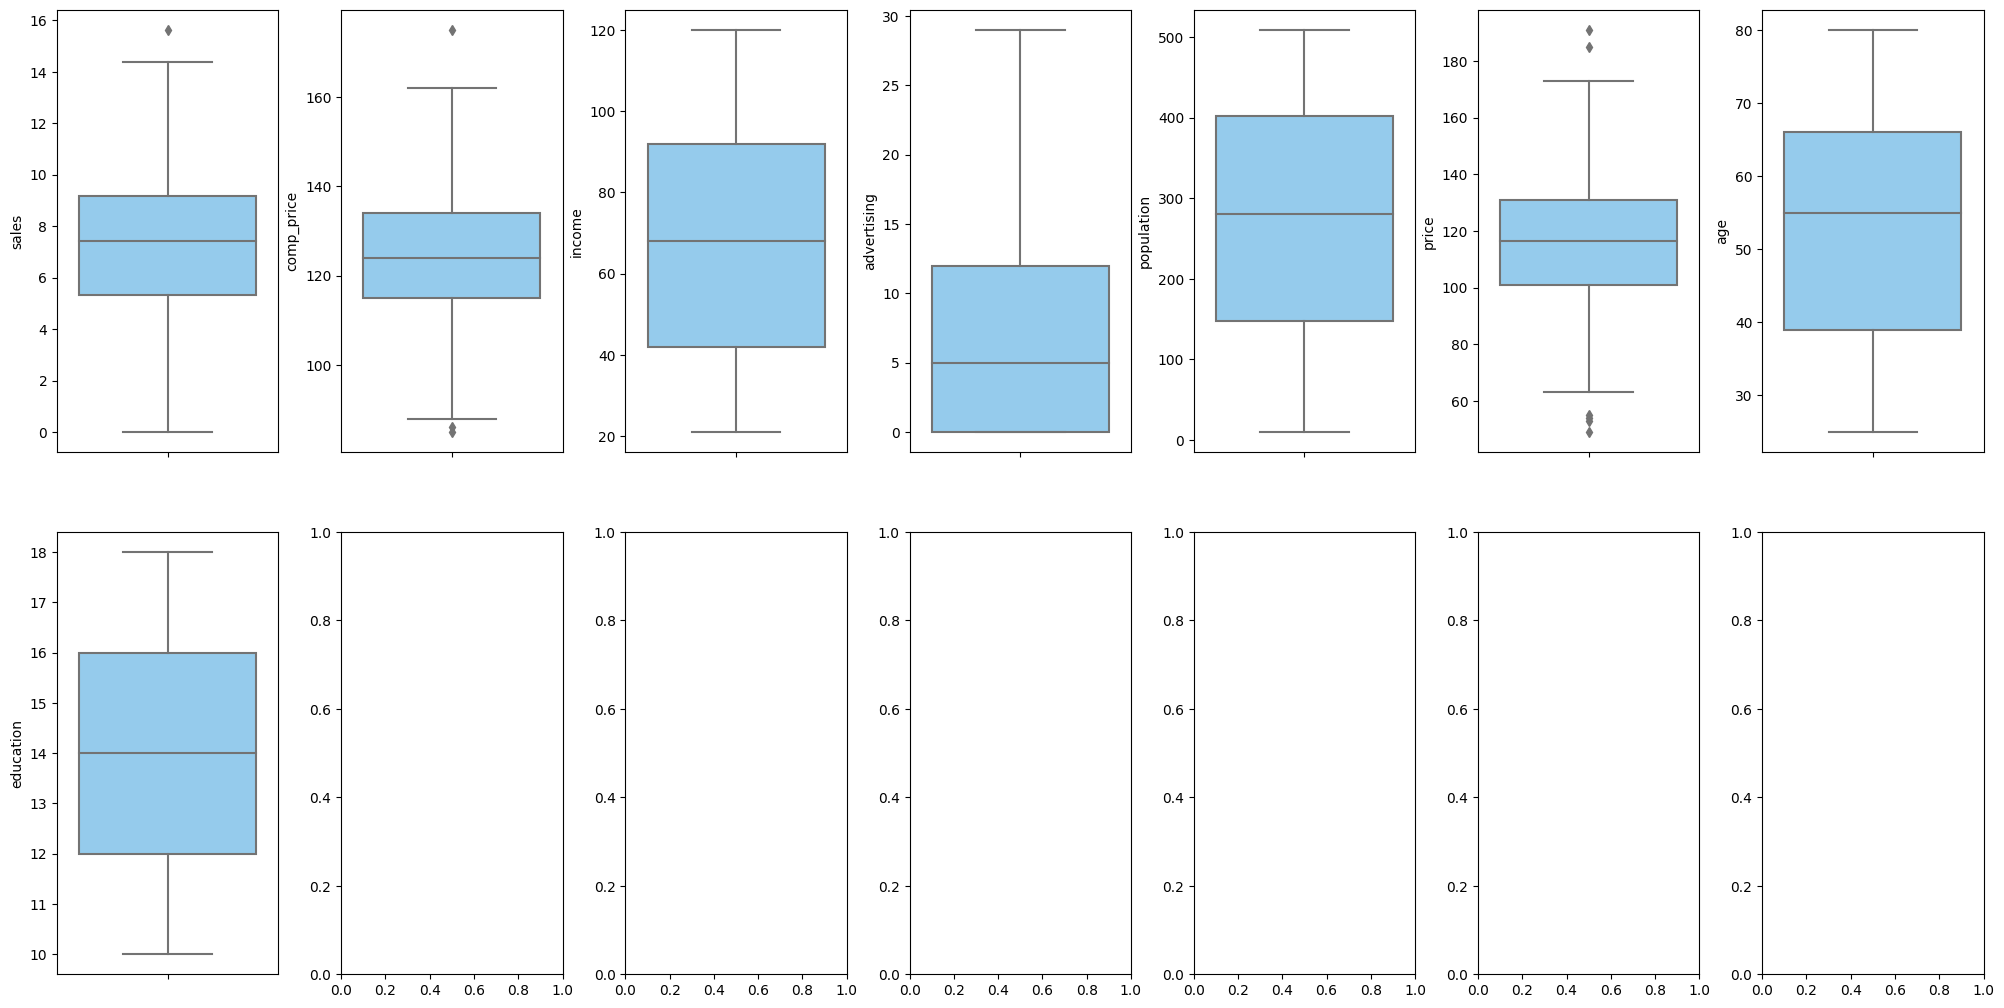

Column sales outliers = 0.31%
Column comp_price outliers = 0.94%
Column income outliers = 0.00%
Column advertising outliers = 0.00%
Column population outliers = 0.00%
Column price outliers = 1.88%
Column age outliers = 0.00%
Column education outliers = 0.00%


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create subplots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

# Filter numeric columns and create boxplots
for k, v in df_train.select_dtypes(include=['int64', 'float64']).items():
    sns.boxplot(y=v, data=df_train, ax=axs[index], color="lightskyblue")
    index += 1

# Adjust layout
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Calculate and print outlier percentages for numeric columns
for k, v in df_train.select_dtypes(include=['int64', 'float64']).items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_train)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

## Correlation Analysis

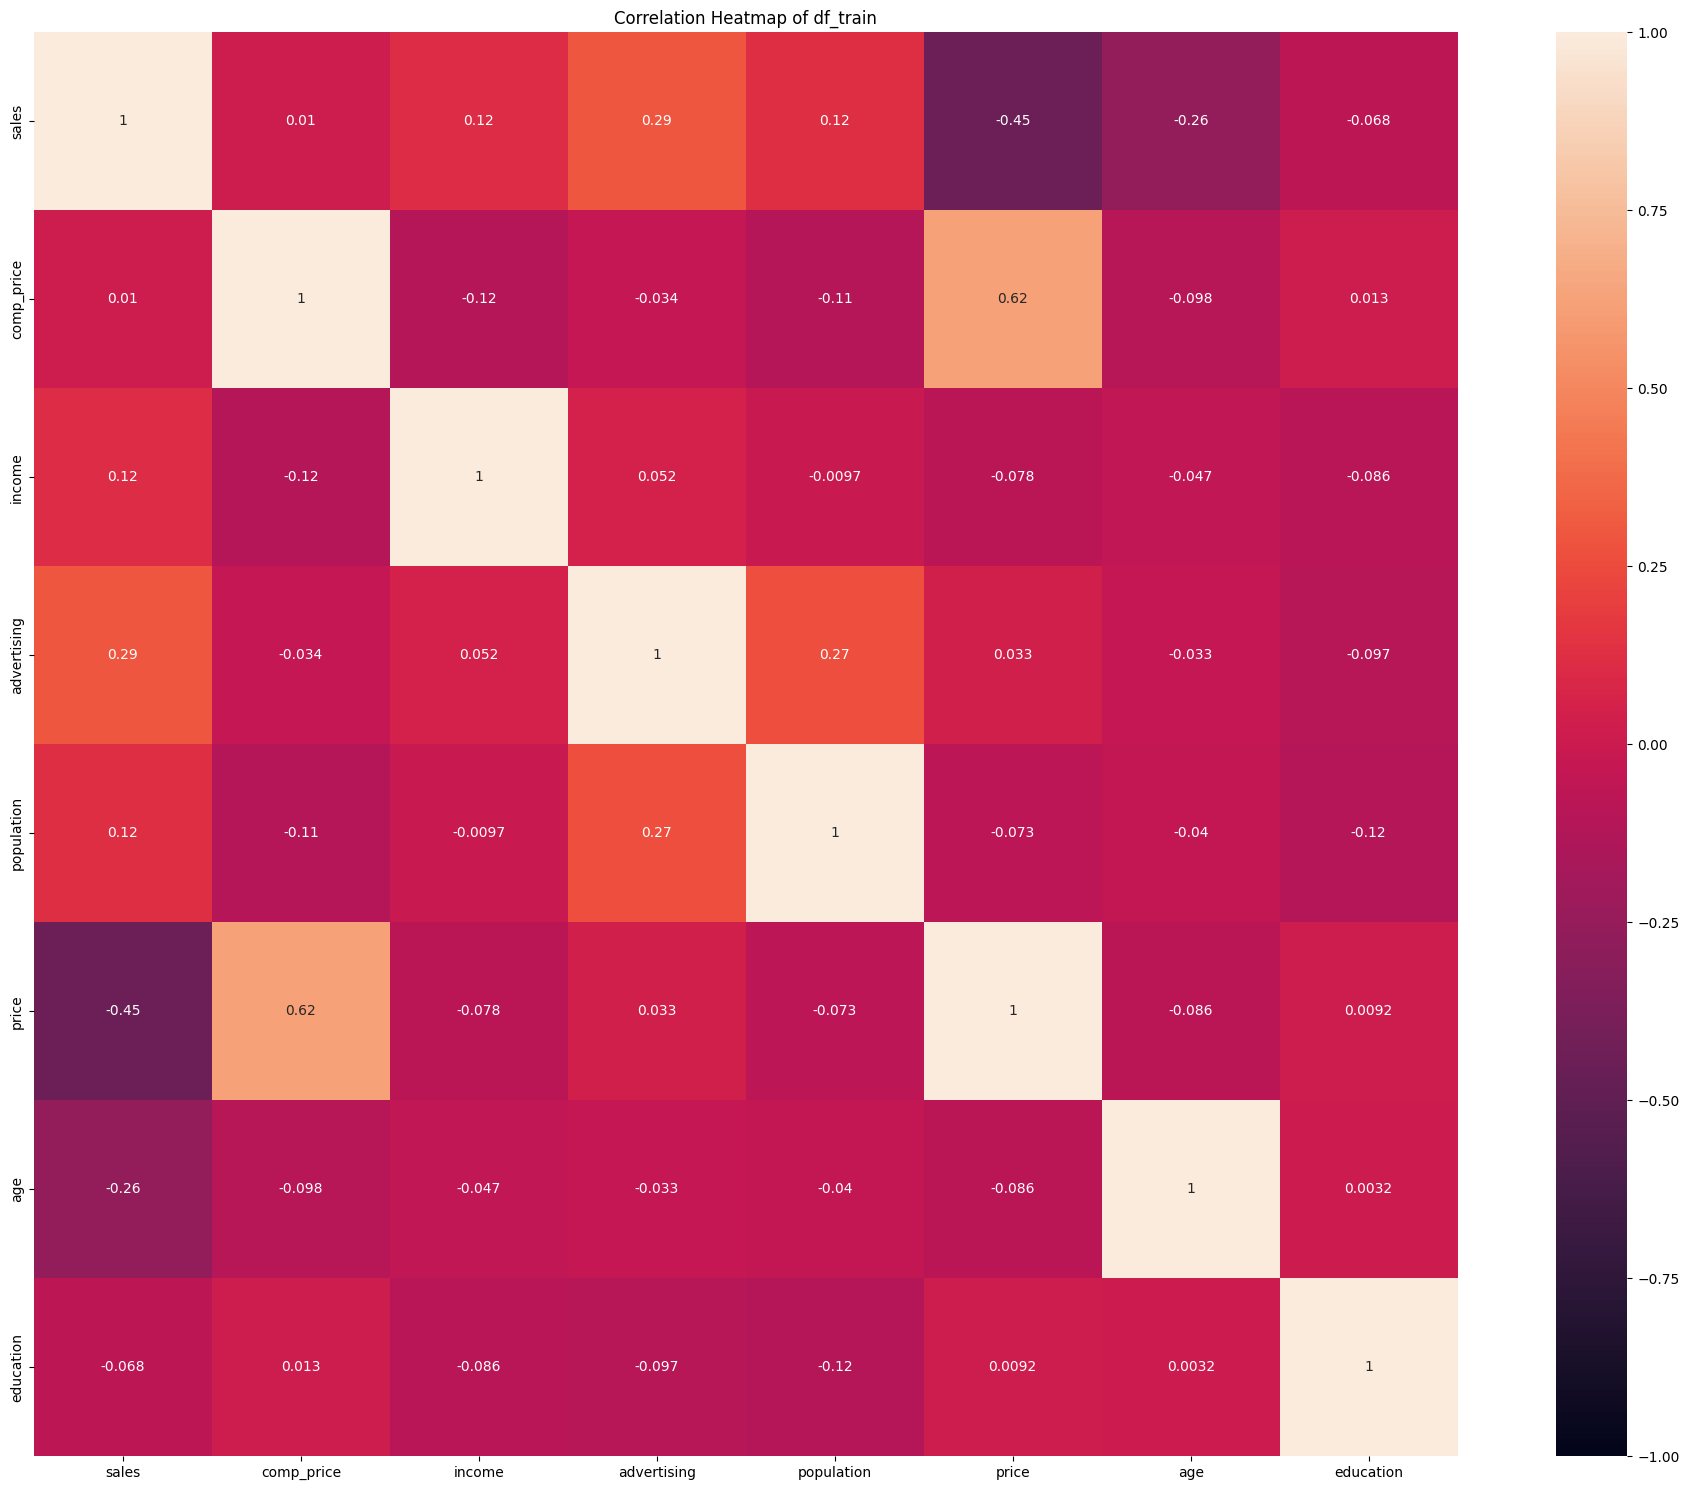

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate correlation matrix for numeric columns in df_train
numeric_df = df_train.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

# Create correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', vmin=-1, vmax=1, center=0, square=True)
plt.title('Correlation Heatmap of df_train')
plt.tight_layout()
plt.show()

## Feature Engineer

In [14]:
y_train = df_train['sales'] 
x_train = df_train.drop('sales', axis=1) 
y_test = df_test['sales'] 
x_test = df_test.drop('sales', axis=1) 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 10)
y_train shape: (320,)
X_test shape: (80, 10)
y_test shape: (80,)


In [15]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Initialize the Ordinal Encoder with handling for unknown categories
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder to the training data and transform it
x_train_encoded = encoder.fit_transform(x_train)

# Transform the test data using the fitted encoder
x_test_encoded = encoder.transform(x_test)

# Convert the encoded arrays back to Pandas DataFrames
x_train = pd.DataFrame(x_train_encoded, columns=x_train.columns)
x_test = pd.DataFrame(x_test_encoded, columns=x_test.columns)

# Display information about x_train
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comp_price   320 non-null    float64
 1   income       320 non-null    float64
 2   advertising  320 non-null    float64
 3   population   320 non-null    float64
 4   price        320 non-null    float64
 5   shelveLoc    320 non-null    float64
 6   age          320 non-null    float64
 7   education    320 non-null    float64
 8   urban        320 non-null    float64
 9   us           320 non-null    float64
dtypes: float64(10)
memory usage: 25.1 KB


In [16]:
x_train_nopca = x_train.copy()
x_test_nopca = x_test.copy()

In [17]:
from sklearn.decomposition import PCA # Import PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions.  Adjust as needed.
x_train = pca.fit_transform(x_train) # Use the encoded data
x_test = pca.transform(x_test)    # Use the encoded data

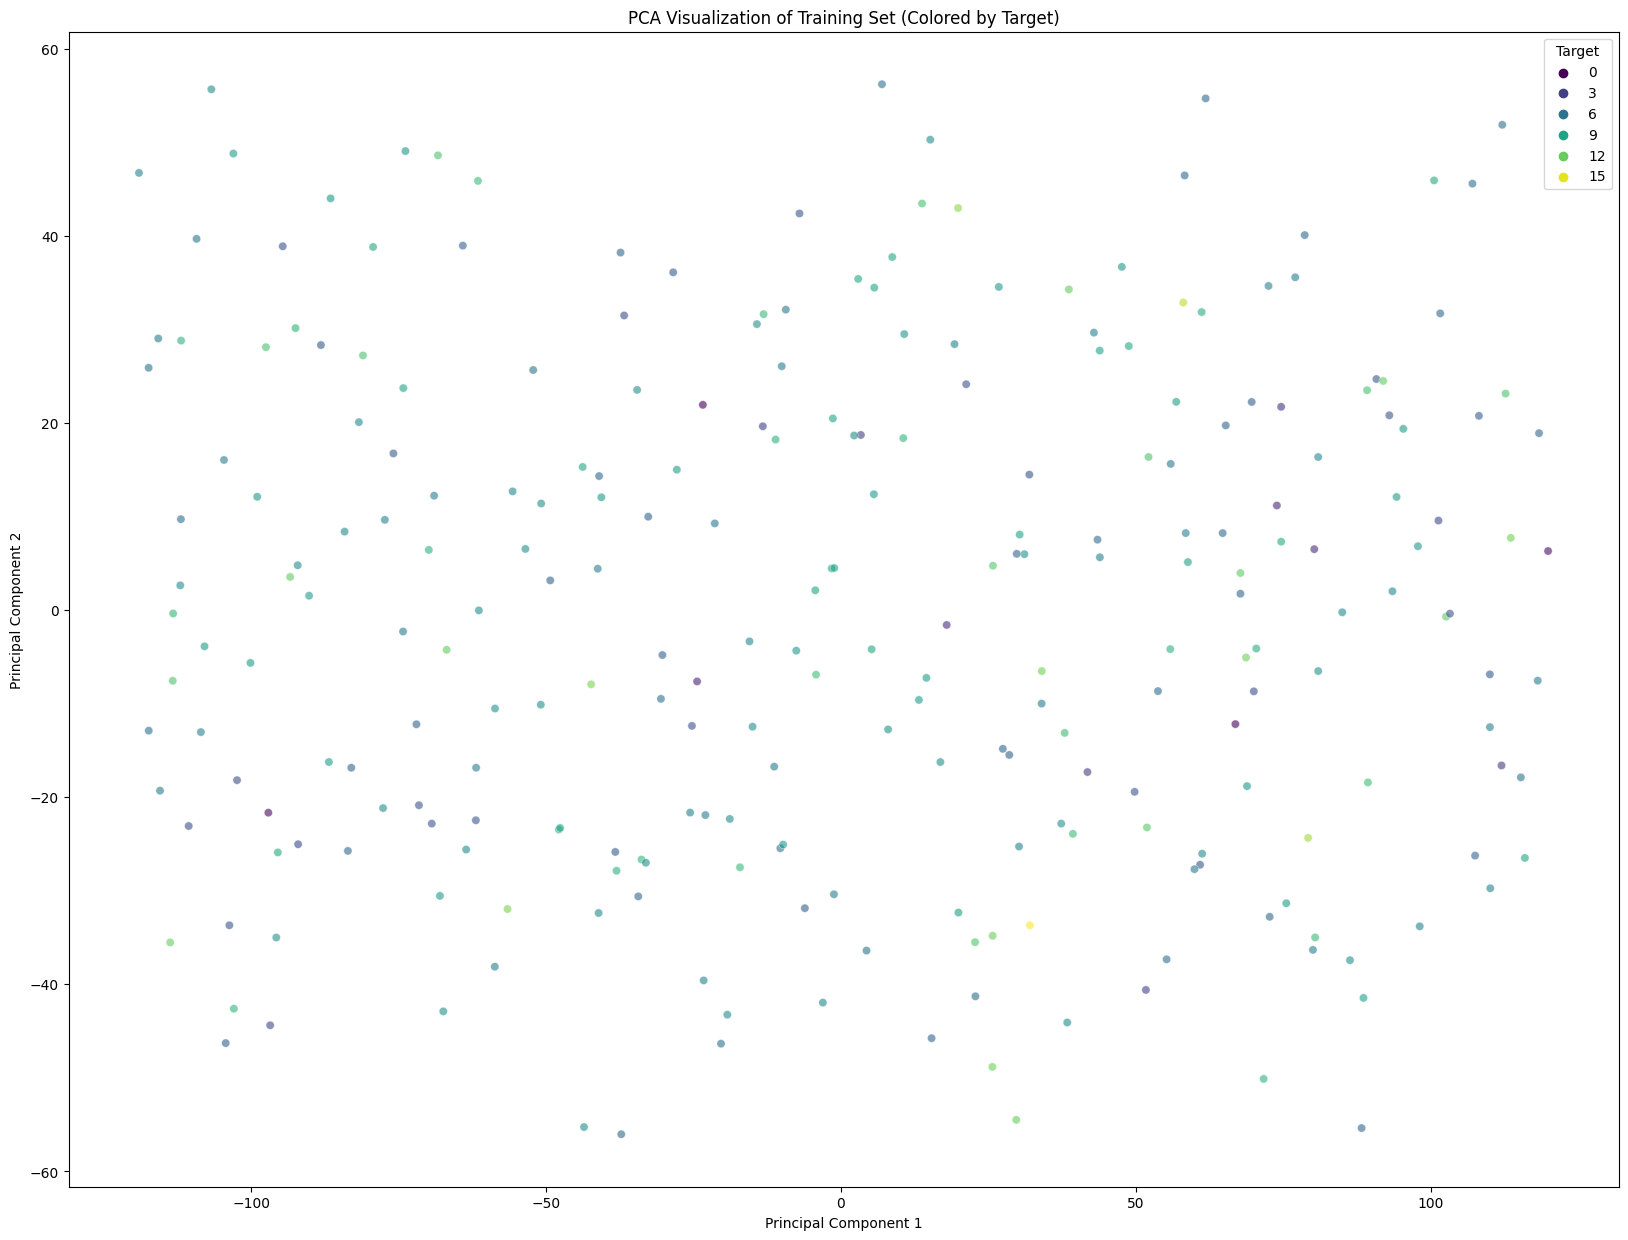

In [18]:
# Convert the PCA output to DataFrame for better readability
x_train_pca_df = pd.DataFrame(x_train, columns=['PC1', 'PC2'])
x_test_pca_df = pd.DataFrame(x_test, columns=['PC1', 'PC2'])

# --- Visualize the PCA-transformed training data ---
plot_data = pd.DataFrame({
    'PC1': x_train_pca_df['PC1'],  # First principal component
    'PC2': x_train_pca_df['PC2'],  # Second principal component
    'Target': y_train              # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))  # Adjusted size for better proportions
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., class: edible or poisonous)
    palette="viridis",  # Continuous palette (suitable for numeric targets)
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Training Set (Colored by Target)")

# Show the plot
plt.show()

# Modeling

In [19]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import KFold, cross_val_score

# Define the list of regression models
ml_models = [
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)), # Added random_state for reproducibility
    ("ExtraTreeRegressor", ExtraTreeRegressor(random_state=42)),       # Added random_state for reproducibility
]

# Perform cross-validation for each model
for name, model in ml_models:
    print(f"{name}: ")
    model.fit(x_train, y_train) # Use your training data (assuming x_train and y_train are defined)
    cv_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error') # Using 'neg_mean_squared_error'
    print("\tK-Fold Cross-Validation (Negative Mean Squared Error):", cv_scores)
    print('-'*100)
    print(f'\tAverage K-Fold Cross-Validation (Negative Mean Squared Error): {cv_scores.mean()}')
    print('-'*100)

DecisionTreeRegressor: 
	K-Fold Cross-Validation (Negative Mean Squared Error): [-12.490225   -14.13863437 -14.6019625  -14.42106875 -15.35788437
 -10.94166875 -17.82844375 -13.28423438 -16.47509375 -16.27527812]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation (Negative Mean Squared Error): -14.581449375
----------------------------------------------------------------------------------------------------
ExtraTreeRegressor: 
	K-Fold Cross-Validation (Negative Mean Squared Error): [-14.25085938 -13.96175    -16.64424688 -13.44144375 -14.59479375
 -13.47466875 -21.47796563 -15.37464063 -14.82117812 -15.70874375]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation (Negative Mean Squared Error): -15.3750290625
----------------------------------------------------------------------------------------------------


## The decision surface of decision trees

DecisionTreeRegressor: 
	K-Fold Cross-Validation (Negative Mean Squared Error): [-12.490225   -14.13863437 -14.6019625  -14.42106875 -15.35788437
 -10.94166875 -17.82844375 -13.28423438 -16.47509375 -16.27527812]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation (Negative Mean Squared Error): -14.581449375
----------------------------------------------------------------------------------------------------


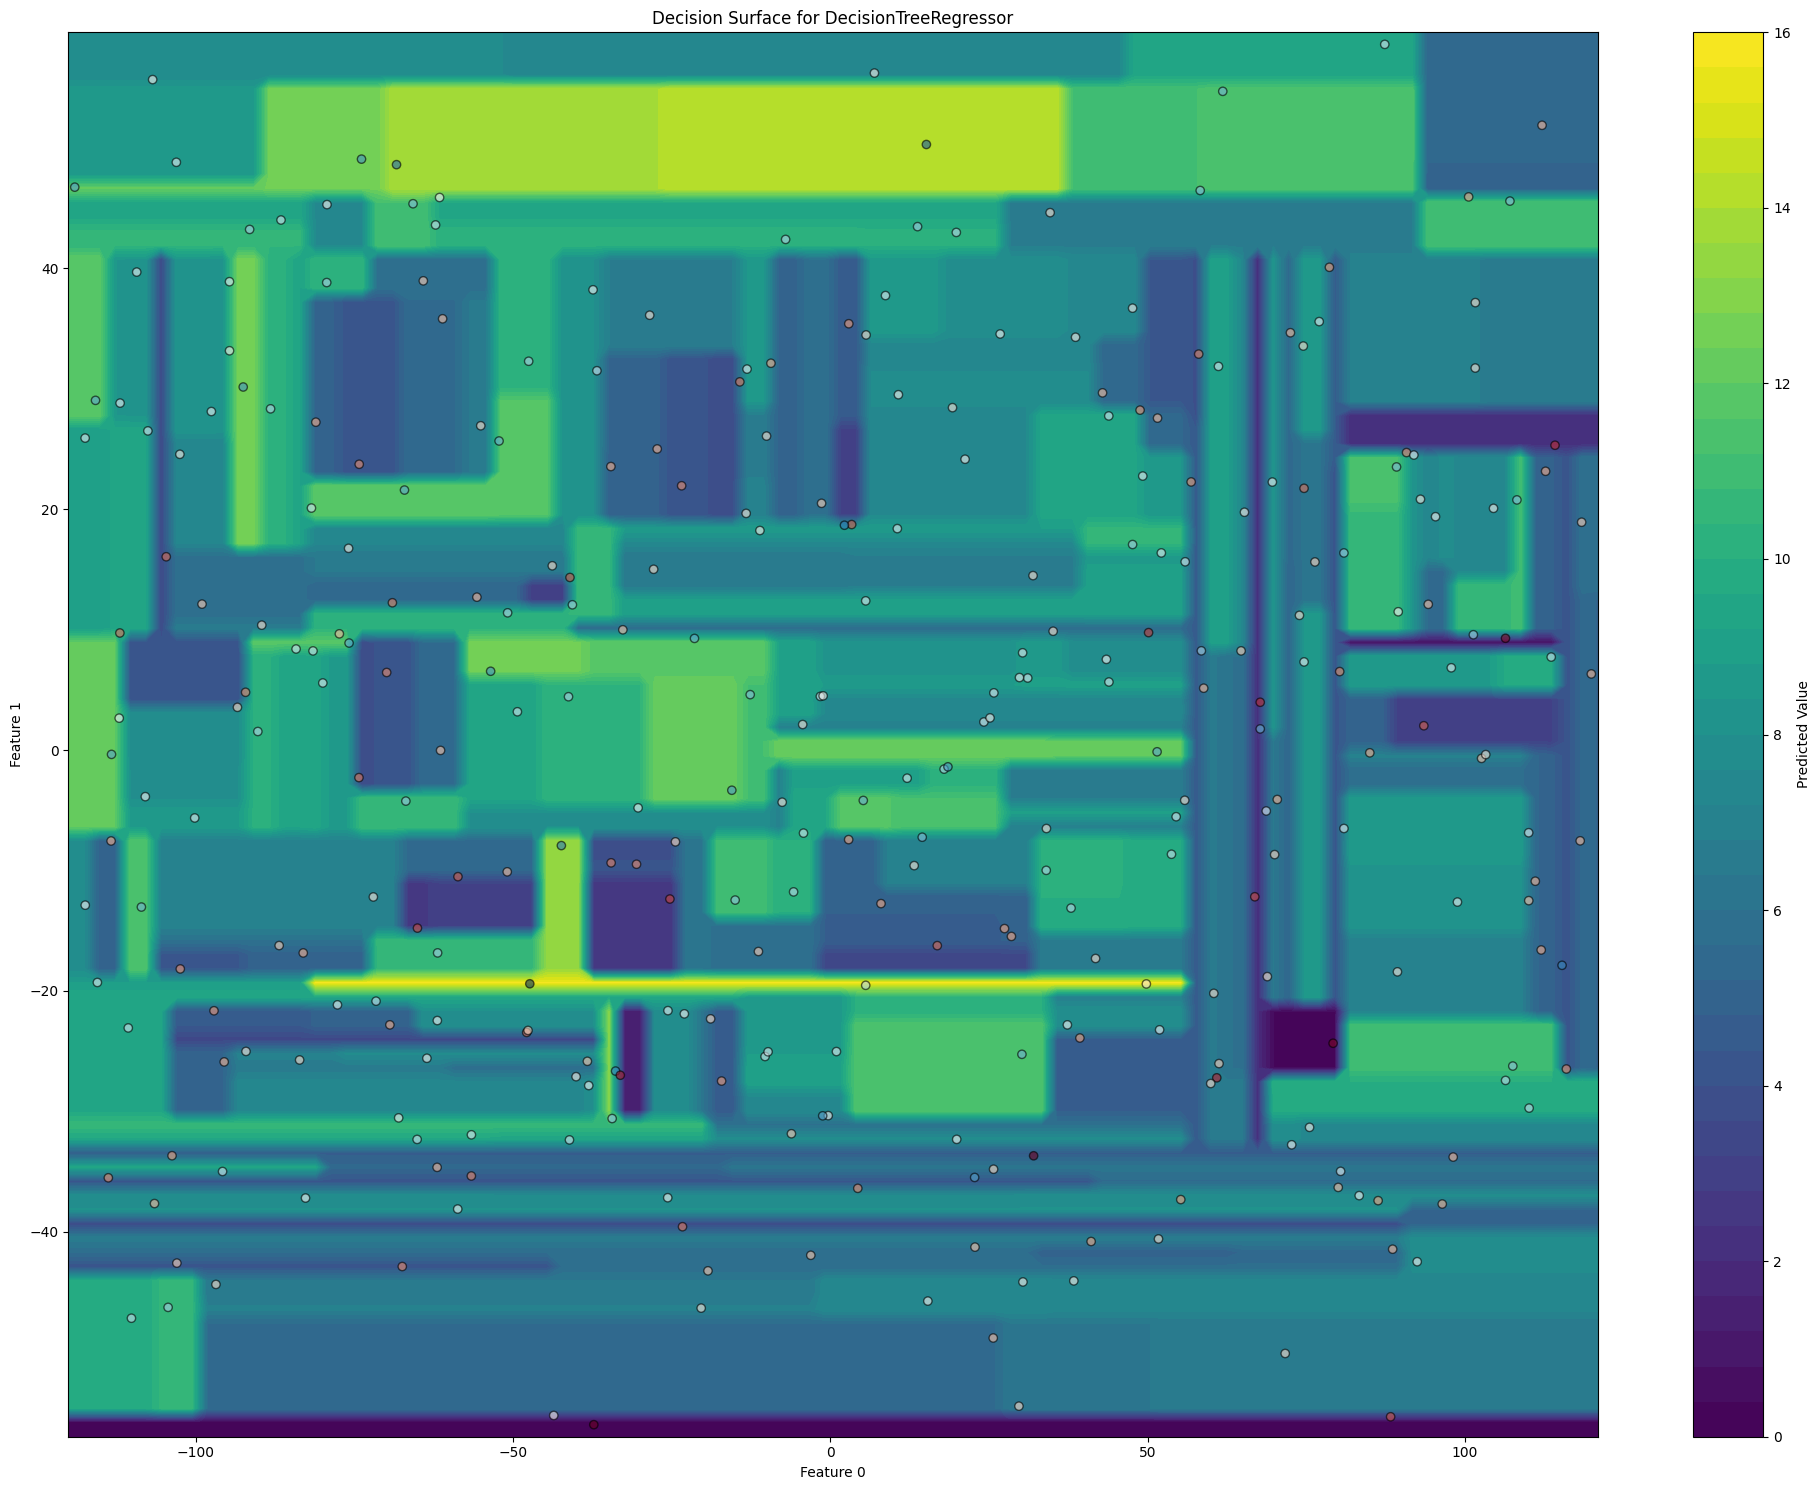

----------------------------------------------------------------------------------------------------


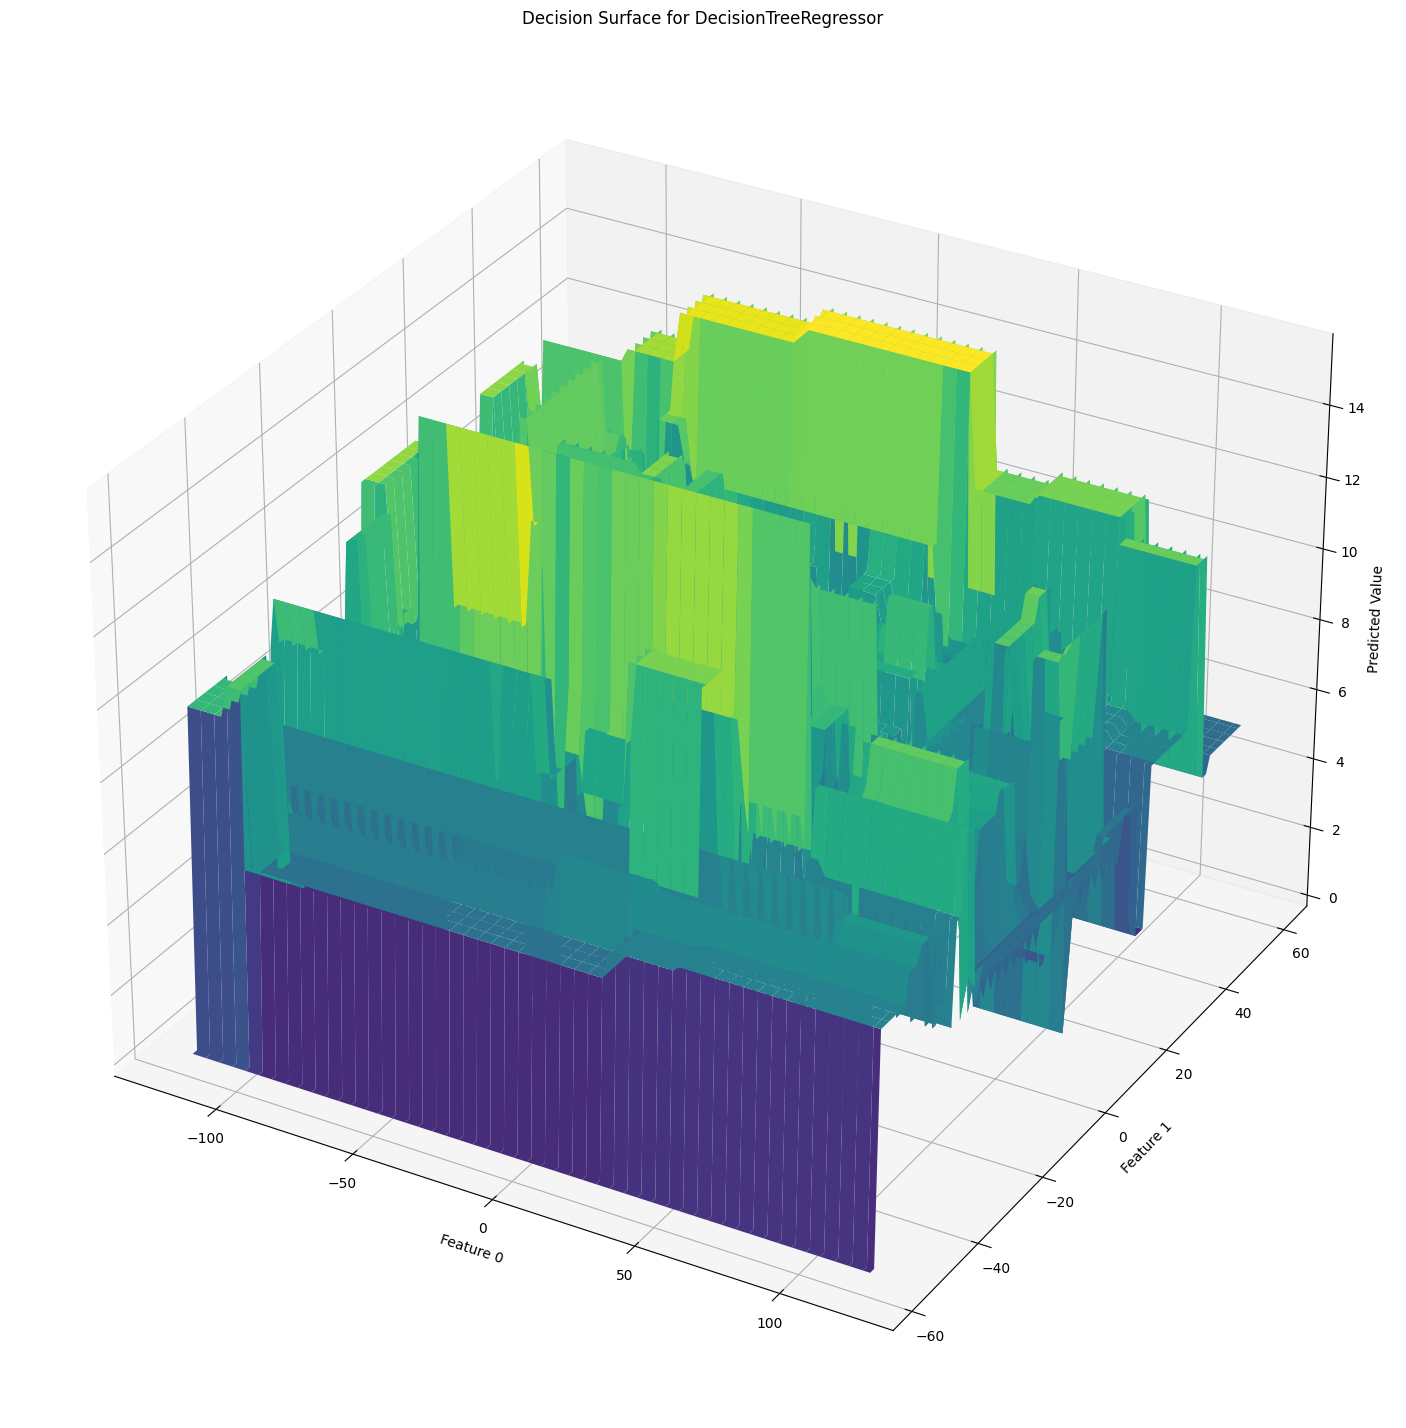

ExtraTreeRegressor: 
	K-Fold Cross-Validation (Negative Mean Squared Error): [-14.25085938 -13.96175    -16.64424688 -13.44144375 -14.59479375
 -13.47466875 -21.47796563 -15.37464063 -14.82117812 -15.70874375]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation (Negative Mean Squared Error): -15.3750290625
----------------------------------------------------------------------------------------------------


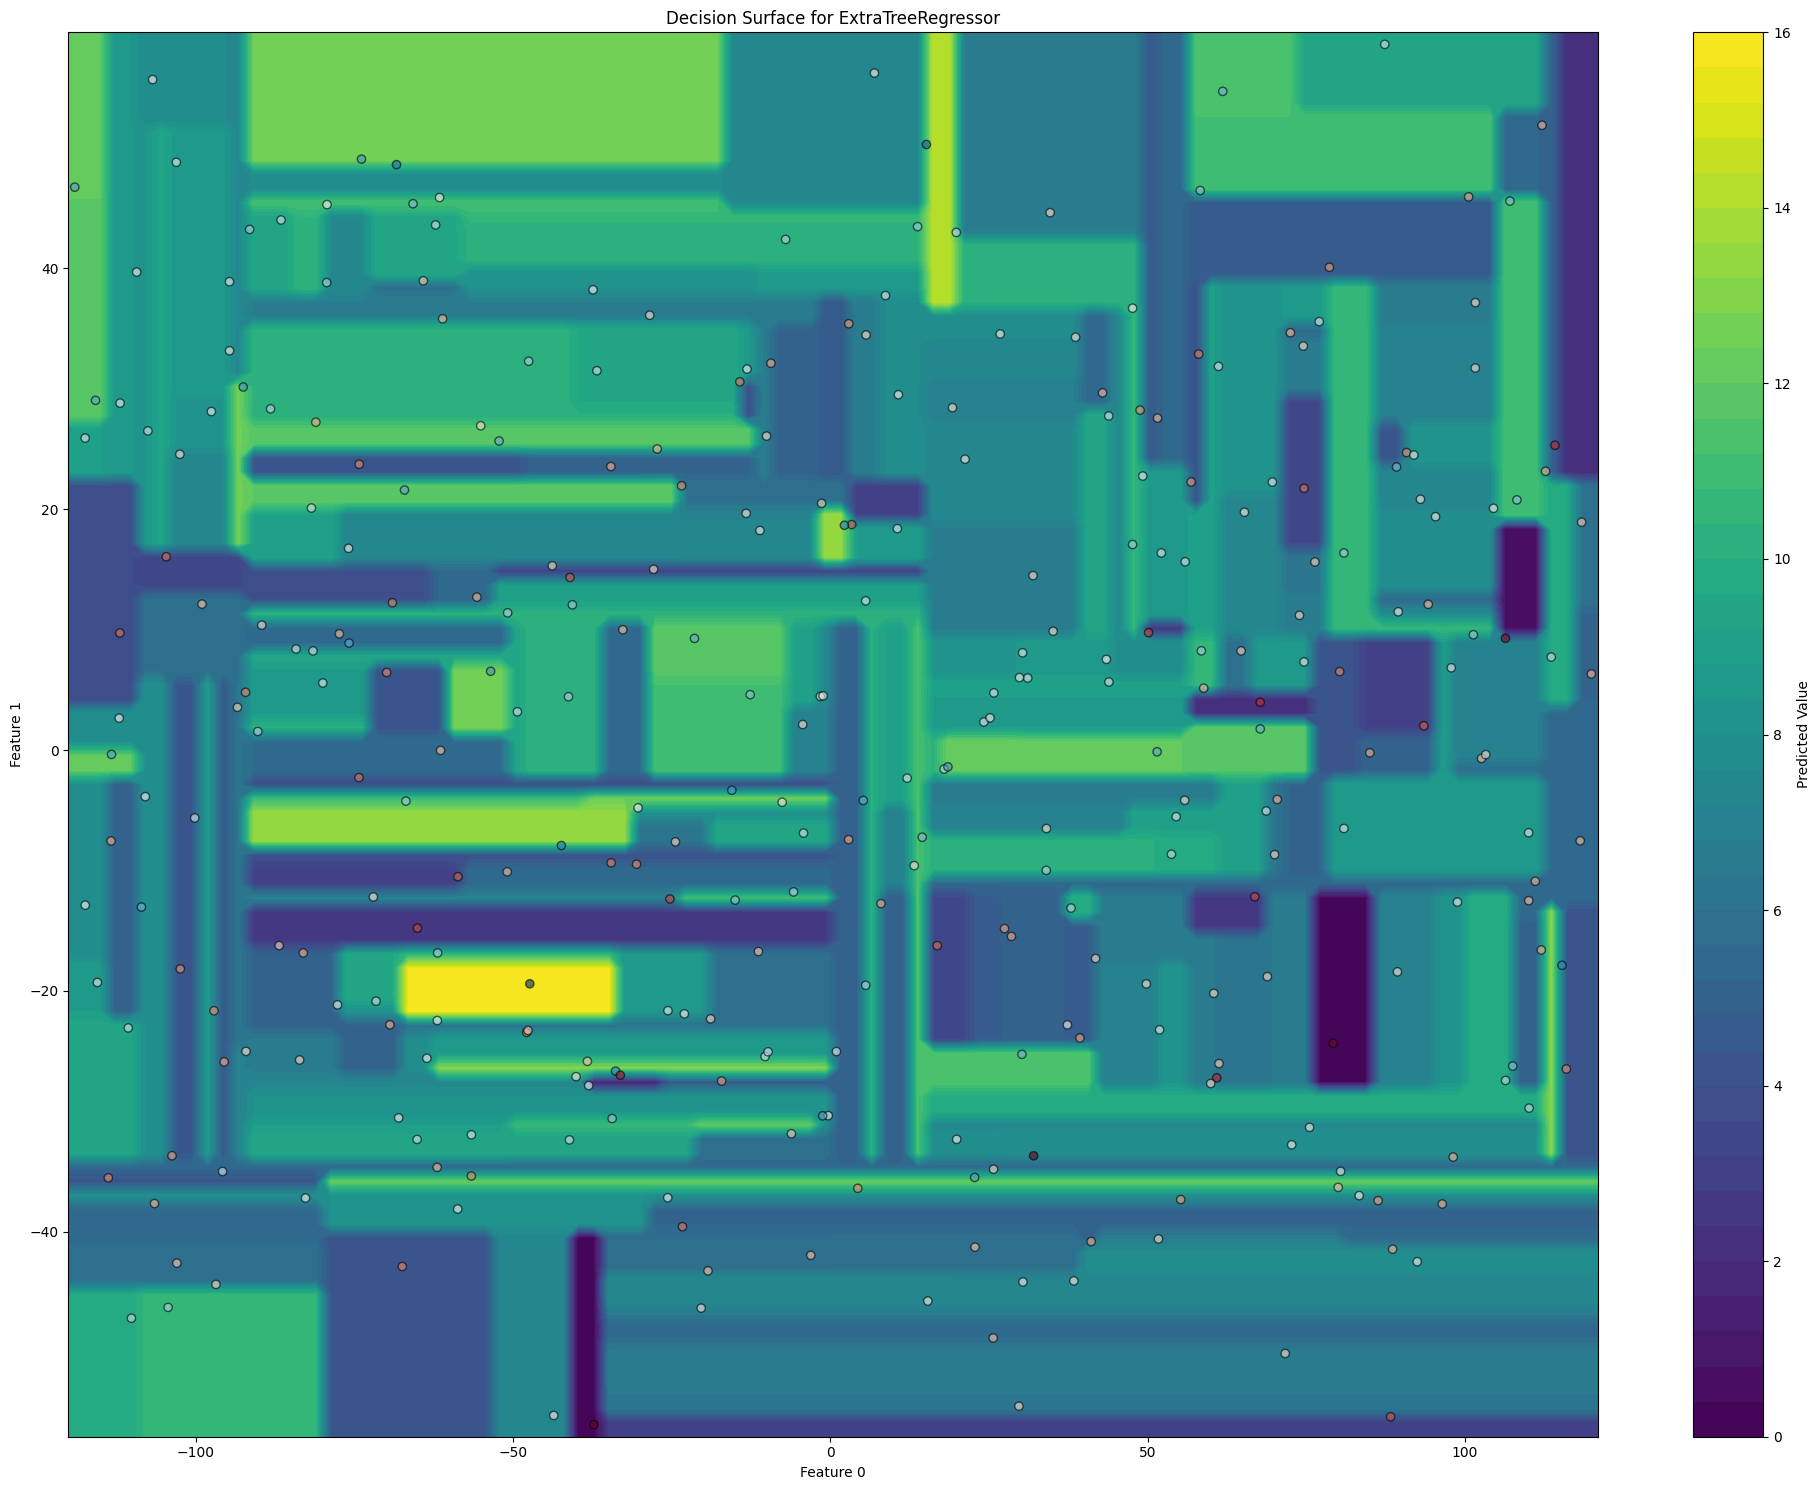

----------------------------------------------------------------------------------------------------


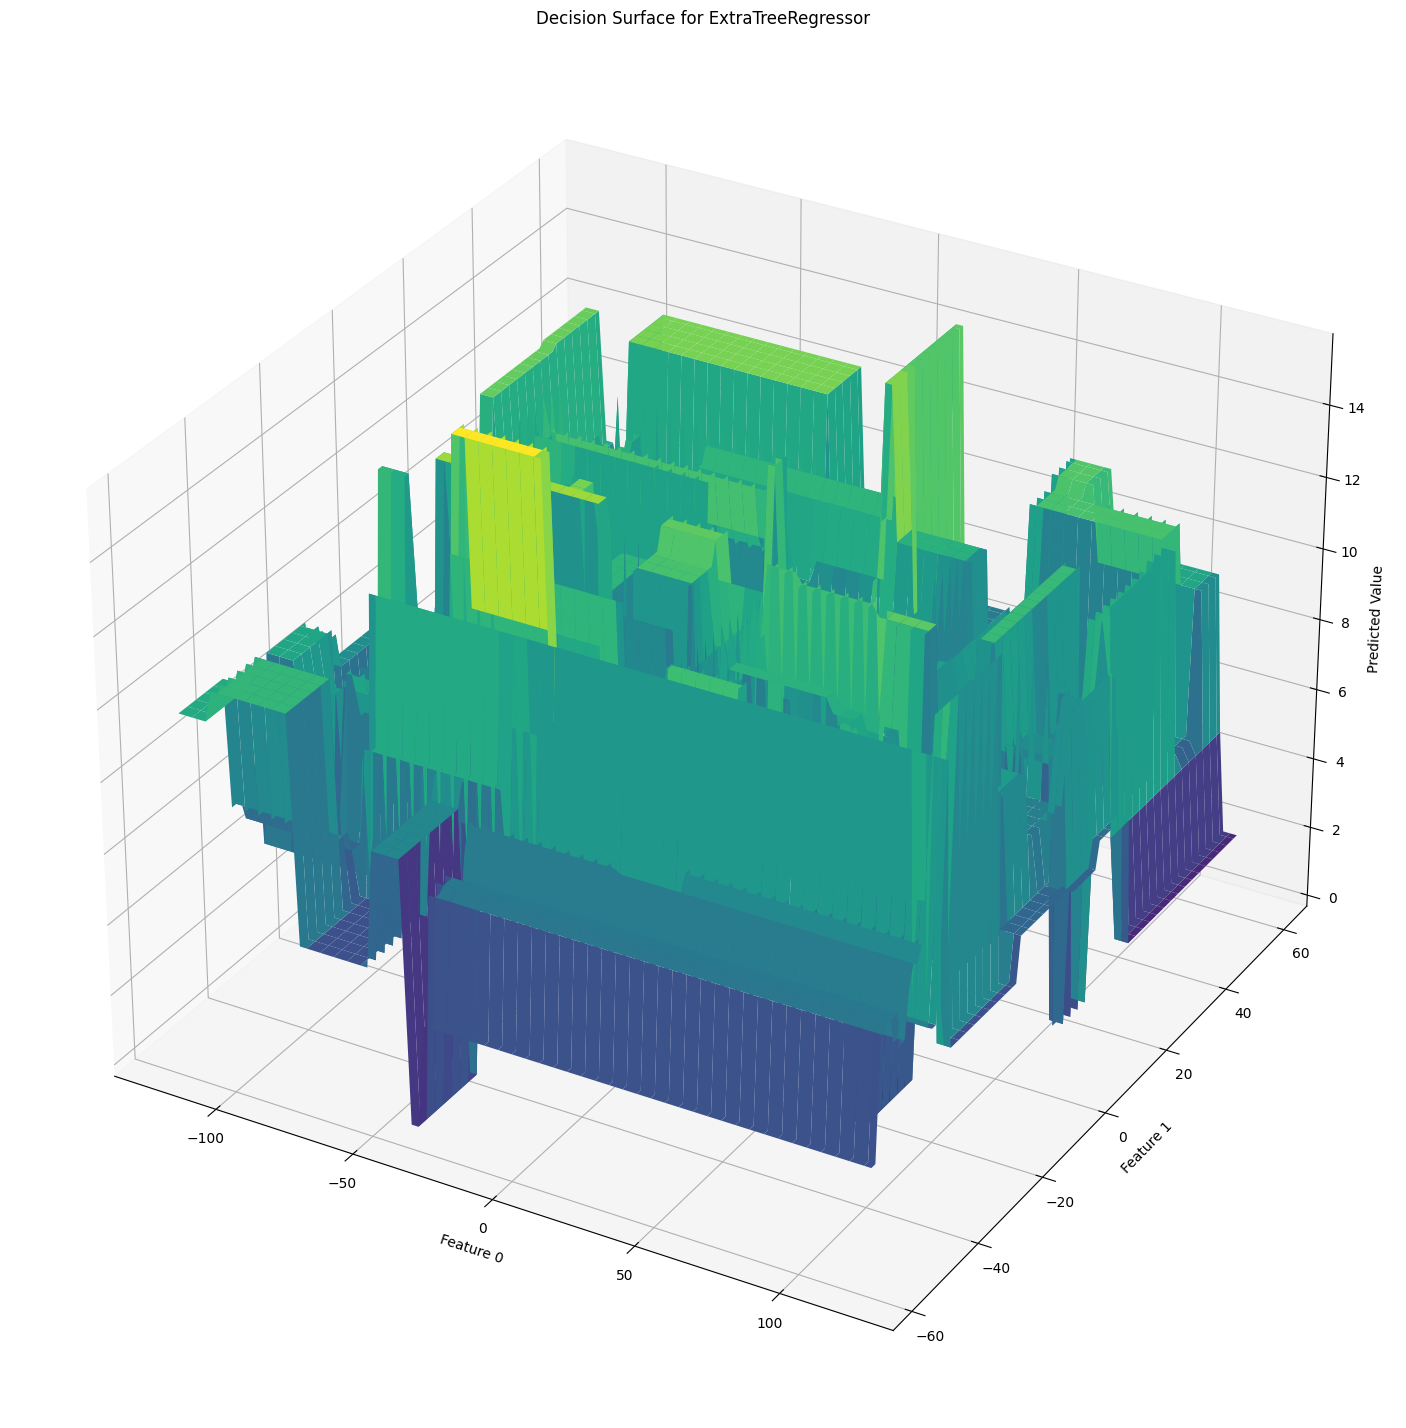

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import KFold, cross_val_score

# Define the list of regression models
ml_models = [
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("ExtraTreeRegressor", ExtraTreeRegressor(random_state=42)),
]

# Ensure x_train and y_train are numpy arrays for easier indexing
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Select the first two features for visualization
feature_1_idx, feature_2_idx = 0, 1  # First two features
feature_1_name = f"Feature {feature_1_idx}" if not isinstance(x_train, pd.DataFrame) else x_train.columns[feature_1_idx]
feature_2_name = f"Feature {feature_2_idx}" if not isinstance(x_train, pd.DataFrame) else x_train.columns[feature_2_idx]

# Create a mesh grid for the two features
x1_min, x1_max = x_train[:, feature_1_idx].min() - 1, x_train[:, feature_1_idx].max() + 1
x2_min, x2_max = x_train[:, feature_2_idx].min() - 1, x_train[:, feature_2_idx].max() + 1
x1, x2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 100),
    np.linspace(x2_min, x2_max, 100)
)

# Perform cross-validation and plot decision surface for each model
for name, model in ml_models:
    print(f"{name}: ")
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Cross-validation
    cv_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    print("\tK-Fold Cross-Validation (Negative Mean Squared Error):", cv_scores)
    print('-'*100)
    print(f'\tAverage K-Fold Cross-Validation (Negative Mean Squared Error): {cv_scores.mean()}')
    print('-'*100)

    # Prepare input for prediction on the mesh grid
    mesh_points = np.zeros((x1.size, x_train.shape[1]))
    mesh_points[:, feature_1_idx] = x1.ravel()
    mesh_points[:, feature_2_idx] = x2.ravel()
    
    # Fill the remaining features with the mean of x_train (or another strategy)
    for i in range(x_train.shape[1]):
        if i not in [feature_1_idx, feature_2_idx]:
            mesh_points[:, i] = x_train[:, i].mean()

    # Predict on the mesh grid
    predictions = model.predict(mesh_points)
    predictions = predictions.reshape(x1.shape)

    # Plot the decision surface as a heatmap
    plt.figure(figsize=(20, 15))
    plt.contourf(x1, x2, predictions, cmap='viridis', levels=50)
    plt.colorbar(label='Predicted Value')
    plt.scatter(x_train[:, feature_1_idx], x_train[:, feature_2_idx], c=y_train, edgecolor='k', cmap='RdBu', alpha=0.6)
    plt.xlabel(feature_1_name)
    plt.ylabel(feature_2_name)
    plt.title(f'Decision Surface for {name}')
    plt.tight_layout()
    plt.show()
    print('-'*100)
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(25, 18))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1, x2, predictions, cmap='viridis')
    ax.set_xlabel(feature_1_name)
    ax.set_ylabel(feature_2_name)
    ax.set_zlabel('Predicted Value')
    plt.title(f'Decision Surface for {name}')
    plt.show()

## Visualize fit of models with data

### Fit with first features

DecisionTreeRegressor: 


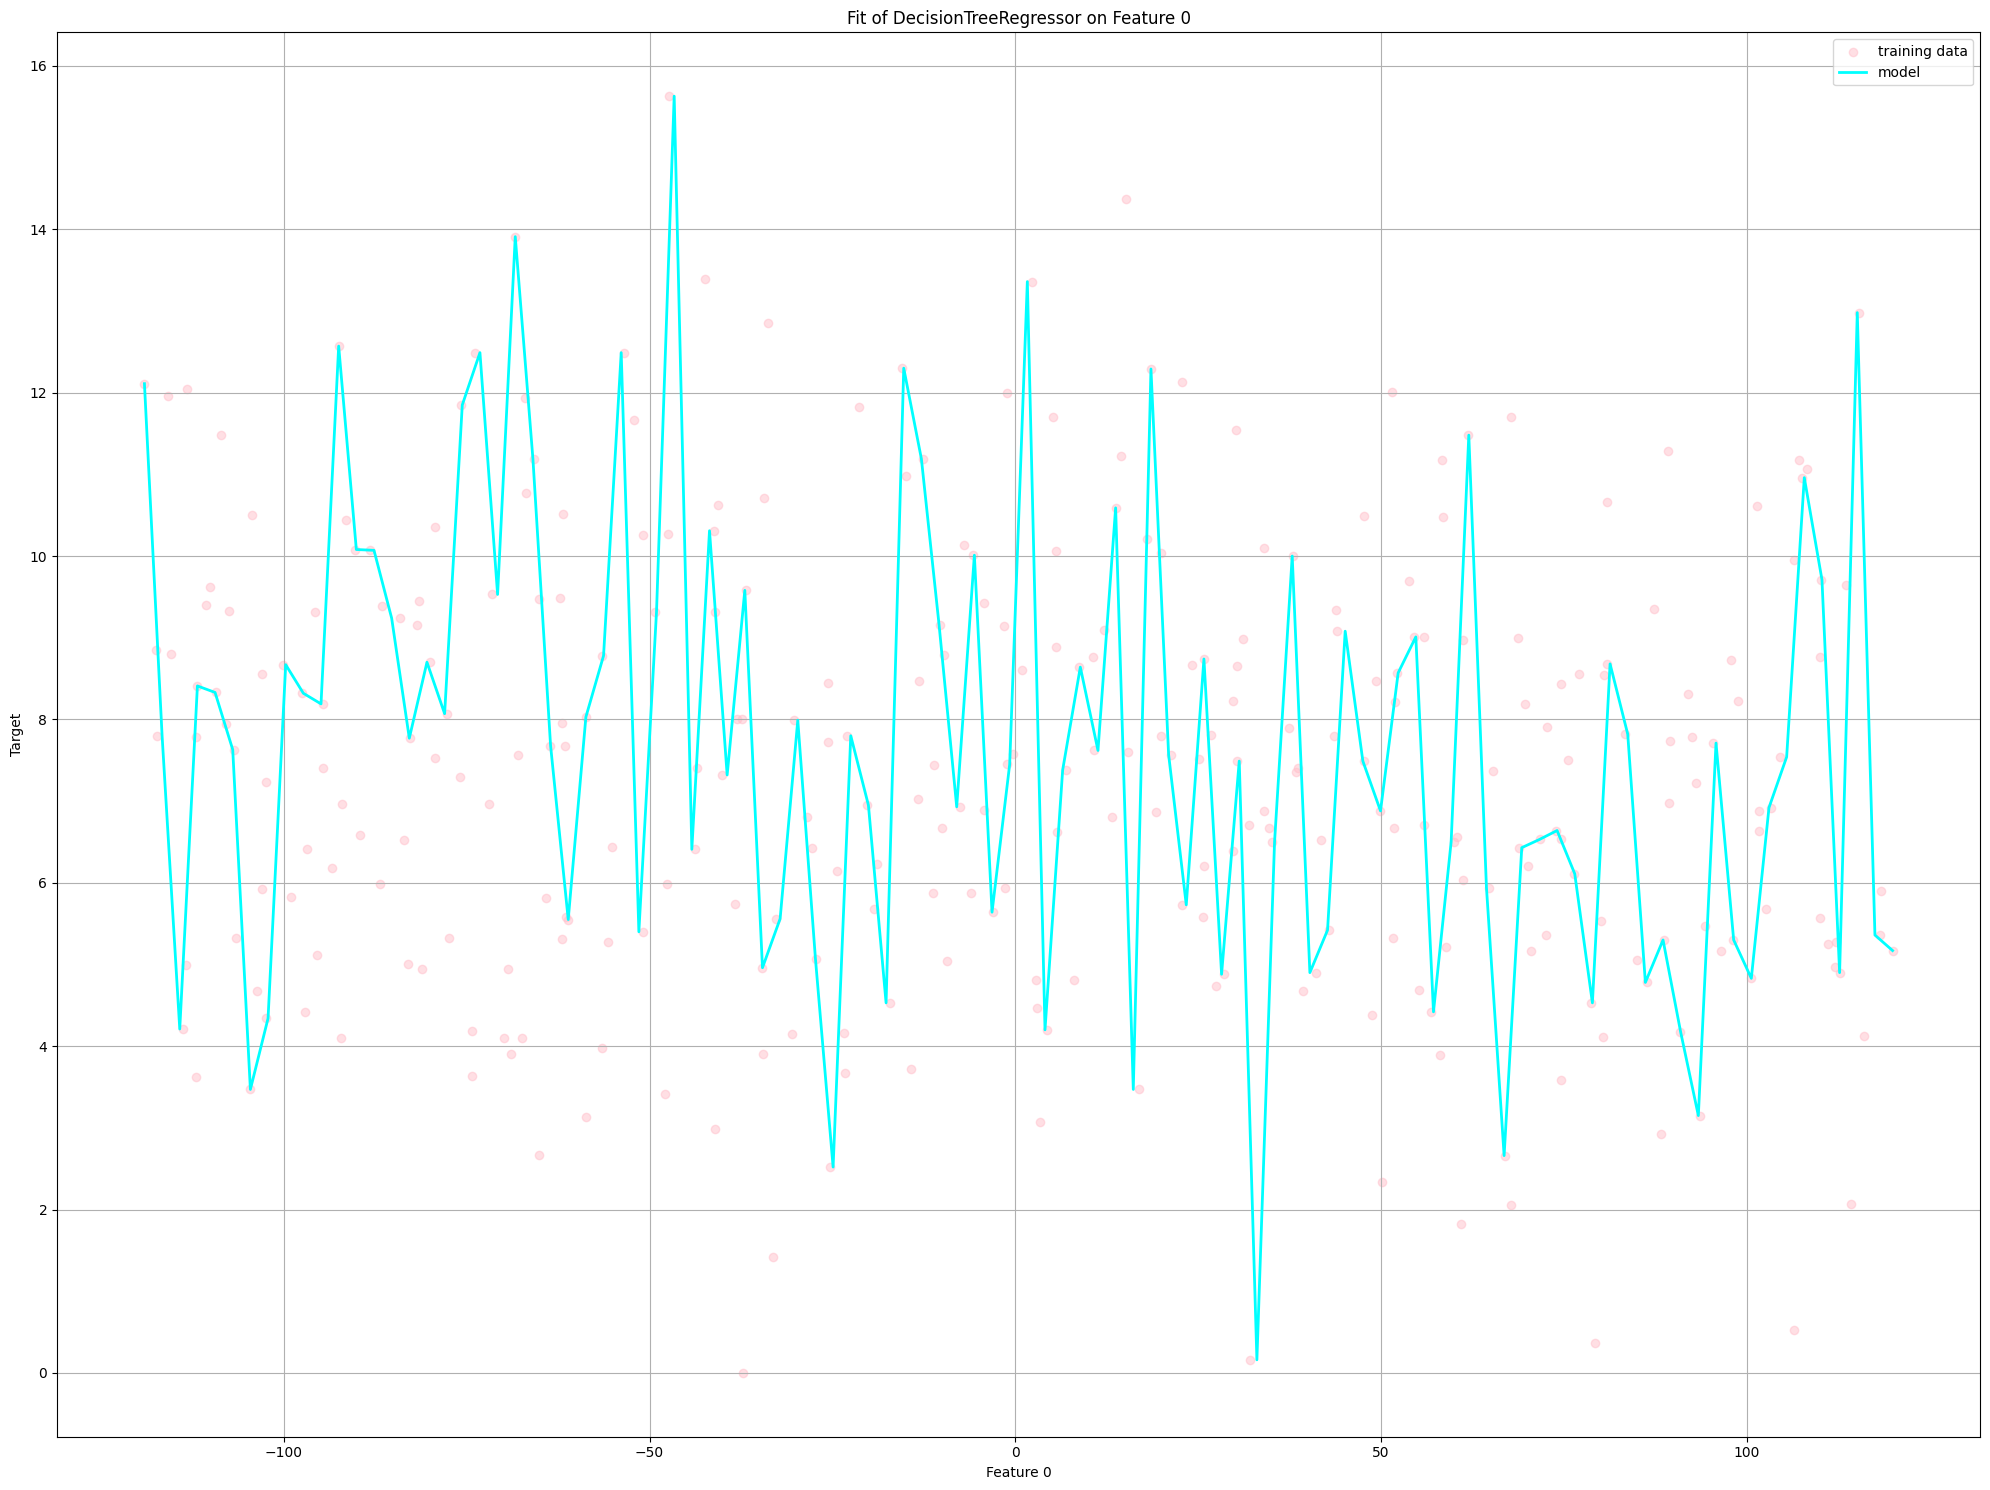

ExtraTreeRegressor: 


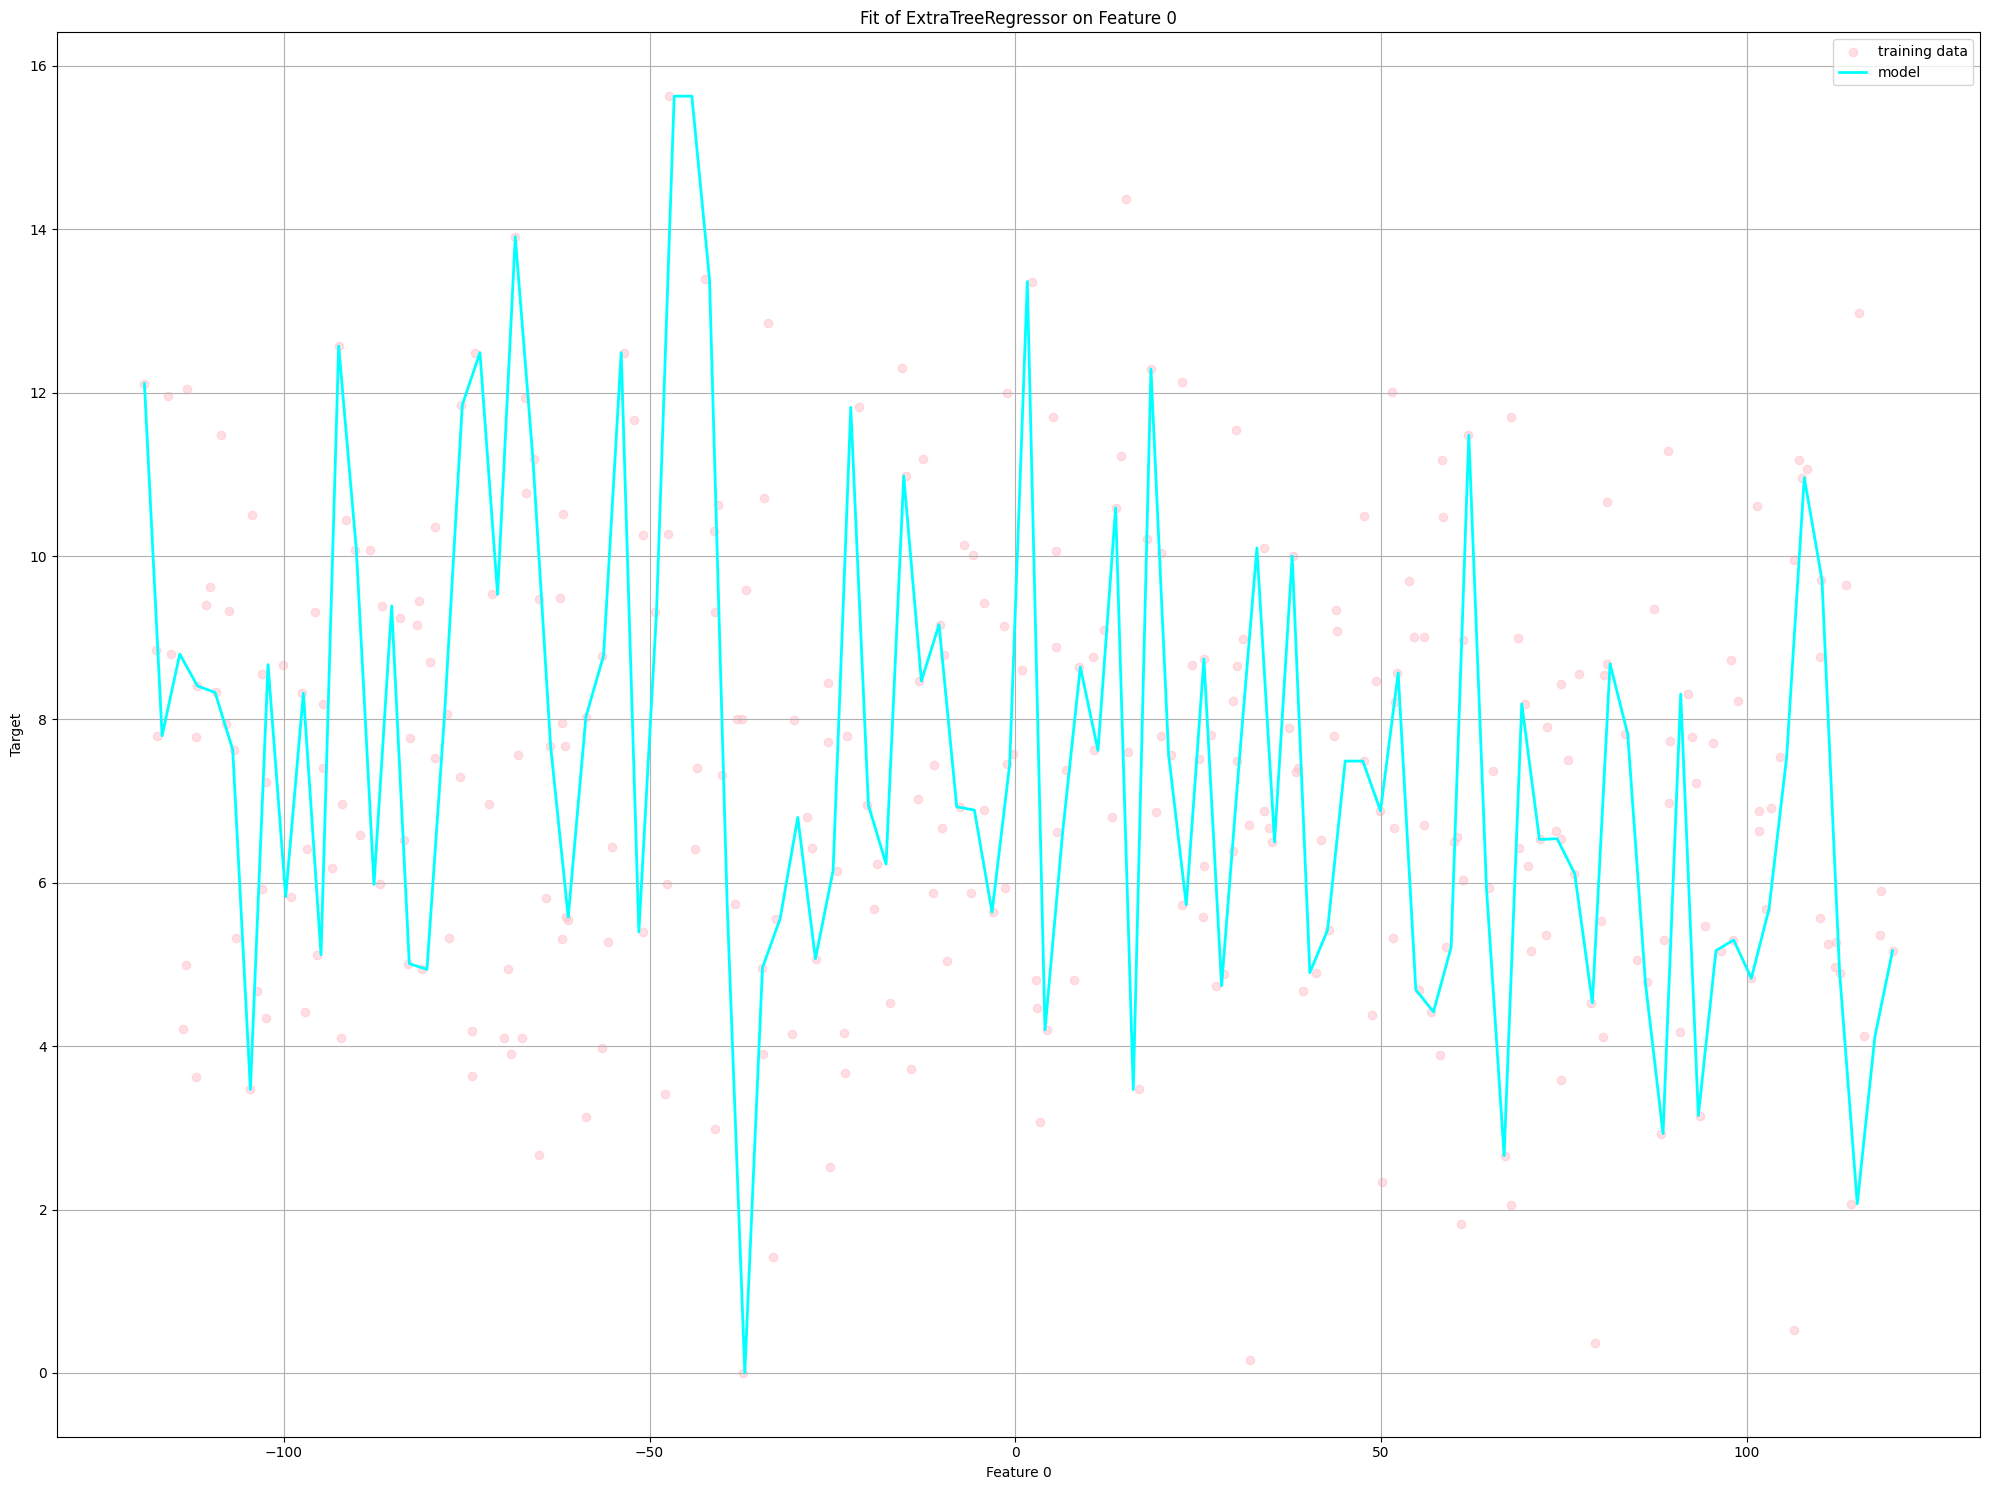

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd

# Define the list of regression models
ml_models = [
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("ExtraTreeRegressor", ExtraTreeRegressor(random_state=42)),
]

# Convert x_train and y_train to numpy arrays if they are DataFrames/Series
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Select the first feature for visualization
feature_idx = 0  # First feature
feature_name = f"Feature {feature_idx}" if not isinstance(x_train, pd.DataFrame) else x_train.columns[feature_idx]
x_feature = x_train[:, feature_idx]

# Perform cross-validation and plot the fit for each model
for name, model in ml_models:
    print(f"{name}: ")
    
    # Fit the model on the selected feature (reshaped for sklearn)
    model.fit(x_feature.reshape(-1, 1), y_train)
    
    # Cross-validation
    # cv_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error')

    # Generate points for the regression line
    x_range = np.linspace(x_feature.min(), x_feature.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    # Create the scatter plot with the regression line
    plt.figure(figsize=(20, 15))
    plt.scatter(x_feature, y_train, color='pink', alpha=0.5, label='training data')
    plt.plot(x_range, y_pred, color='cyan', label='model', linewidth=2)
    plt.xlabel(feature_name)
    plt.ylabel('Target')
    plt.title(f'Fit of {name} on {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Fit with second features

DecisionTreeRegressor: 


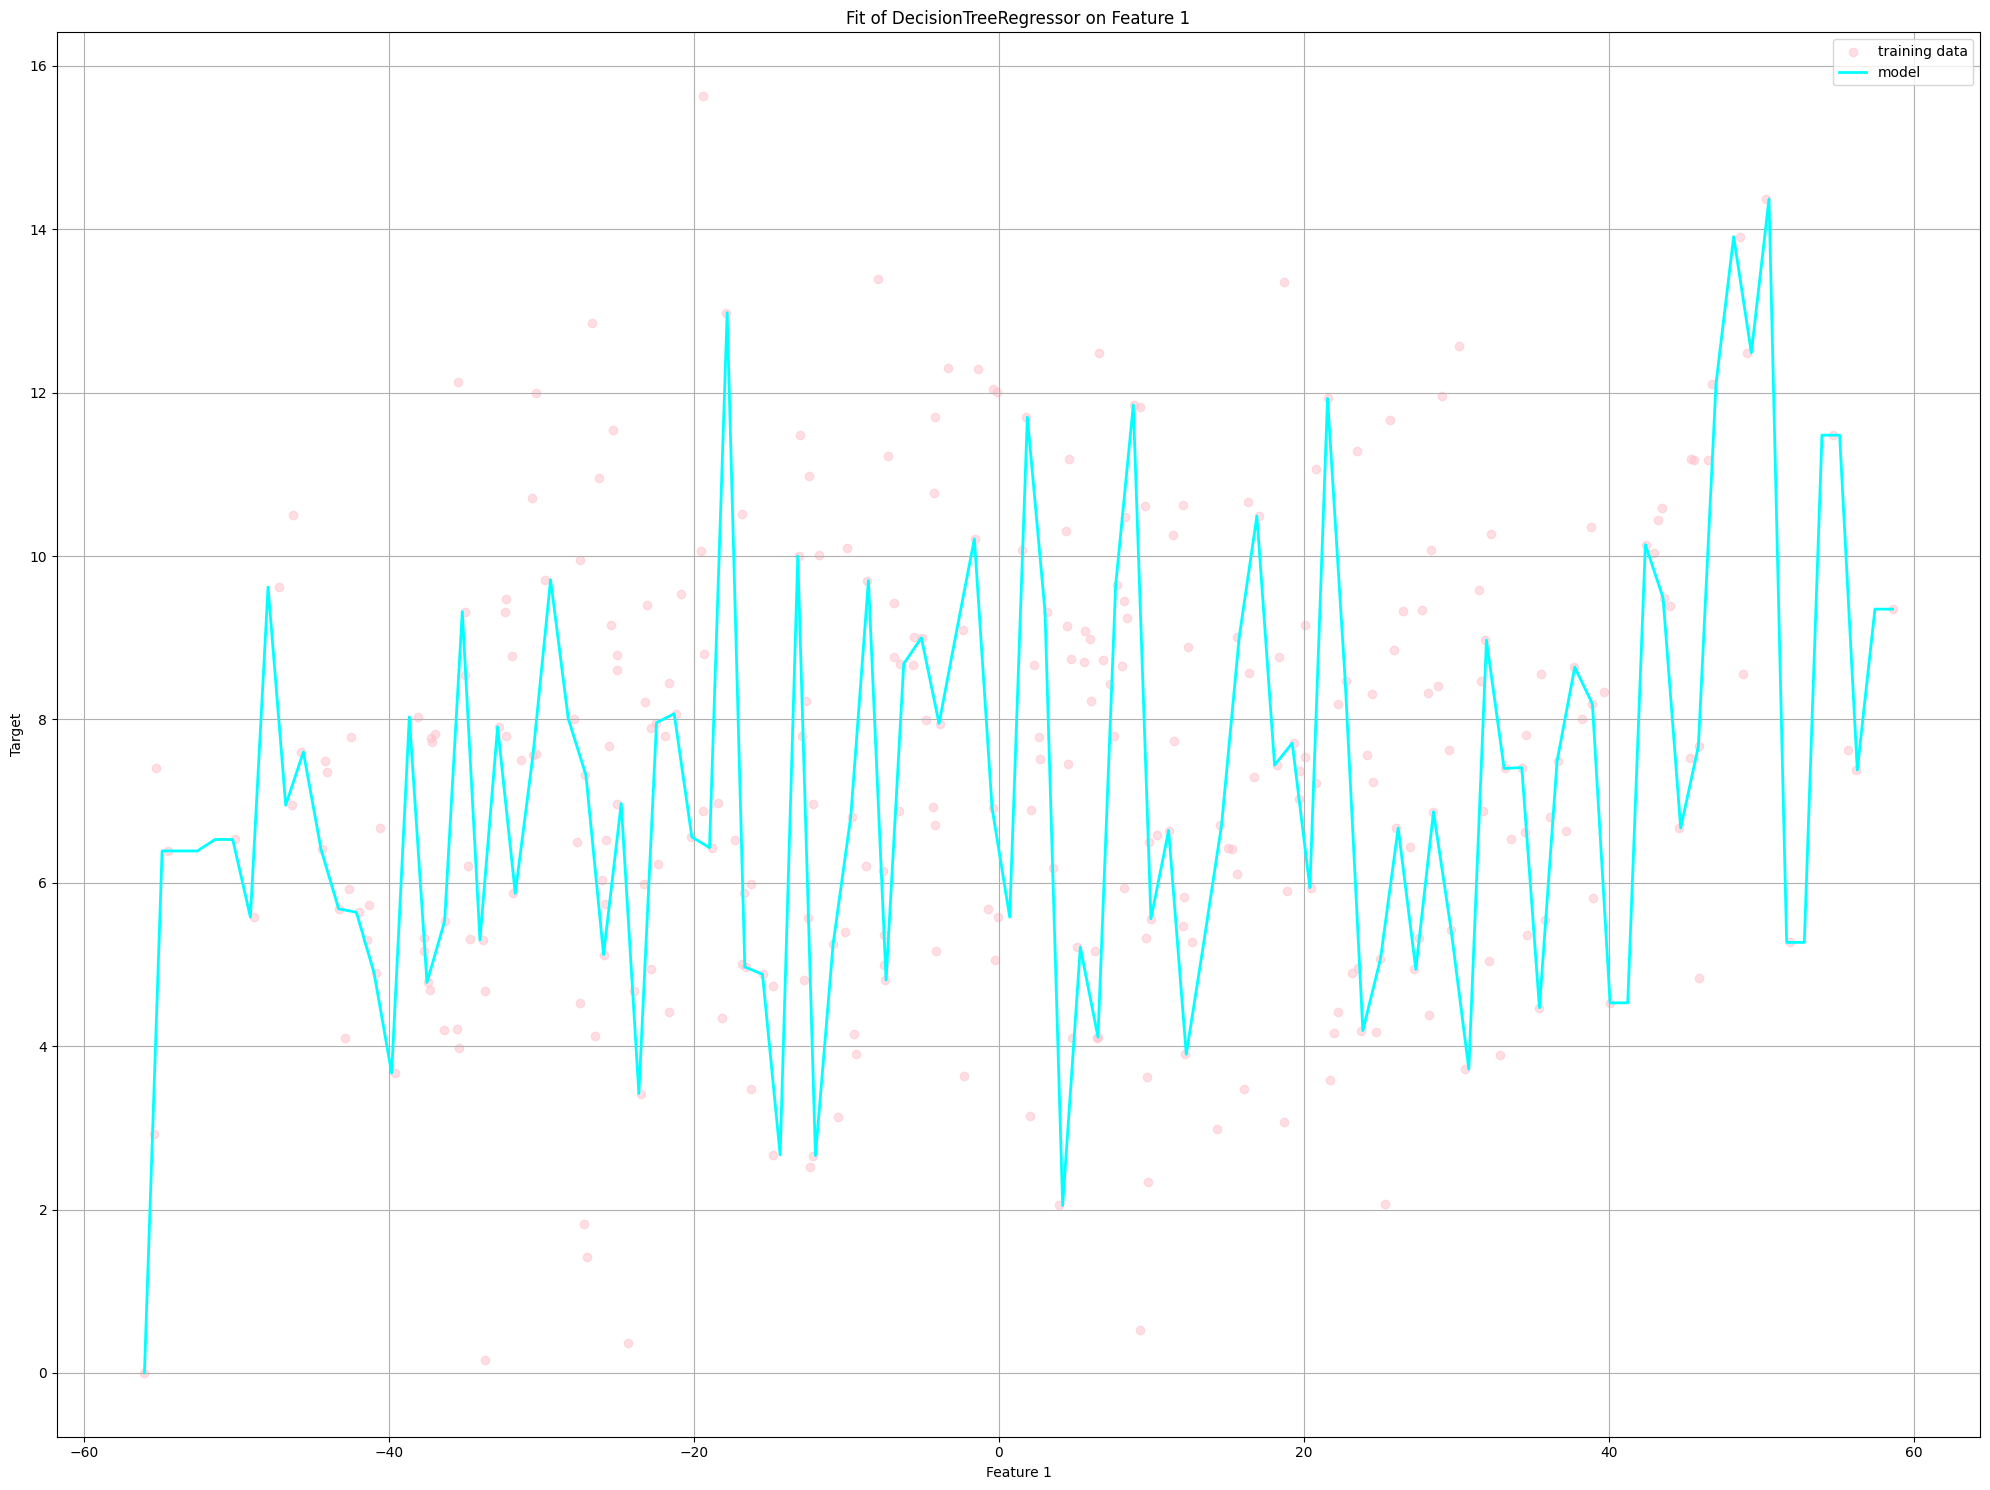

ExtraTreeRegressor: 


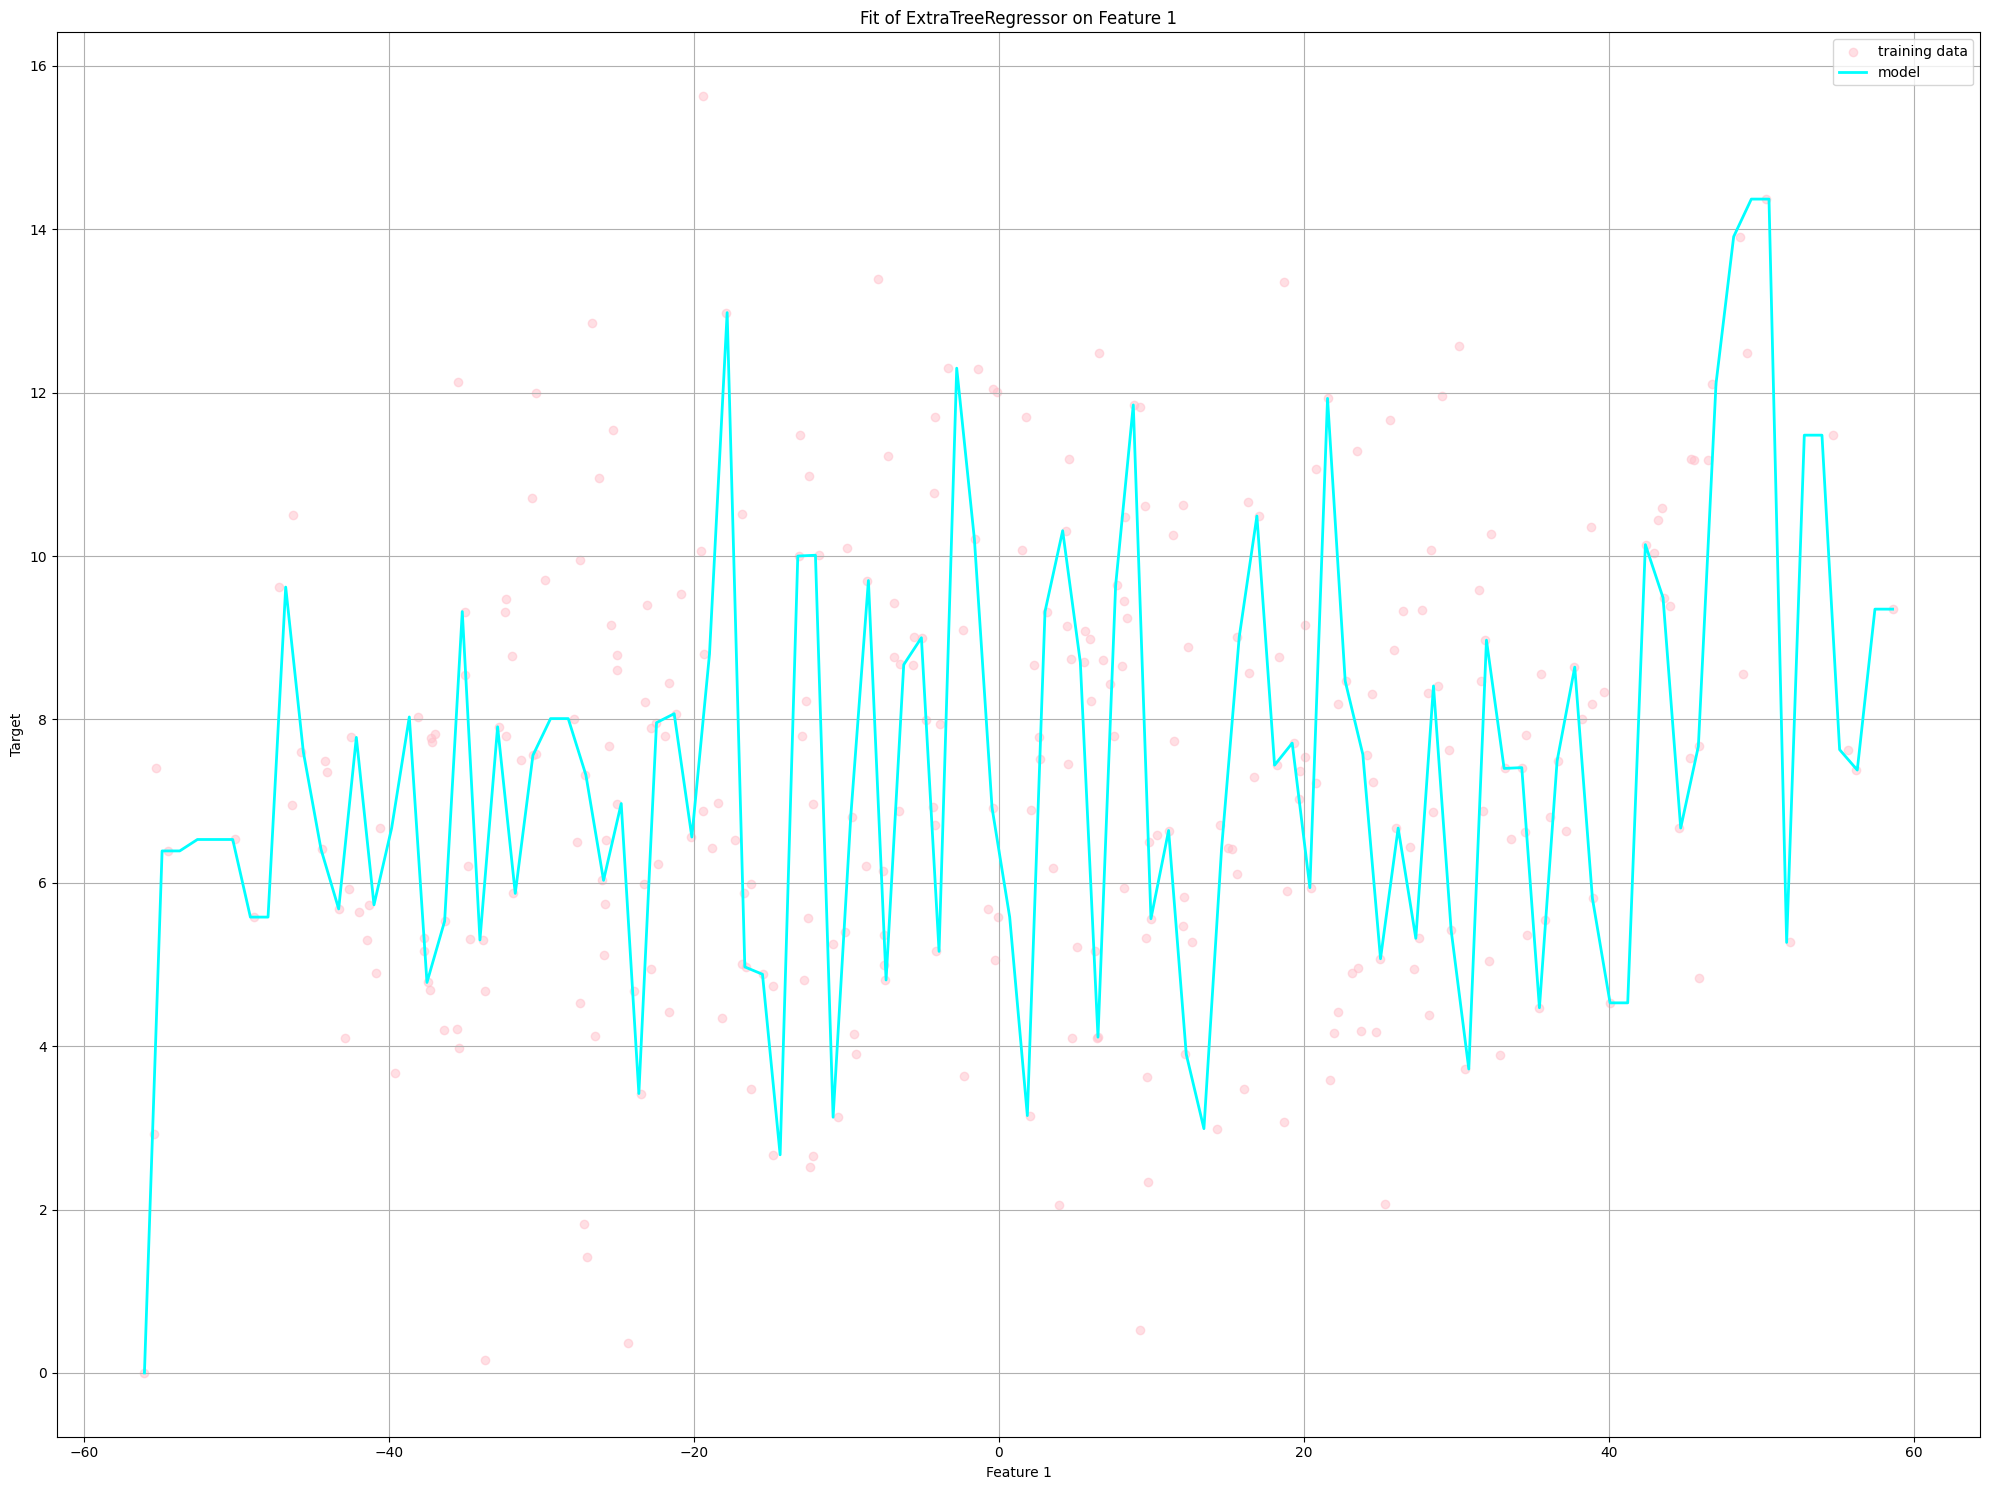

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd

# Define the list of regression models
ml_models = [
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("ExtraTreeRegressor", ExtraTreeRegressor(random_state=42)),
]

# Convert x_train and y_train to numpy arrays if they are DataFrames/Series
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Select the first feature for visualization
feature_idx = 1  # Second feature
feature_name = f"Feature {feature_idx}" if not isinstance(x_train, pd.DataFrame) else x_train.columns[feature_idx]
x_feature = x_train[:, feature_idx]

# Perform cross-validation and plot the fit for each model
for name, model in ml_models:
    print(f"{name}: ")
    
    # Fit the model on the selected feature (reshaped for sklearn)
    model.fit(x_feature.reshape(-1, 1), y_train)
    
    # Cross-validation
    # cv_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error')

    # Generate points for the regression line
    x_range = np.linspace(x_feature.min(), x_feature.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    # Create the scatter plot with the regression line
    plt.figure(figsize=(20, 15))
    plt.scatter(x_feature, y_train, color='pink', alpha=0.5, label='training data')
    plt.plot(x_range, y_pred, color='cyan', label='model', linewidth=2)
    plt.xlabel(feature_name)
    plt.ylabel('Target')
    plt.title(f'Fit of {name} on {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Post pruning decision trees with cost complexity pruning

Total impurity of leaves vs effective alphas of pruned tree¶

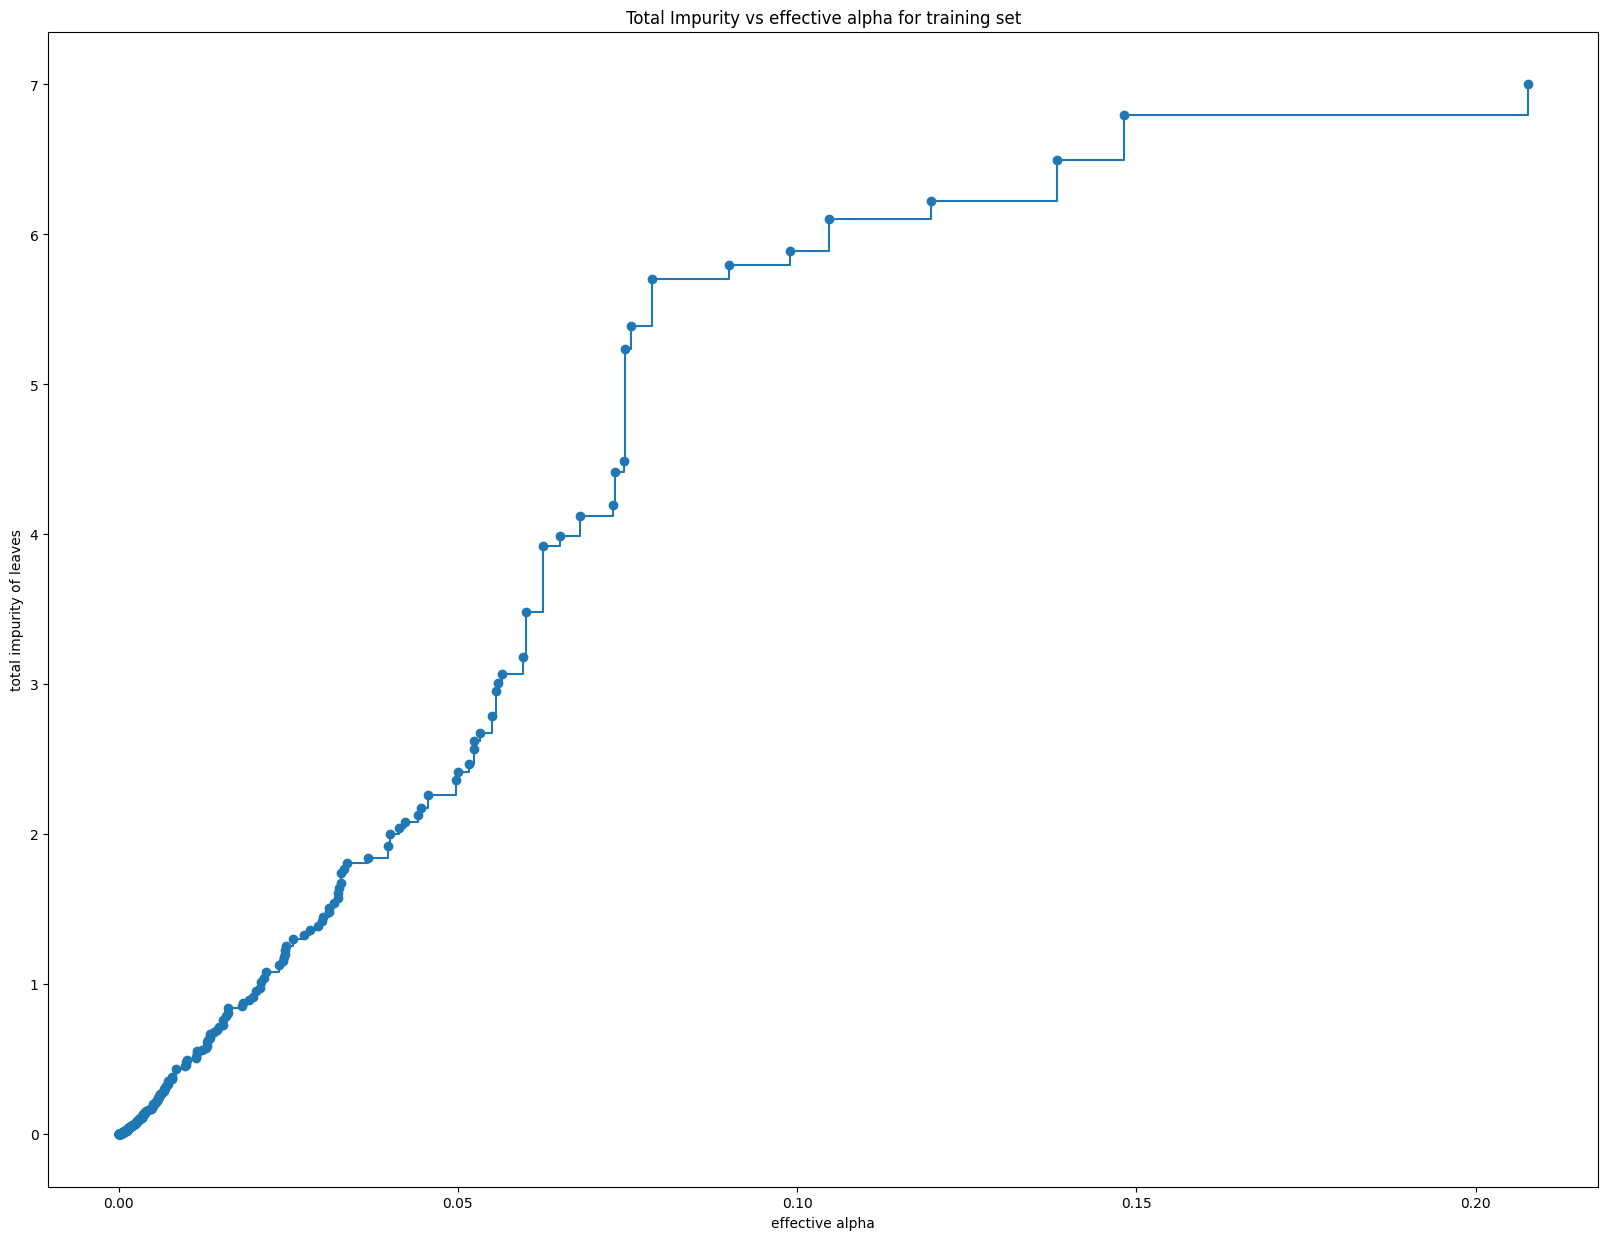

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4103092190524906


In [23]:
clf = DecisionTreeRegressor(random_state=42)
path = clf.cost_complexity_pruning_path(x_train, y_train) # Use PCA transformed data
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(20, 15))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")  # Corrected this line
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


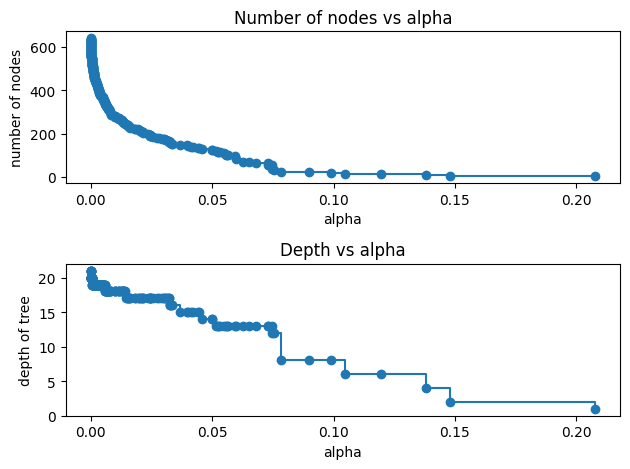

In [24]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

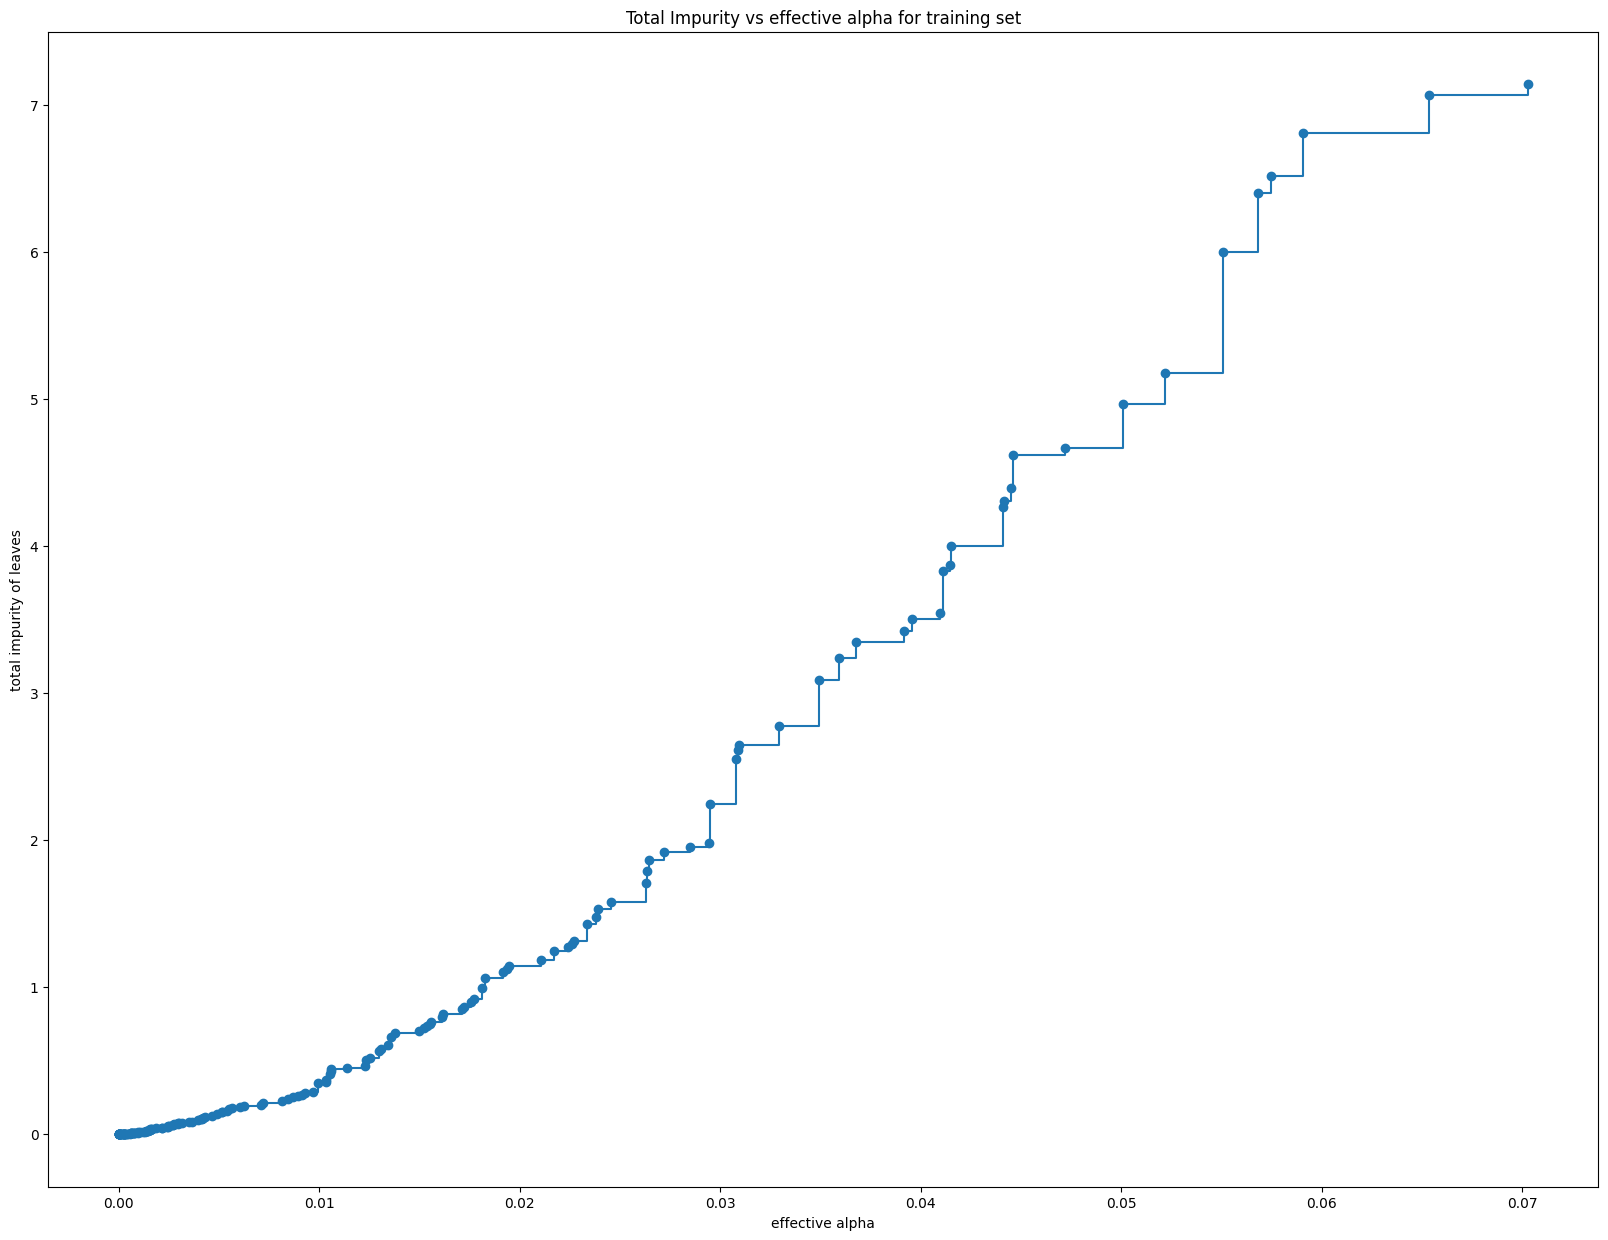

Number of nodes in the last tree is: 1 with ccp_alpha: 0.26954826015900046


In [25]:
clf = ExtraTreeRegressor(random_state=42)
path = clf.cost_complexity_pruning_path(x_train, y_train) # Use PCA transformed data
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(20, 15))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")  # Corrected this line
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()
clfs = []
for ccp_alpha in ccp_alphas:
    clf = ExtraTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

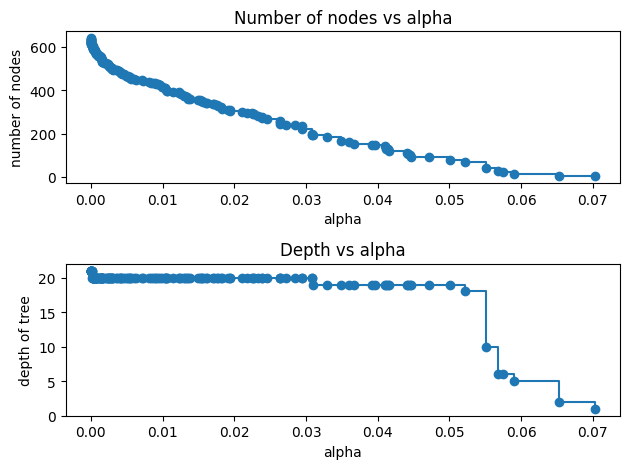

In [26]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Hyperparameters Tuning

In [27]:
import optuna
import numpy as np
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd

# Define the objective function for Optuna
def objective(trial, model_name, x_train, y_train):
    # Define hyperparameter search space based on the model
    if model_name == "DecisionTreeRegressor":
        params = {
            'criterion': trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.2),
            'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 0.1)
        }
        model = DecisionTreeRegressor(random_state=42, **params)
    elif model_name == "ExtraTreeRegressor":
        params = {
            'criterion': trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.2),
            'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 0.1)
        }
        model = ExtraTreeRegressor(random_state=42, **params)

    # Perform cross-validation
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    mean_score = -scores.mean()  # Negate because Optuna maximizes the objective

    return mean_score

# Define the list of regression models
ml_models = [
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("ExtraTreeRegressor", ExtraTreeRegressor(random_state=42))
]

# Track the overall best model and its performance
overall_best_model = None
overall_best_model_name = None
overall_best_params = None
overall_best_score = float('inf')  # Lower is better (negative MSE)

# Run Optuna optimization for each model
for name, base_model in ml_models:
    print(f"\nOptimizing {name} with Optuna:")
    
    # Create a study object and optimize
    study = optuna.create_study(direction='minimize')  # Minimize negative MSE
    study.optimize(lambda trial: objective(trial, name, x_train, y_train), n_trials=50)
    
    # Print the best results
    print(f"\tBest Parameters: {study.best_params}")
    print(f"\tBest Cross-Validation Score (Negative MSE): {study.best_value:.4f}")
    
    # Train the model with the best parameters
    best_model = base_model.__class__(random_state=42, **study.best_params)
    best_model.fit(x_train, y_train)
    
    # Perform cross-validation with the best model
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(best_model, x_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    avg_cv_score = -cv_scores.mean()  # Convert to positive MSE for comparison
    print(f"\tCross-Validation Scores with Best Model: {-cv_scores}")  # Negate for positive MSE
    print(f"\tAverage Cross-Validation Score (MSE): {avg_cv_score:.4f}")
    print("-" * 100)

    # Update the overall best model if this model performs better
    if avg_cv_score < overall_best_score:
        overall_best_score = avg_cv_score
        overall_best_model = best_model
        overall_best_model_name = name
        overall_best_params = study.best_params

# Print the overall best model and its performance
print(f"Overall Best Model: {overall_best_model_name}")
print(f"Best Hyperparameters: {overall_best_params}")
print(f"Best Cross-Validation Score (MSE): {overall_best_score:.4f}")
print("=" * 100)

[I 2025-05-11 01:37:22,842] A new study created in memory with name: no-name-04dfba3f-09d9-4400-a017-a8973c53274d



Optimizing DecisionTreeRegressor with Optuna:


[I 2025-05-11 01:37:24,744] Trial 0 finished with value: 8.591903828124998 and parameters: {'criterion': 'absolute_error', 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'min_impurity_decrease': 0.0063037874838235645, 'ccp_alpha': 0.012407316773306632}. Best is trial 0 with value: 8.591903828124998.
[I 2025-05-11 01:37:24,777] Trial 1 finished with value: 10.725191020845678 and parameters: {'criterion': 'squared_error', 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'min_impurity_decrease': 0.01992846014127683, 'ccp_alpha': 0.05873092024495388}. Best is trial 0 with value: 8.591903828124998.
[I 2025-05-11 01:37:24,806] Trial 2 finished with value: 7.683013338332911 and parameters: {'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'min_impurity_decrease': 0.09952234036119932, 'ccp_alpha': 0.052300872443928}. Best is trial 2 with value: 7.683

	Best Parameters: {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': None, 'min_impurity_decrease': 0.03429805776205918, 'ccp_alpha': 0.03370075009021644}
	Best Cross-Validation Score (Negative MSE): 7.3469
	Cross-Validation Scores with Best Model: [ 7.07776562  9.23076641  5.50404062  6.82559375  6.05077891  4.55350547
  8.61412188 10.61393437  6.45981328  8.53844062]
	Average Cross-Validation Score (MSE): 7.3469
----------------------------------------------------------------------------------------------------

Optimizing ExtraTreeRegressor with Optuna:


[I 2025-05-11 01:37:27,415] Trial 7 finished with value: 7.452131678484011 and parameters: {'criterion': 'squared_error', 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'min_impurity_decrease': 0.15824127991708697, 'ccp_alpha': 0.09977513825319591}. Best is trial 4 with value: 7.239407745651796.
[I 2025-05-11 01:37:27,443] Trial 8 finished with value: 7.4374959375000005 and parameters: {'criterion': 'absolute_error', 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2', 'min_impurity_decrease': 0.0806966225420087, 'ccp_alpha': 0.0145744001518351}. Best is trial 4 with value: 7.239407745651796.
[I 2025-05-11 01:37:27,459] Trial 9 finished with value: 7.3947649919314715 and parameters: {'criterion': 'friedman_mse', 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0350949005261912, 'ccp_alpha': 0.06381683893322569}. Best is trial 4 with value: 7.2394

	Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'min_impurity_decrease': 0.023666460452249932, 'ccp_alpha': 0.07122100545131785}
	Best Cross-Validation Score (Negative MSE): 7.1570
	Cross-Validation Scores with Best Model: [6.9019205  8.22294846 5.00333869 5.66430026 7.37903393 5.16000481
 8.2200116  9.70430075 7.95146364 7.36301106]
	Average Cross-Validation Score (MSE): 7.1570
----------------------------------------------------------------------------------------------------
Overall Best Model: ExtraTreeRegressor
Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'min_impurity_decrease': 0.023666460452249932, 'ccp_alpha': 0.07122100545131785}
Best Cross-Validation Score (MSE): 7.1570


## Compared best model before and after hyperparameters tuning

### Before hyperparameters tuning

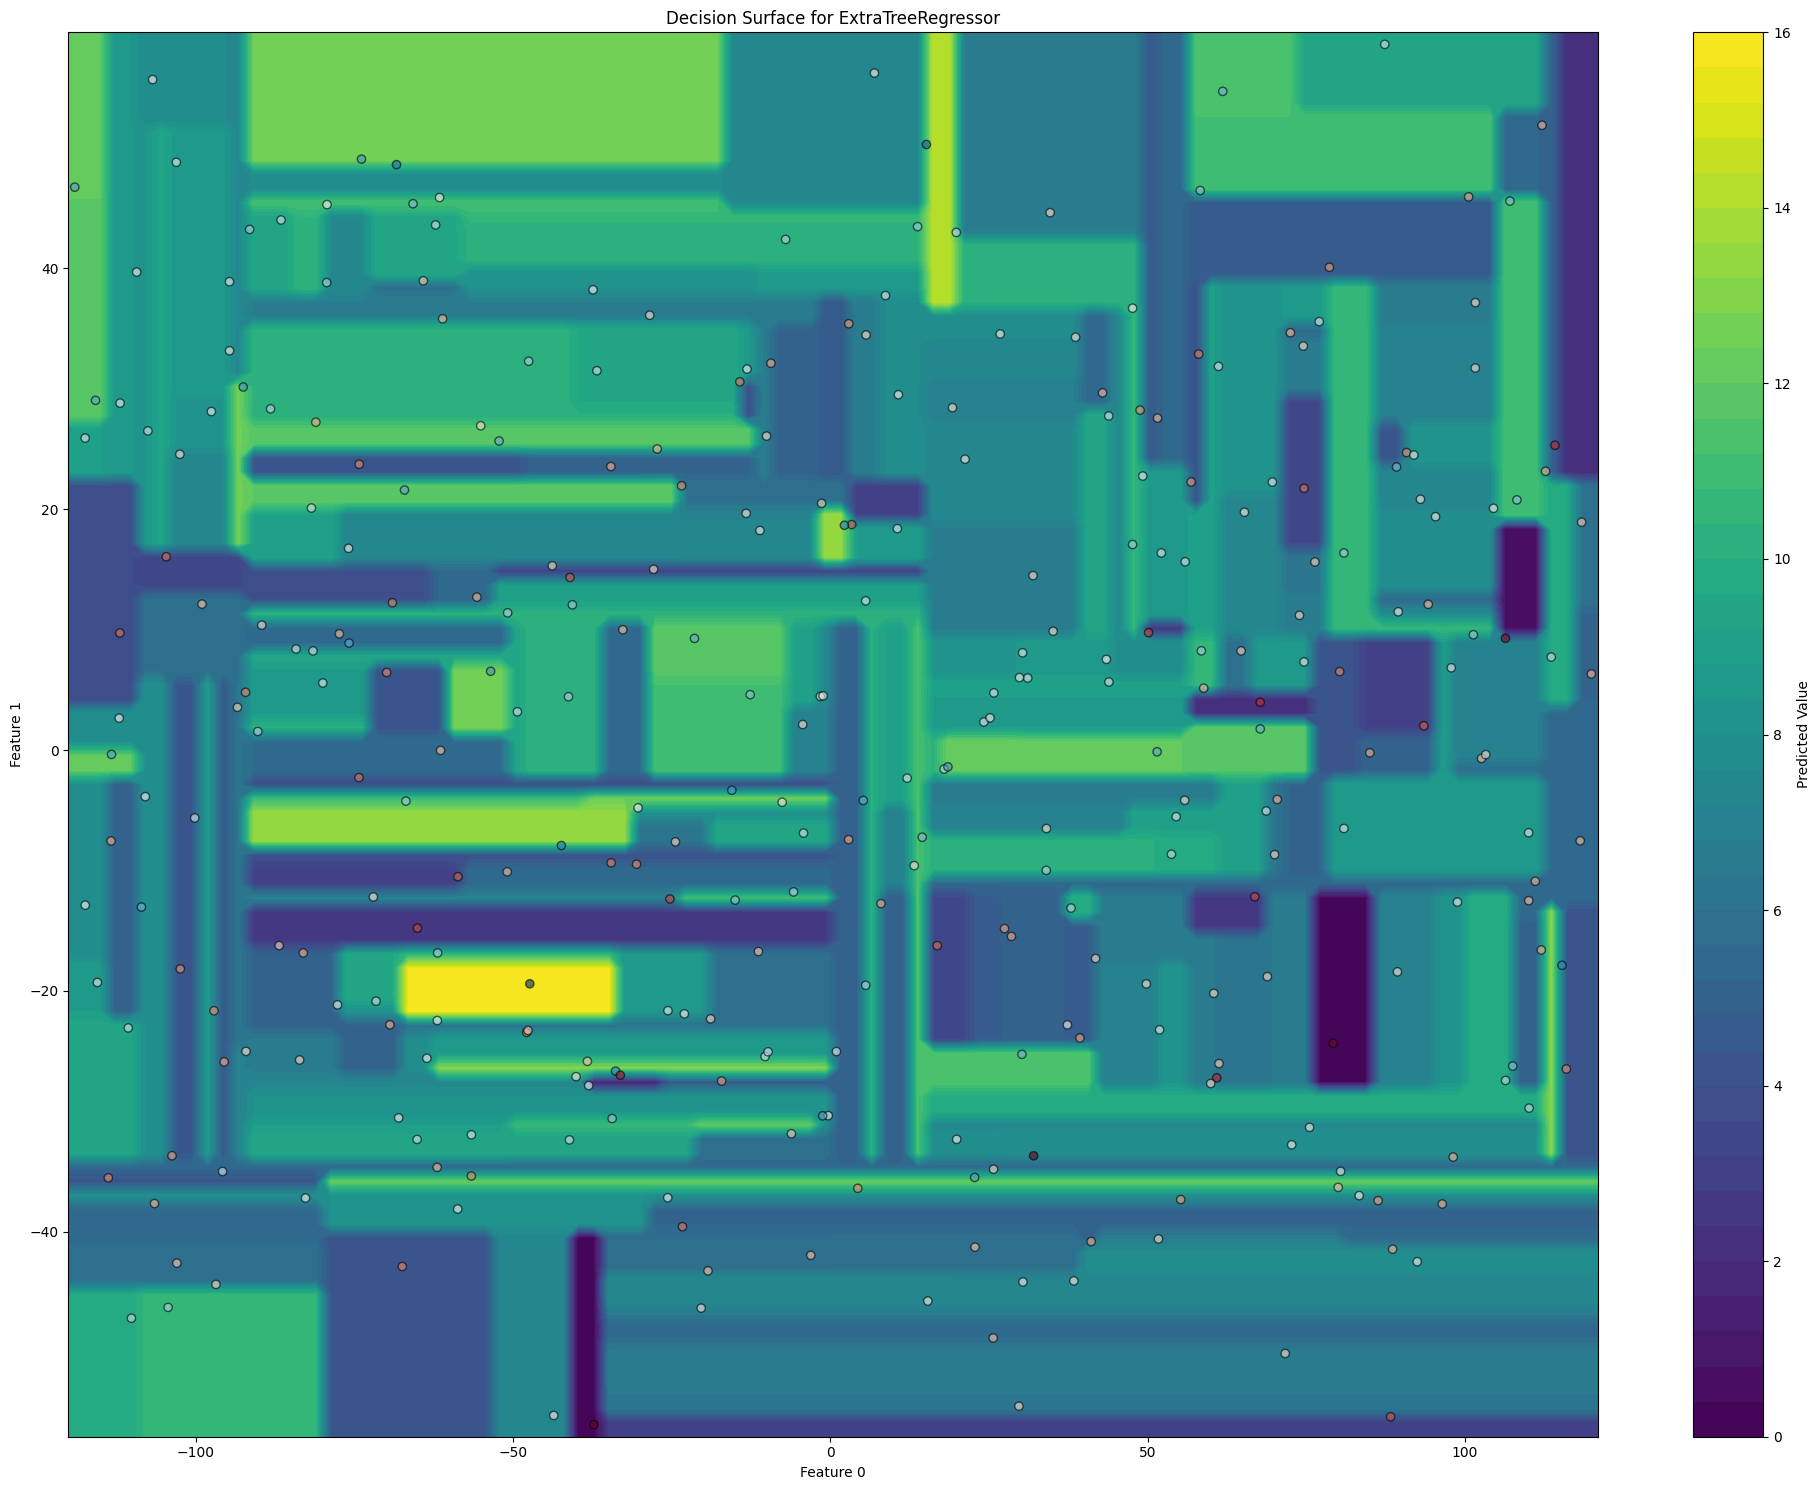

----------------------------------------------------------------------------------------------------


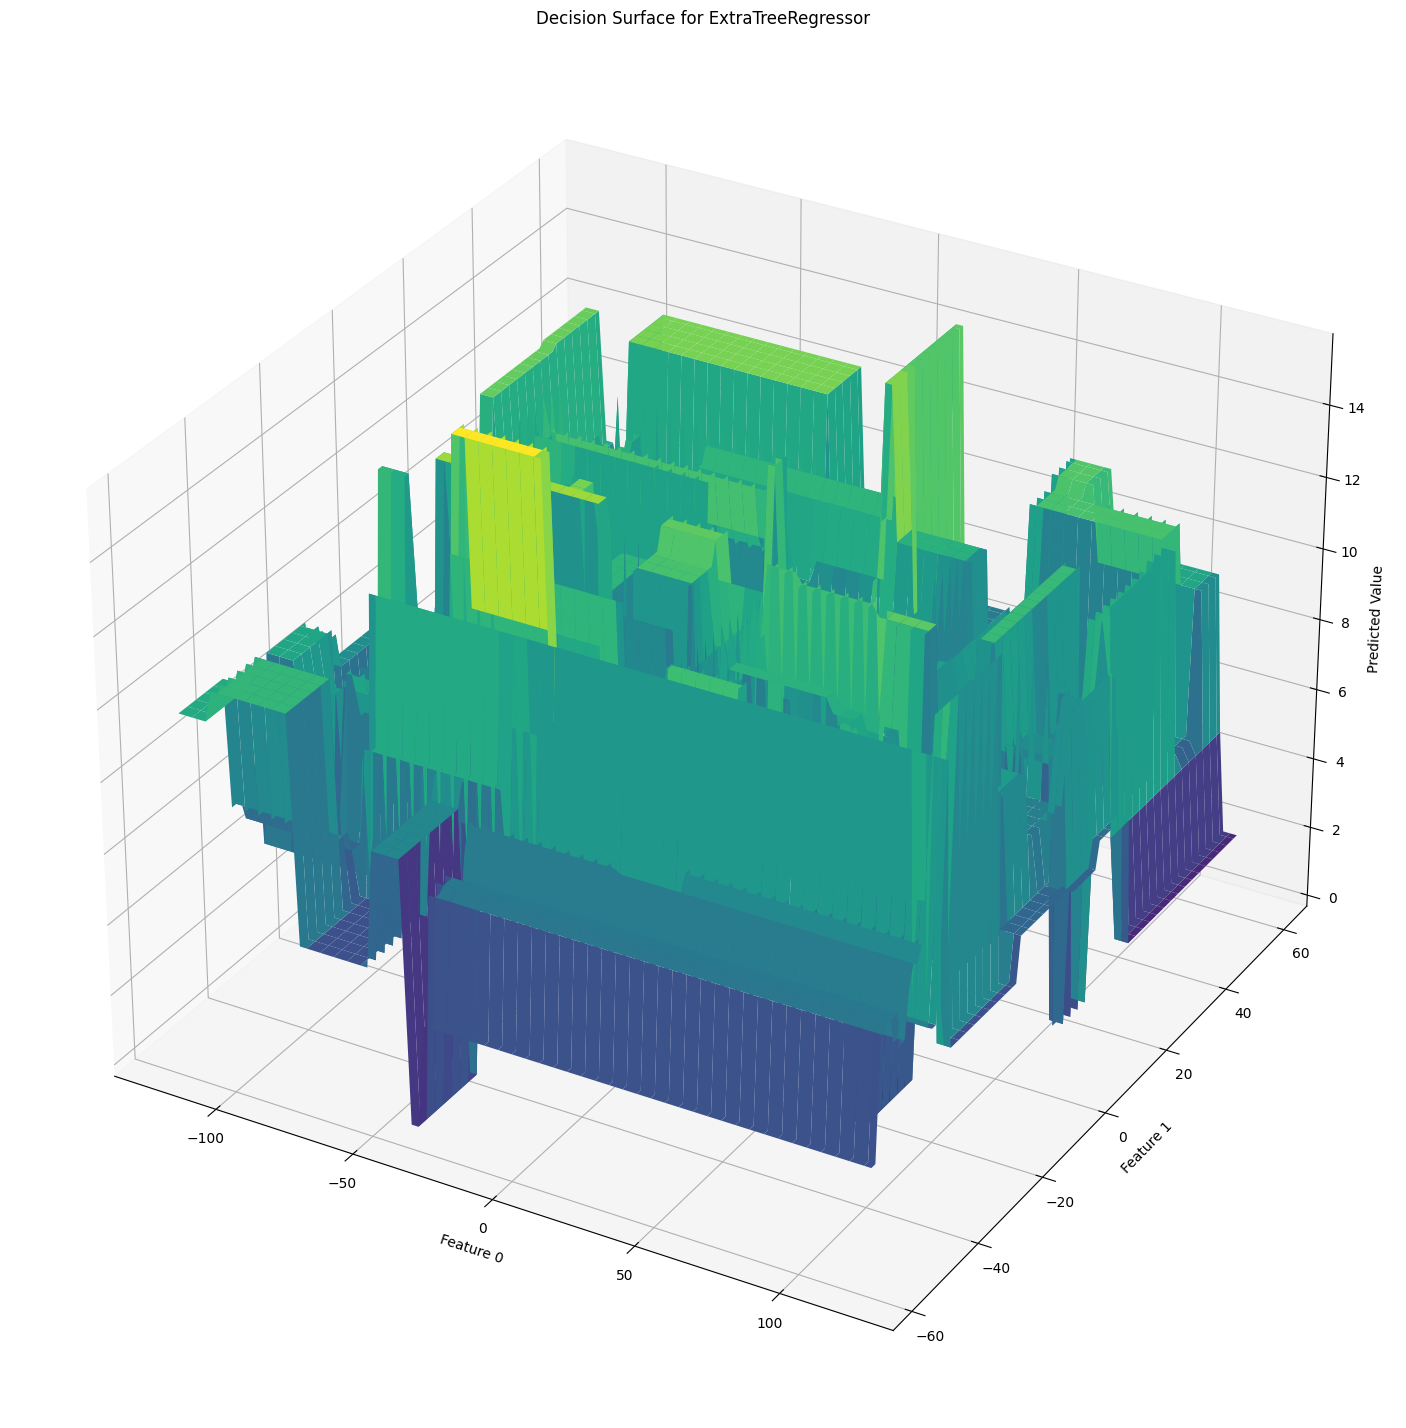

In [28]:
# Prepare input for prediction on the mesh grid
mesh_points = np.zeros((x1.size, x_train.shape[1]))
mesh_points[:, feature_1_idx] = x1.ravel()
mesh_points[:, feature_2_idx] = x2.ravel()
    
# Fill the remaining features with the mean of x_train (or another strategy)
for i in range(x_train.shape[1]):
    if i not in [feature_1_idx, feature_2_idx]:
        mesh_points[:, i] = x_train[:, i].mean()
model=ExtraTreeRegressor(random_state=42)
model=model.fit(x_train, y_train)
# Predict on the mesh grid
predictions = model.predict(mesh_points)
predictions = predictions.reshape(x1.shape)

# Plot the decision surface as a heatmap
plt.figure(figsize=(20, 15))
plt.contourf(x1, x2, predictions, cmap='viridis', levels=50)
plt.colorbar(label='Predicted Value')
plt.scatter(x_train[:, feature_1_idx], x_train[:, feature_2_idx], c=y_train, edgecolor='k', cmap='RdBu', alpha=0.6)
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.title(f'Decision Surface for {name}')
plt.tight_layout()
plt.show()
print('-'*100)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, predictions, cmap='viridis')
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.set_zlabel('Predicted Value')
plt.title(f'Decision Surface for {name}')
plt.show()

### After hyperparameters tuning

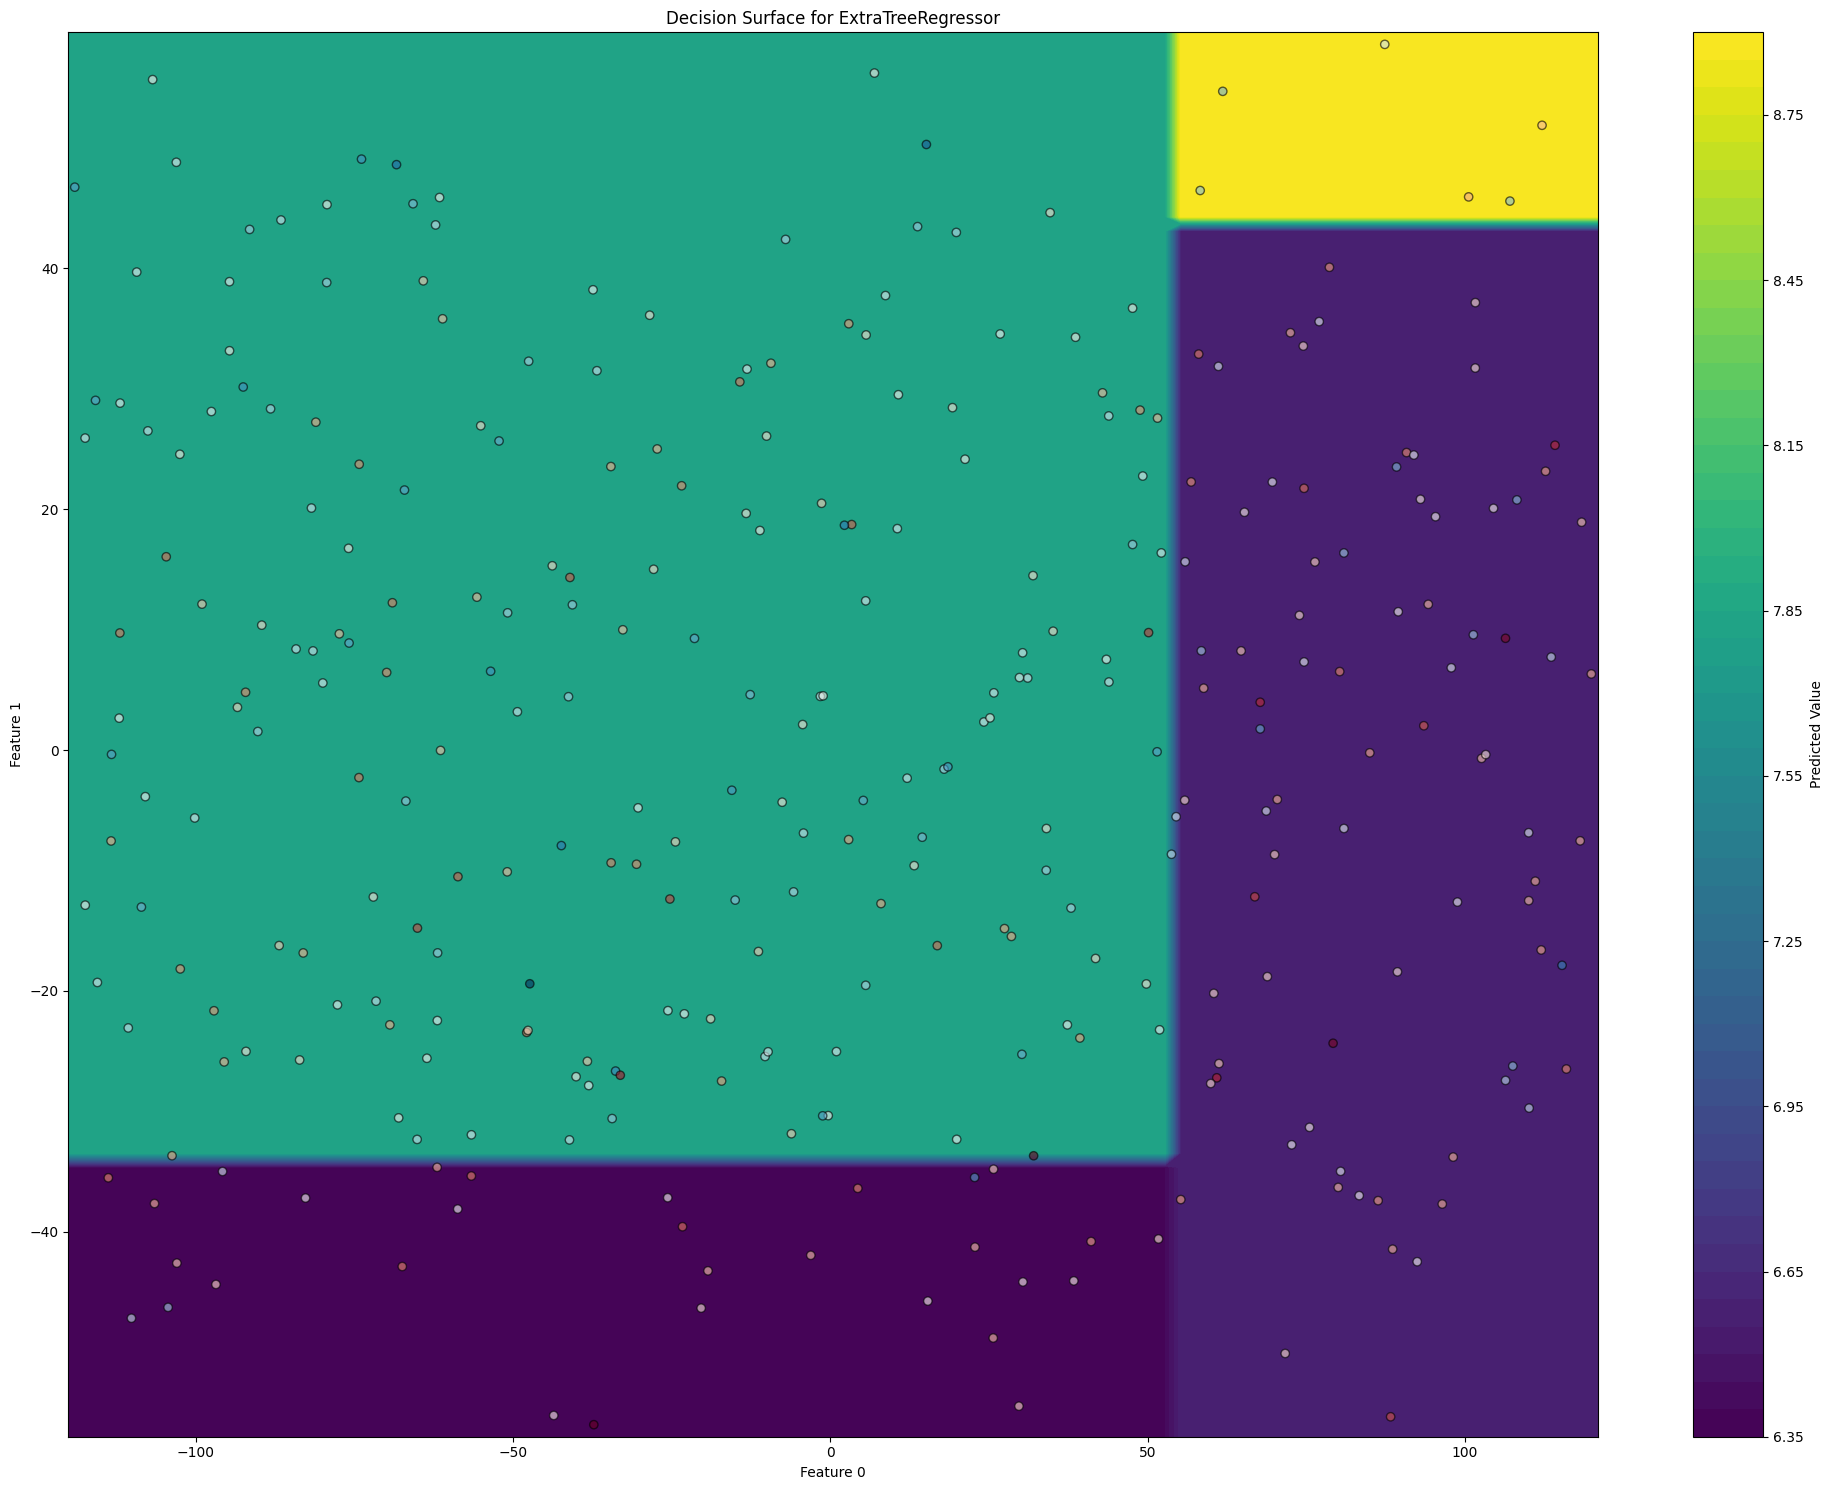

----------------------------------------------------------------------------------------------------


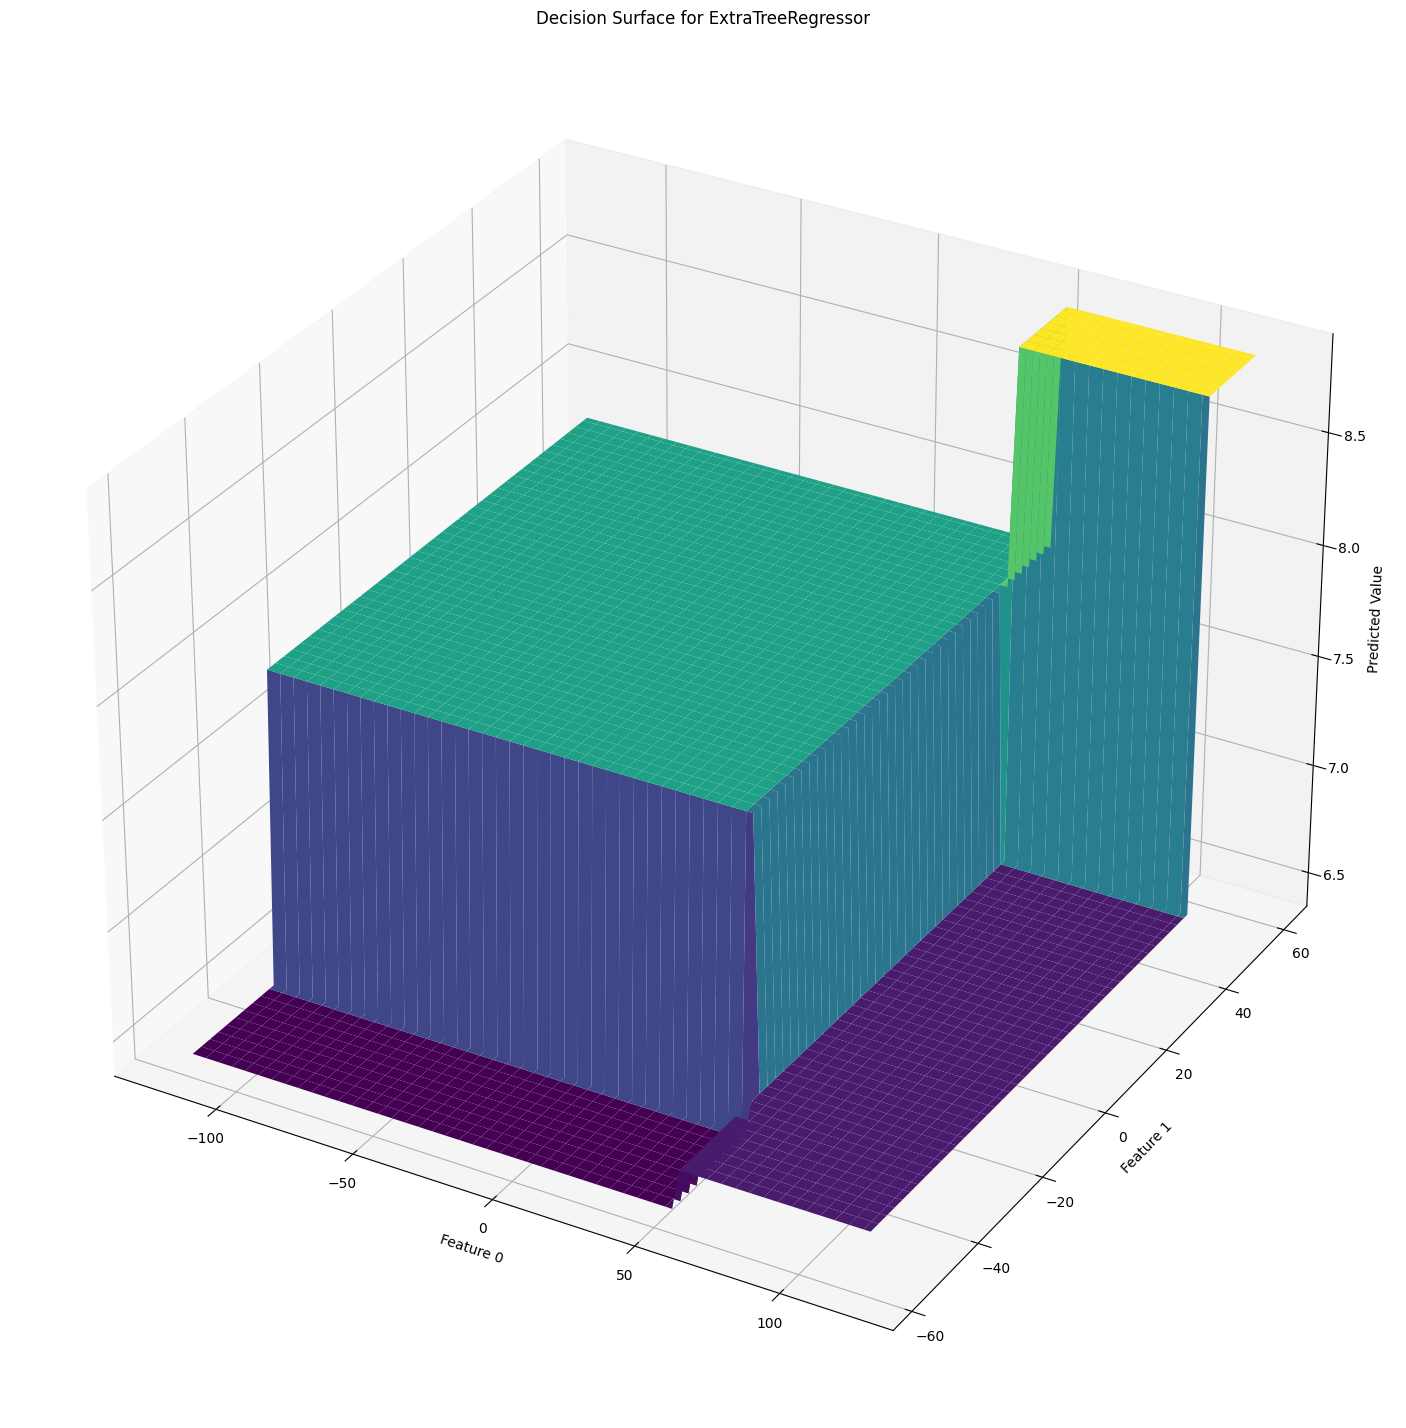

In [29]:
# Prepare input for prediction on the mesh grid
mesh_points = np.zeros((x1.size, x_train.shape[1]))
mesh_points[:, feature_1_idx] = x1.ravel()
mesh_points[:, feature_2_idx] = x2.ravel()
    
# Fill the remaining features with the mean of x_train (or another strategy)
for i in range(x_train.shape[1]):
    if i not in [feature_1_idx, feature_2_idx]:
        mesh_points[:, i] = x_train[:, i].mean()

# Predict on the mesh grid
predictions = best_model.predict(mesh_points)
predictions = predictions.reshape(x1.shape)

# Plot the decision surface as a heatmap
plt.figure(figsize=(20, 15))
plt.contourf(x1, x2, predictions, cmap='viridis', levels=50)
plt.colorbar(label='Predicted Value')
plt.scatter(x_train[:, feature_1_idx], x_train[:, feature_2_idx], c=y_train, edgecolor='k', cmap='RdBu', alpha=0.6)
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.title(f'Decision Surface for {name}')
plt.tight_layout()
plt.show()
print('-'*100)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, predictions, cmap='viridis')
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.set_zlabel('Predicted Value')
plt.title(f'Decision Surface for {name}')
plt.show()

## Visualize fit of the model before and after hyperparameters tuning

### Fit of the model before hyperparameters tuning on first feature

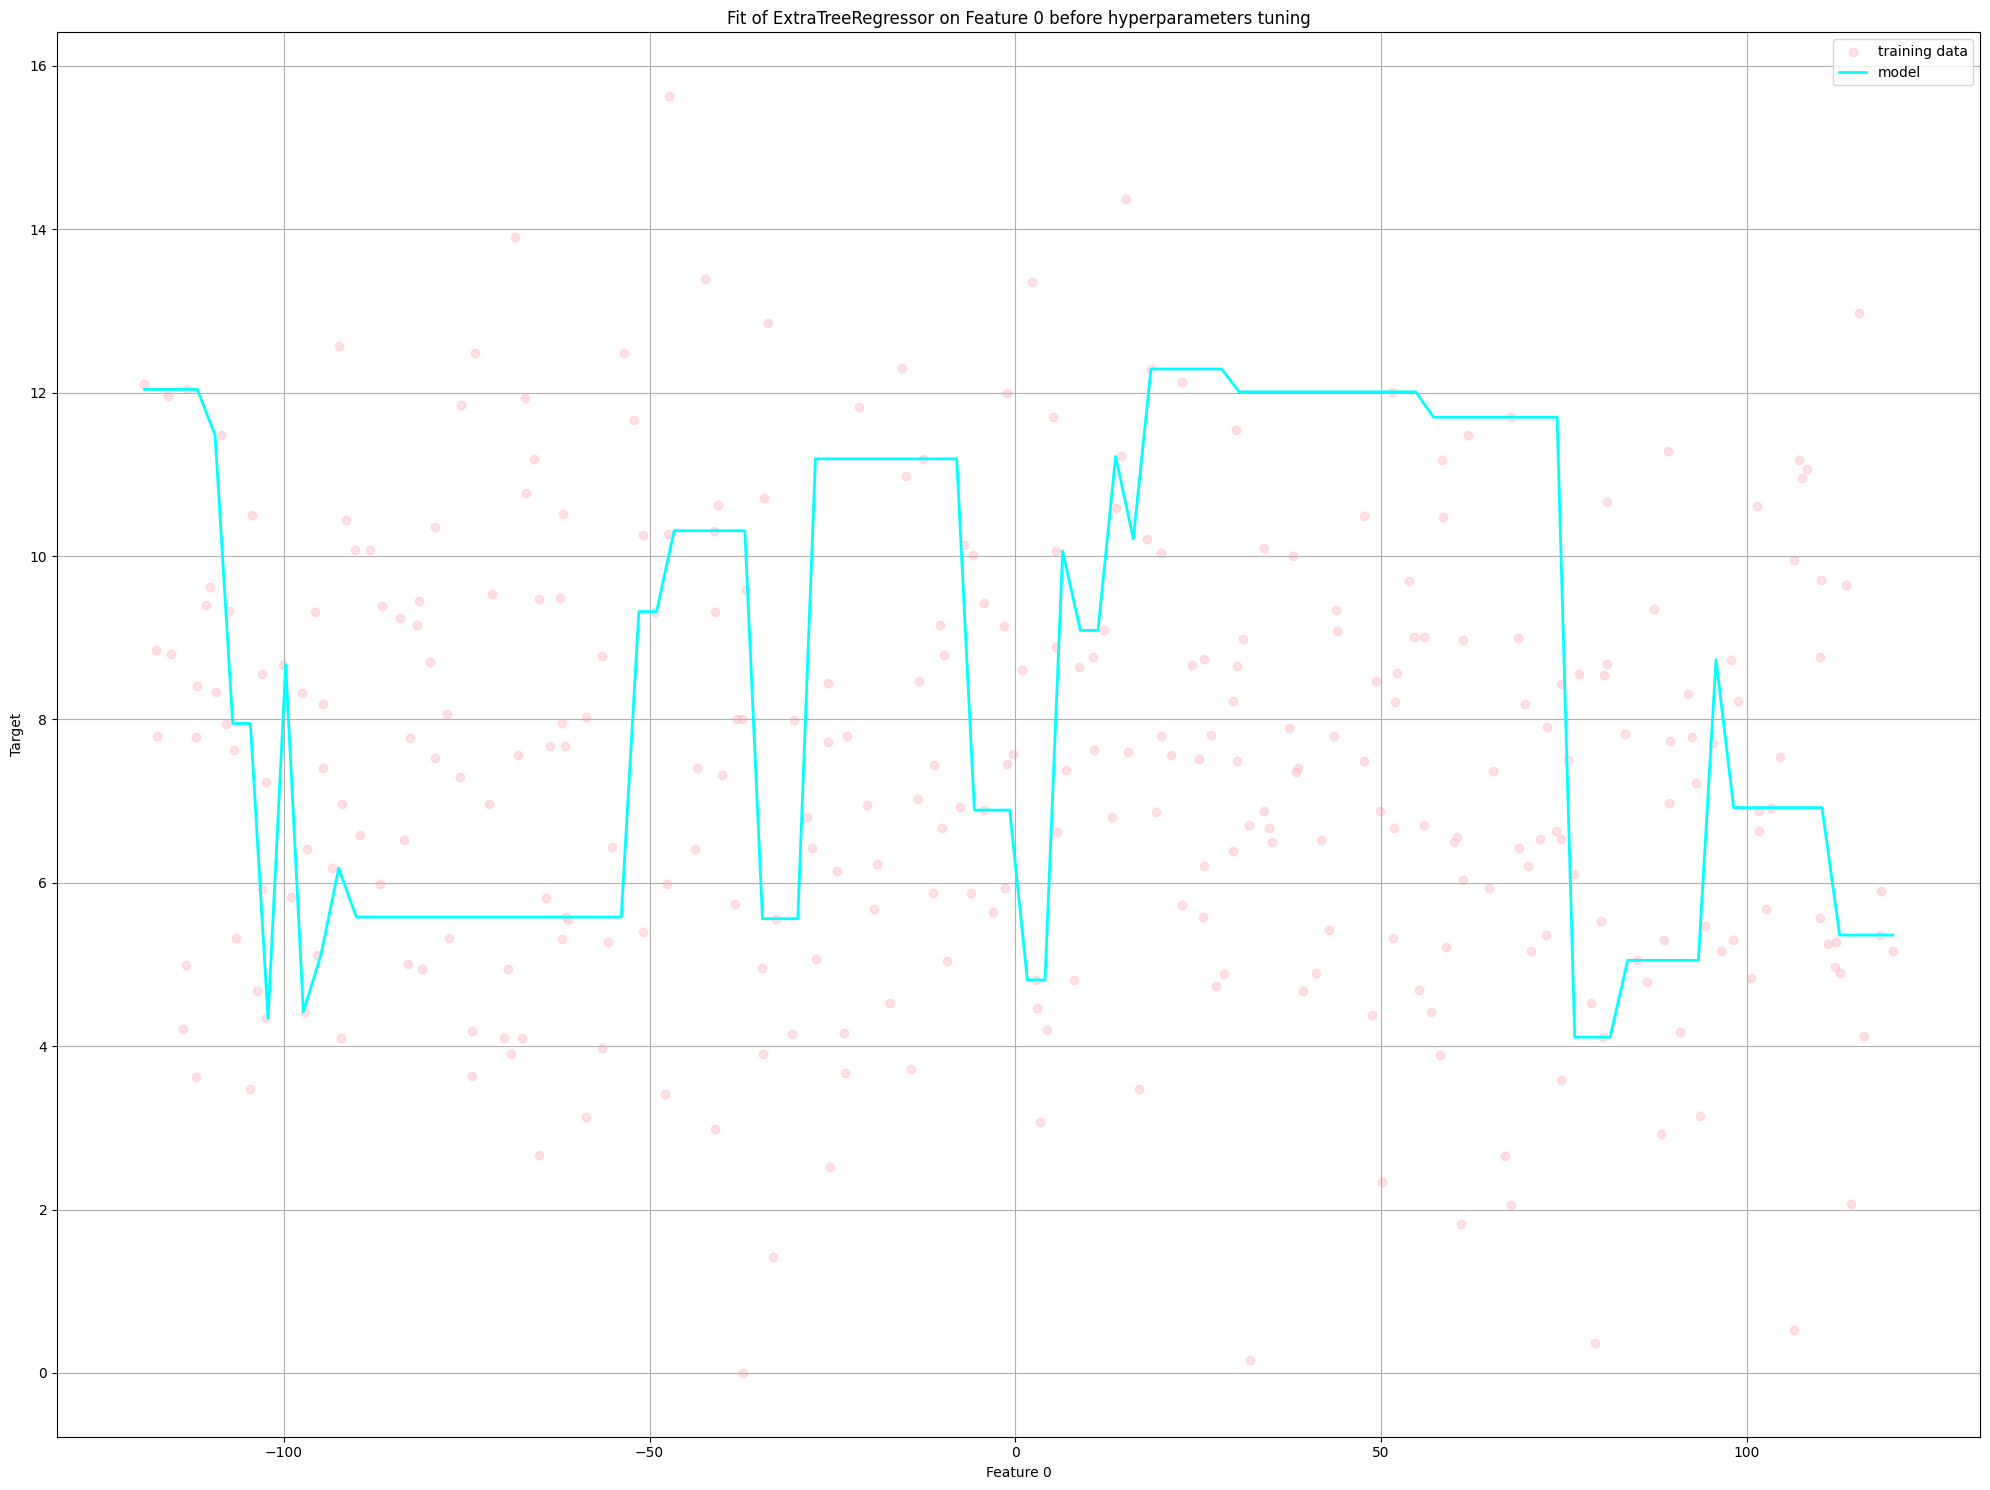

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import ExtraTreeRegressor

# Ensure x_train and y_train are numpy arrays for easier indexing
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Assuming x_feature and feature_name are defined
# For example:
feature_idx = 0  # First feature
feature_name = f"Feature {feature_idx}" if not isinstance(x_train, pd.DataFrame) else x_train.columns[feature_idx]
x_feature = x_train[:, feature_idx]

# Generate points for the regression line
x_range = np.linspace(x_feature.min(), x_feature.max(), 100)

# Create an input array for prediction with the same number of features as x_train
n_features = x_train.shape[1]
x_range_full = np.zeros((x_range.shape[0], n_features))  # Create an array with the correct number of features
x_range_full[:, feature_idx] = x_range  # Set the selected feature values

# Fill the other features with the mean of their respective columns from x_train
for i in range(n_features):
    if i != feature_idx:
        x_range_full[:, i] = x_train[:, i].mean()

# Fit the model and predict
model = ExtraTreeRegressor(random_state=42)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_range_full)

# Create the scatter plot with the regression line
plt.figure(figsize=(20, 15))
plt.scatter(x_feature, y_train, color='pink', alpha=0.5, label='training data')
plt.plot(x_range, y_pred, color='cyan', label='model', linewidth=2)
plt.xlabel(feature_name)
plt.ylabel('Target')
plt.title(f'Fit of ExtraTreeRegressor on {feature_name} before hyperparameters tuning')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Fit of the model after hyperparameters tuning on first feature

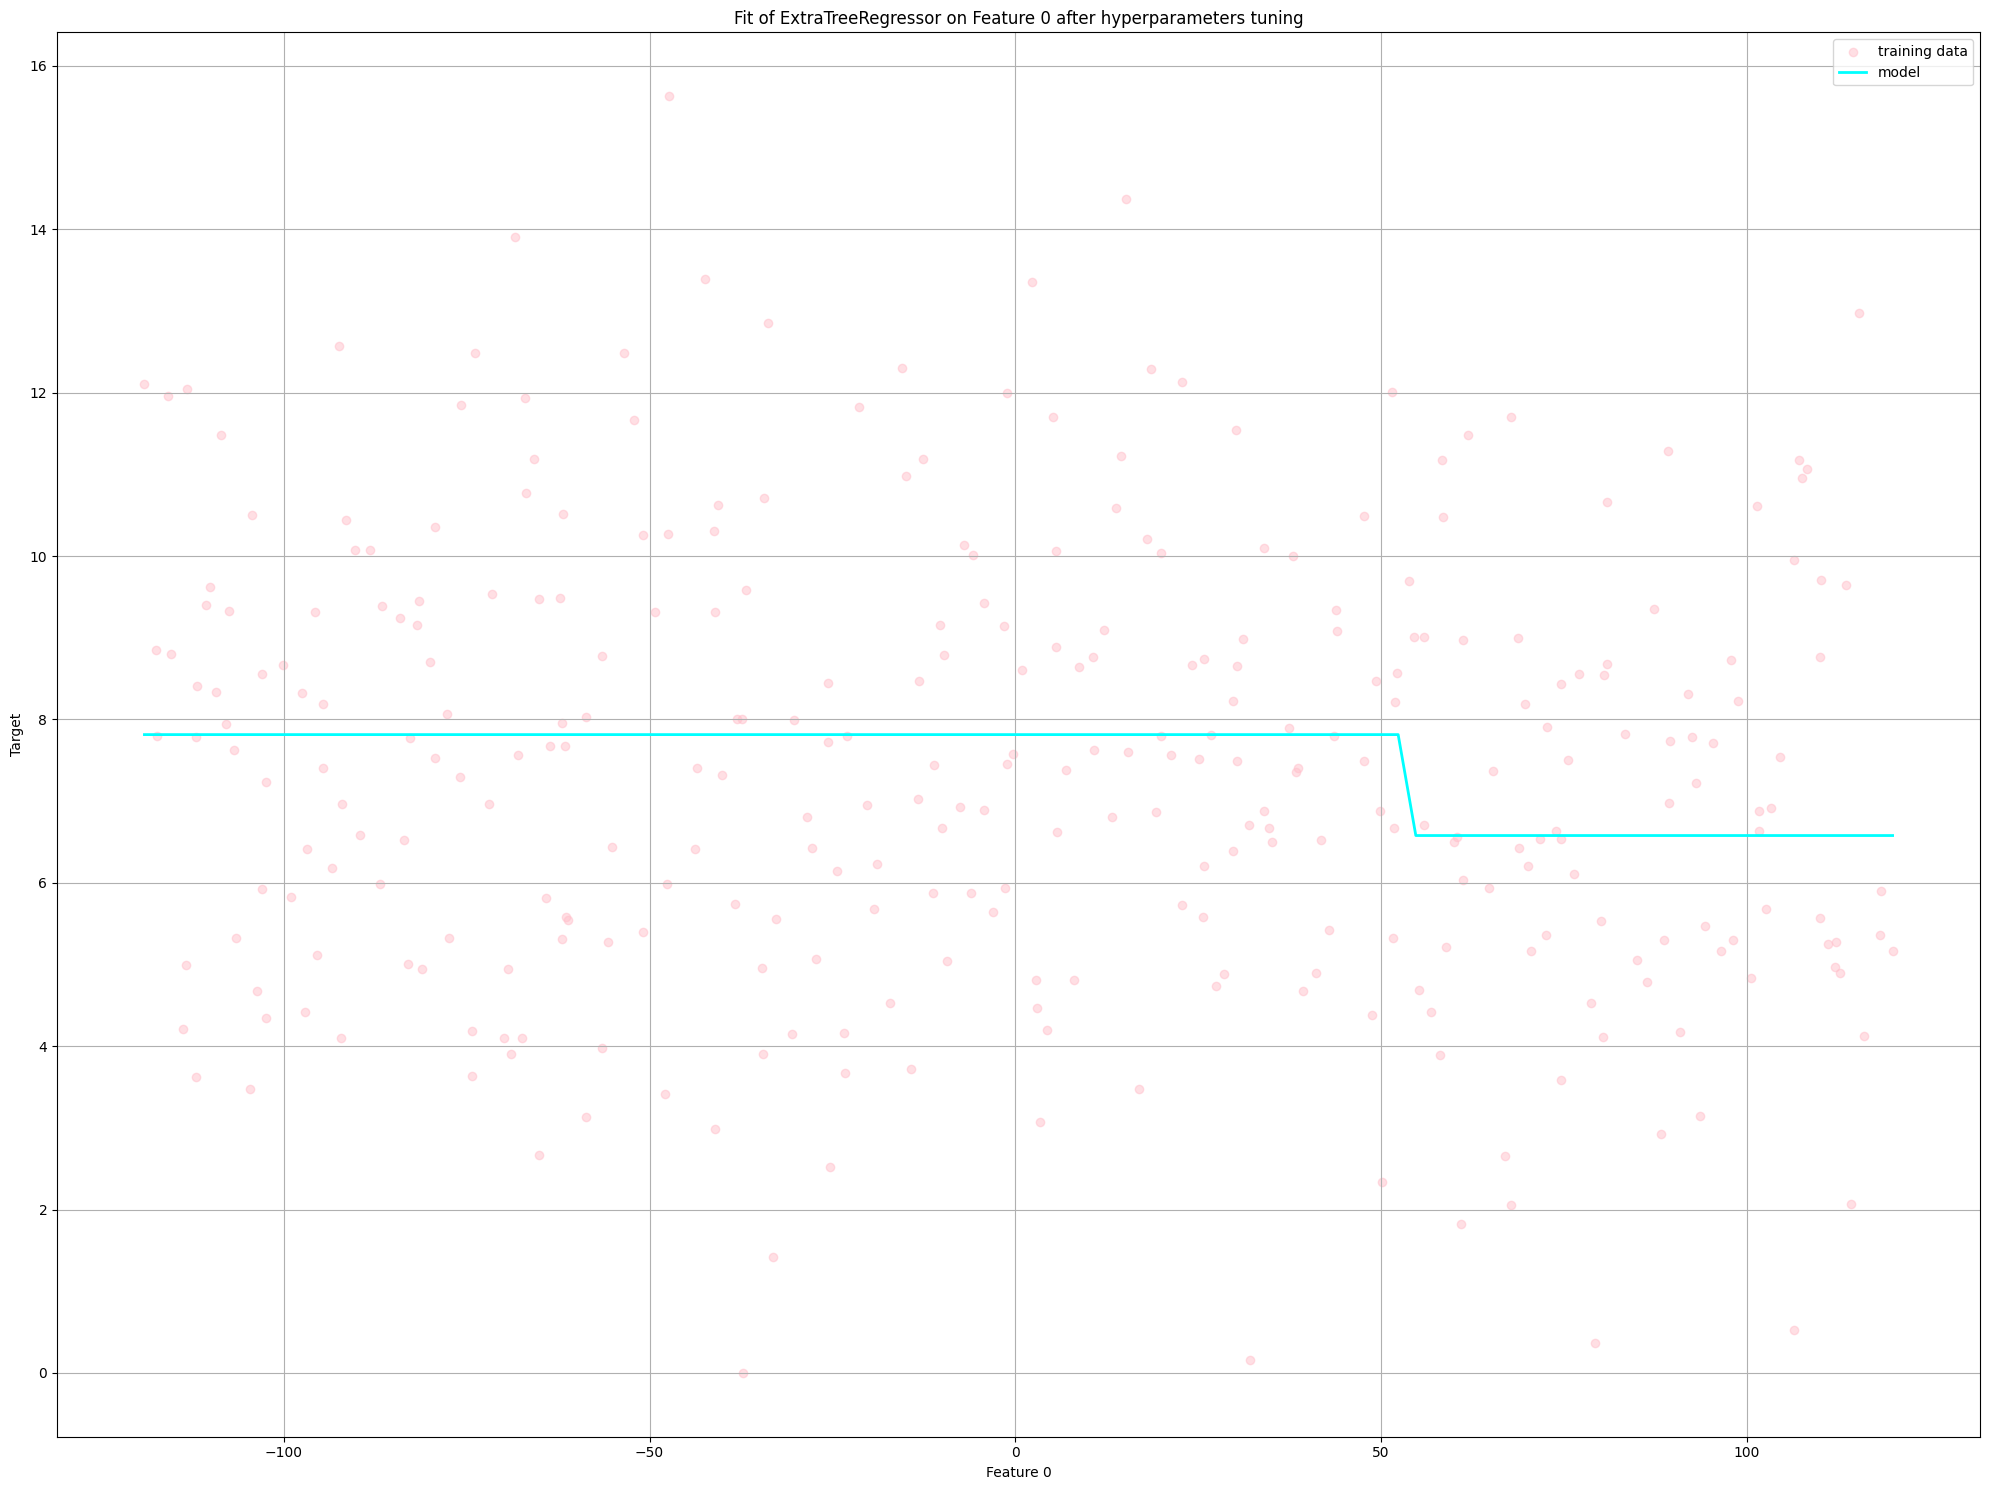

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import ExtraTreeRegressor

# Ensure x_train and y_train are numpy arrays for easier indexing
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Assuming x_feature and feature_name are defined
# For example:
feature_idx = 0  # First feature
feature_name = f"Feature {feature_idx}" if not isinstance(x_train, pd.DataFrame) else x_train.columns[feature_idx]
x_feature = x_train[:, feature_idx]

# Generate points for the regression line
x_range = np.linspace(x_feature.min(), x_feature.max(), 100)

# Create an input array for prediction with the same number of features as x_train
n_features = x_train.shape[1]
x_range_full = np.zeros((x_range.shape[0], n_features))  # Create an array with the correct number of features
x_range_full[:, feature_idx] = x_range  # Set the selected feature values

# Fill the other features with the mean of their respective columns from x_train
for i in range(n_features):
    if i != feature_idx:
        x_range_full[:, i] = x_train[:, i].mean()

# Fit the model and predict
y_pred = best_model.predict(x_range_full)

# Create the scatter plot with the regression line
plt.figure(figsize=(20, 15))
plt.scatter(x_feature, y_train, color='pink', alpha=0.5, label='training data')
plt.plot(x_range, y_pred, color='cyan', label='model', linewidth=2)
plt.xlabel(feature_name)
plt.ylabel('Target')
plt.title(f'Fit of ExtraTreeRegressor on {feature_name} after hyperparameters tuning')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Fit of the model before hyperparameters tuning on second feature

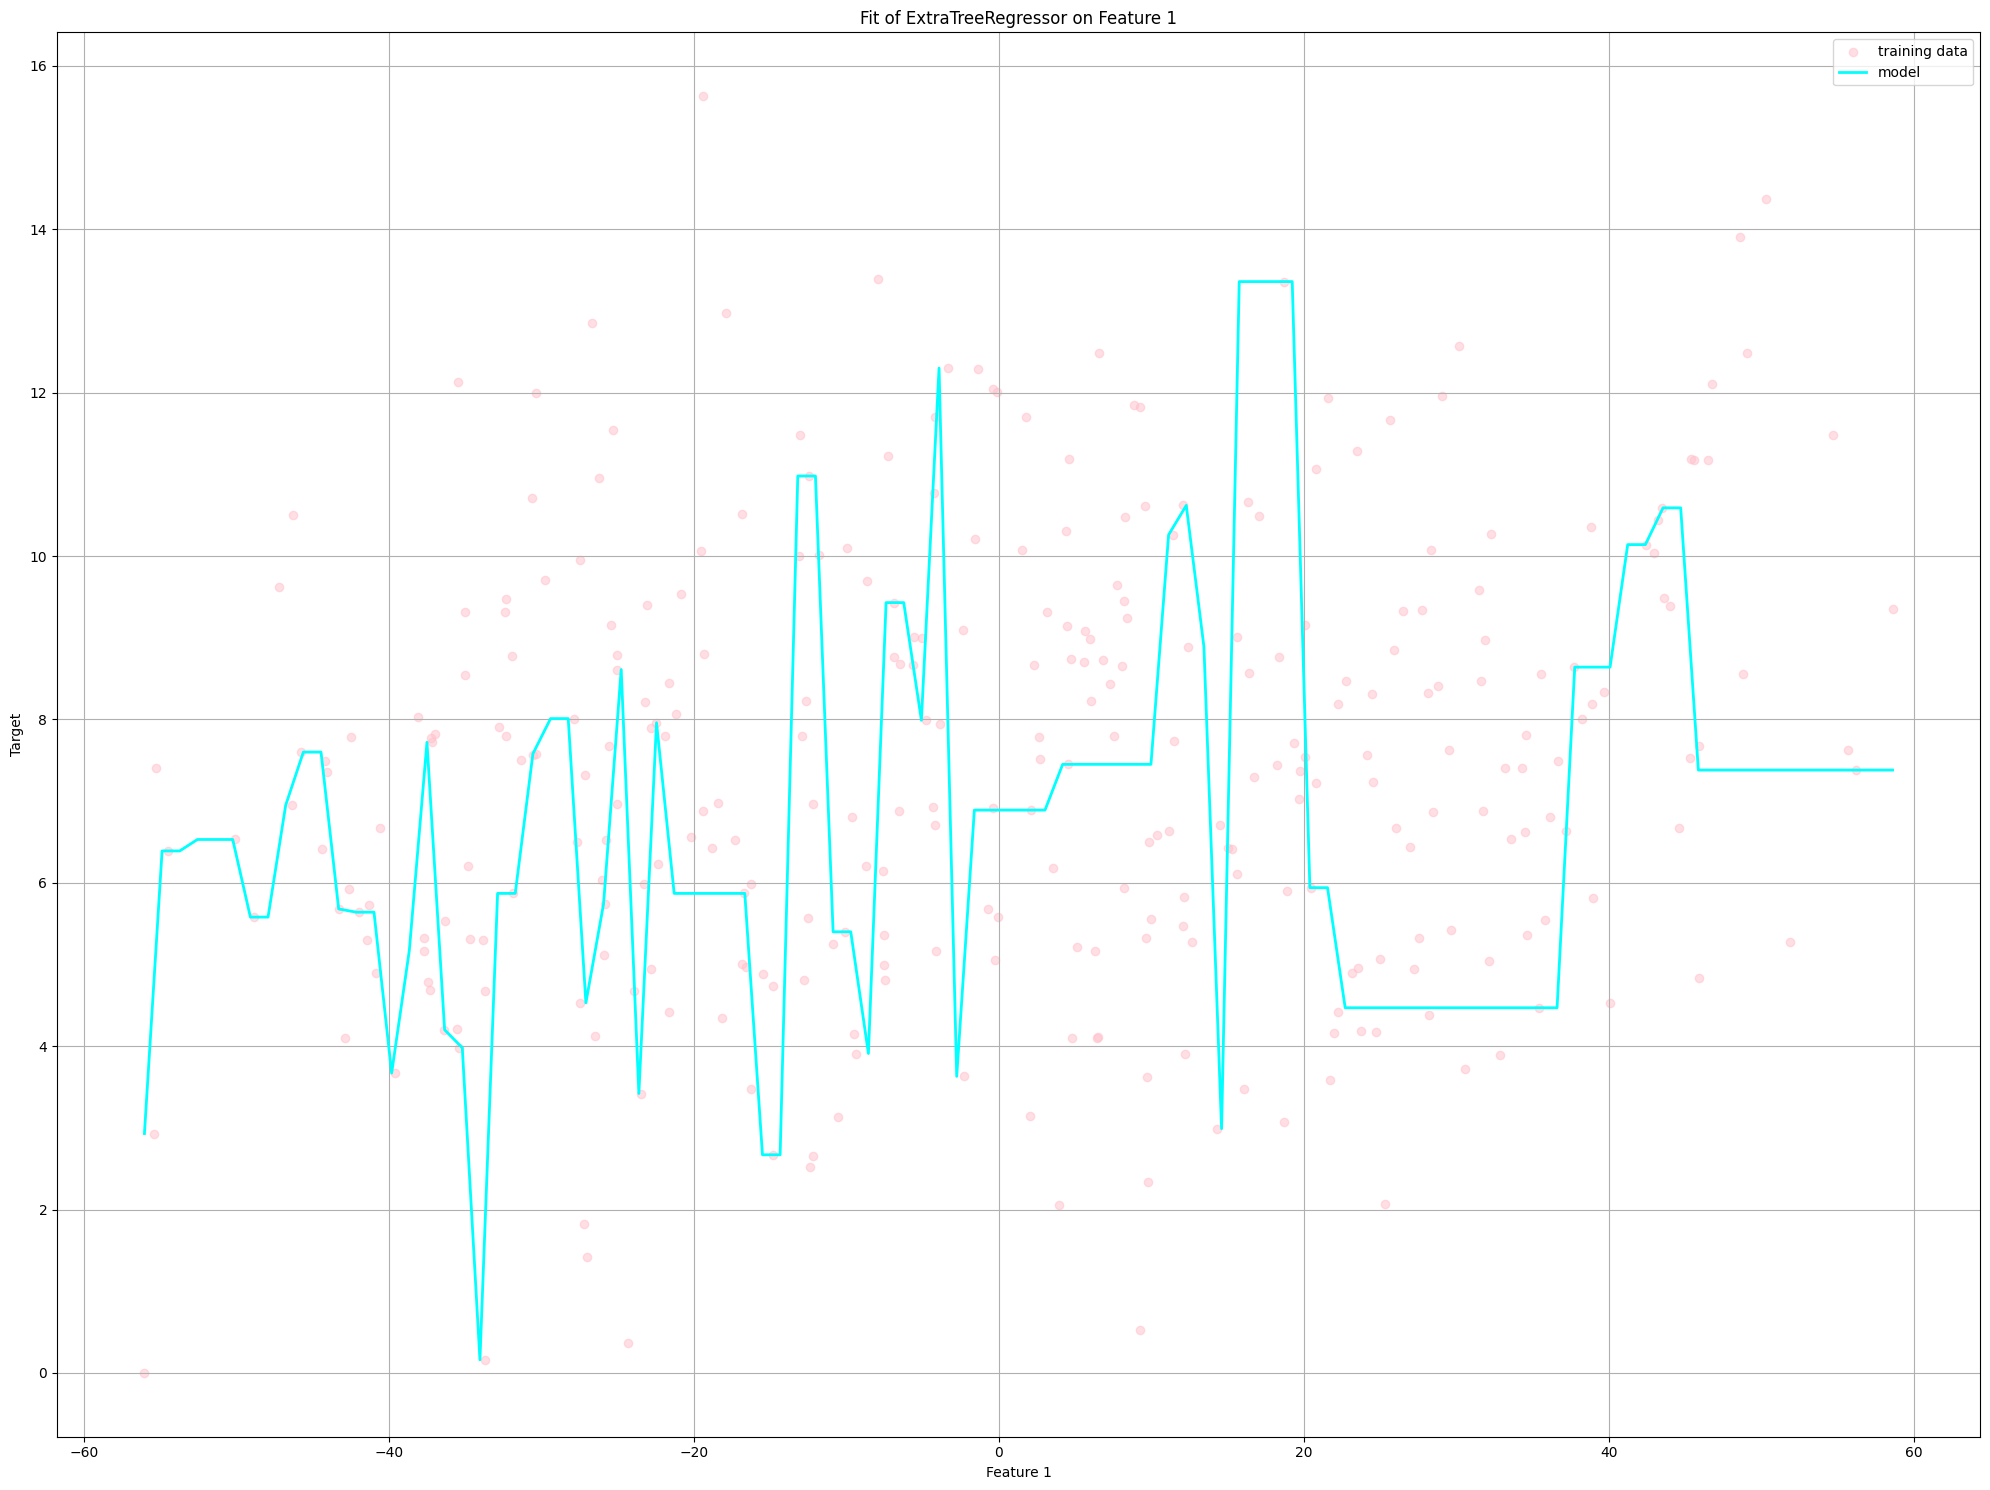

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import ExtraTreeRegressor

# Ensure x_train and y_train are numpy arrays for easier indexing
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Assuming x_feature and feature_name are defined
# For example:
feature_idx = 1  # second feature
feature_name = f"Feature {feature_idx}" if not isinstance(x_train, pd.DataFrame) else x_train.columns[feature_idx]
x_feature = x_train[:, feature_idx]

# Generate points for the regression line
x_range = np.linspace(x_feature.min(), x_feature.max(), 100)

# Create an input array for prediction with the same number of features as x_train
n_features = x_train.shape[1]
x_range_full = np.zeros((x_range.shape[0], n_features))  # Create an array with the correct number of features
x_range_full[:, feature_idx] = x_range  # Set the selected feature values

# Fill the other features with the mean of their respective columns from x_train
for i in range(n_features):
    if i != feature_idx:
        x_range_full[:, i] = x_train[:, i].mean()

# Fit the model and predict
model = ExtraTreeRegressor(random_state=42)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_range_full)

# Create the scatter plot with the regression line
plt.figure(figsize=(20, 15))
plt.scatter(x_feature, y_train, color='pink', alpha=0.5, label='training data')
plt.plot(x_range, y_pred, color='cyan', label='model', linewidth=2)
plt.xlabel(feature_name)
plt.ylabel('Target')
plt.title(f'Fit of ExtraTreeRegressor on {feature_name}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Fit of the model after hyperparameters tuning on second feature

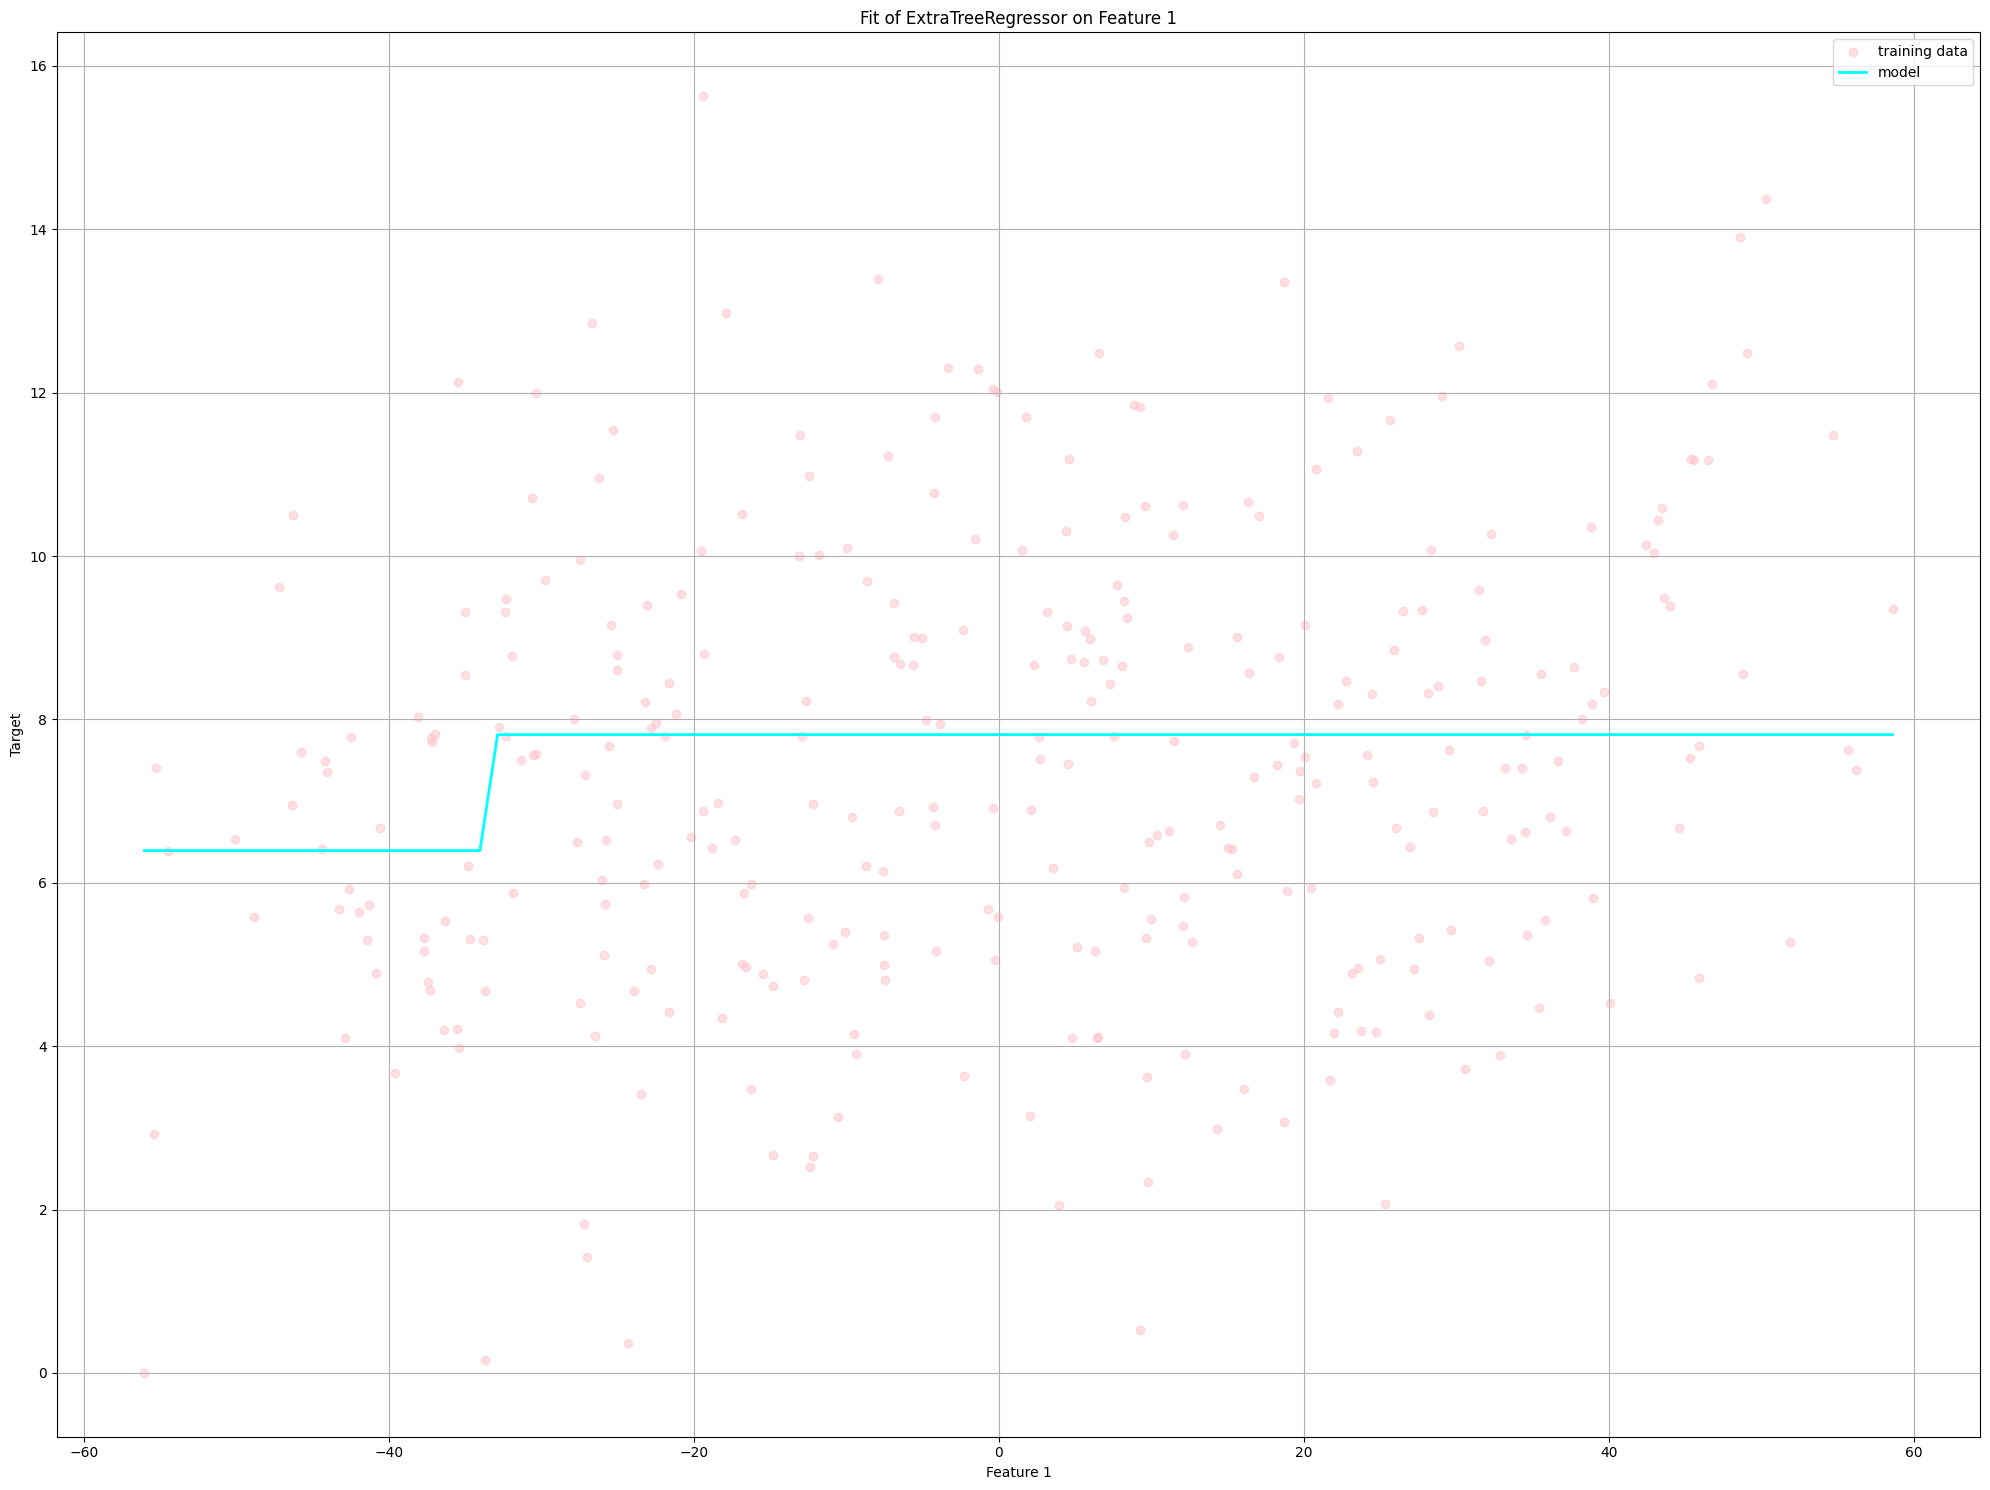

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import ExtraTreeRegressor

# Ensure x_train and y_train are numpy arrays for easier indexing
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Assuming x_feature and feature_name are defined
# For example:
feature_idx = 1  # second feature
feature_name = f"Feature {feature_idx}" if not isinstance(x_train, pd.DataFrame) else x_train.columns[feature_idx]
x_feature = x_train[:, feature_idx]

# Generate points for the regression line
x_range = np.linspace(x_feature.min(), x_feature.max(), 100)

# Create an input array for prediction with the same number of features as x_train
n_features = x_train.shape[1]
x_range_full = np.zeros((x_range.shape[0], n_features))  # Create an array with the correct number of features
x_range_full[:, feature_idx] = x_range  # Set the selected feature values

# Fill the other features with the mean of their respective columns from x_train
for i in range(n_features):
    if i != feature_idx:
        x_range_full[:, i] = x_train[:, i].mean()

# Fit the model and predict
y_pred = best_model.predict(x_range_full)

# Create the scatter plot with the regression line
plt.figure(figsize=(20, 15))
plt.scatter(x_feature, y_train, color='pink', alpha=0.5, label='training data')
plt.plot(x_range, y_pred, color='cyan', label='model', linewidth=2)
plt.xlabel(feature_name)
plt.ylabel('Target')
plt.title(f'Fit of ExtraTreeRegressor on {feature_name}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Evaluation

## Decision Boundary of the model

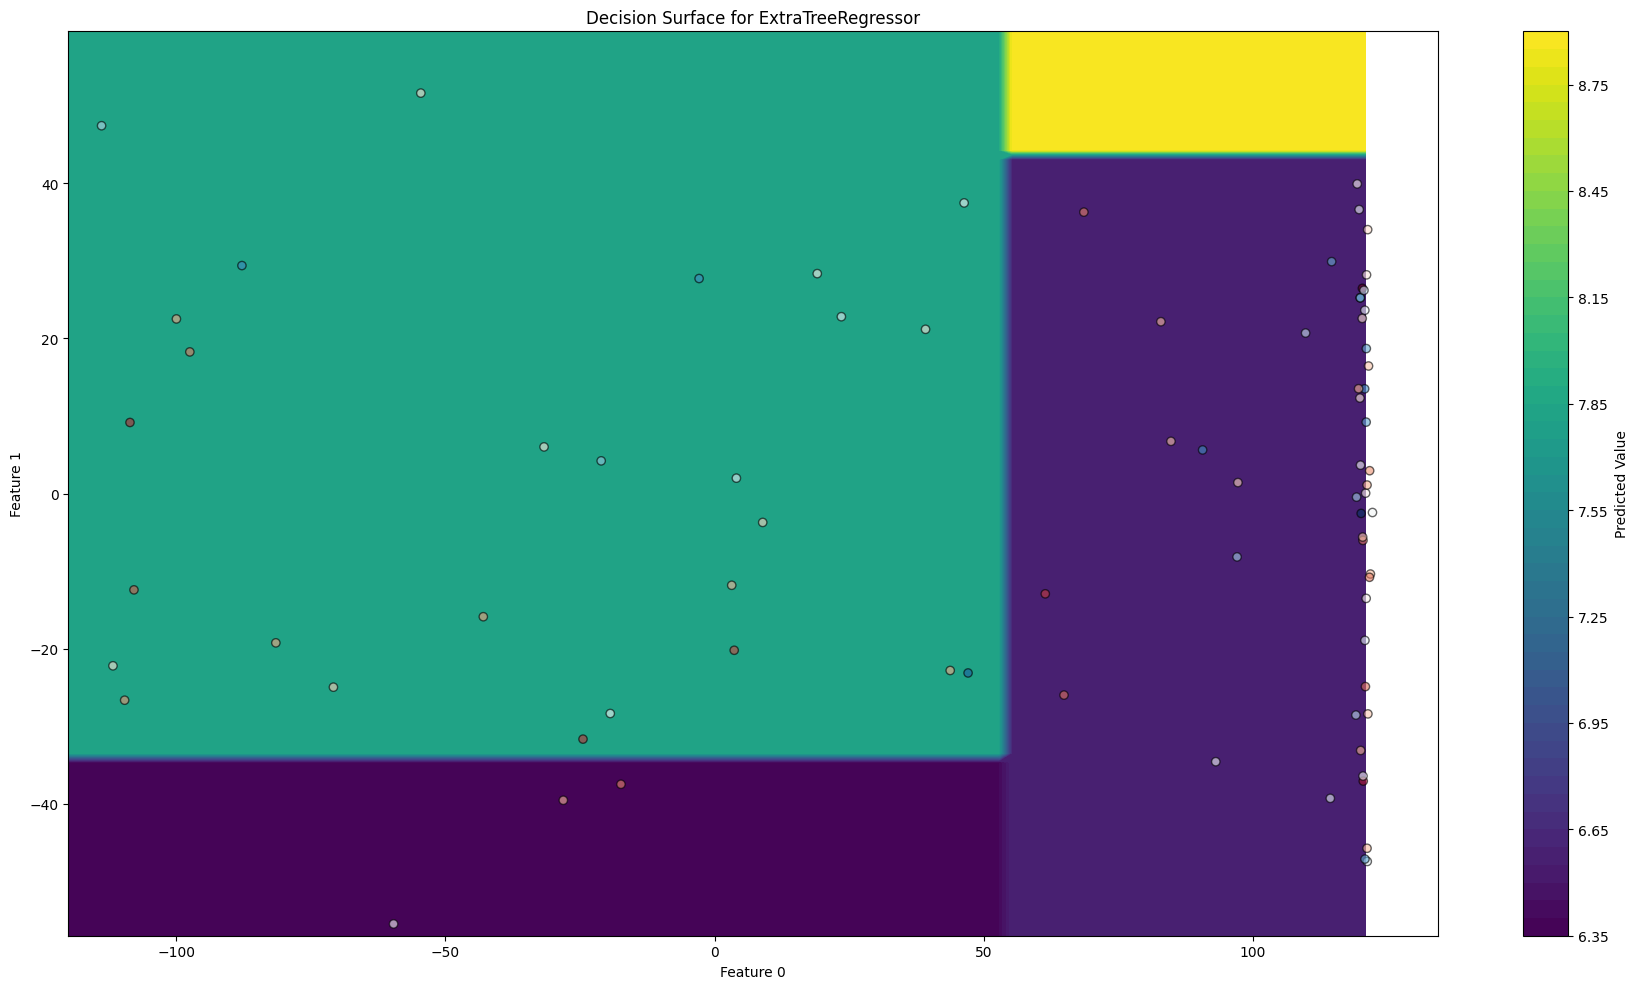

----------------------------------------------------------------------------------------------------


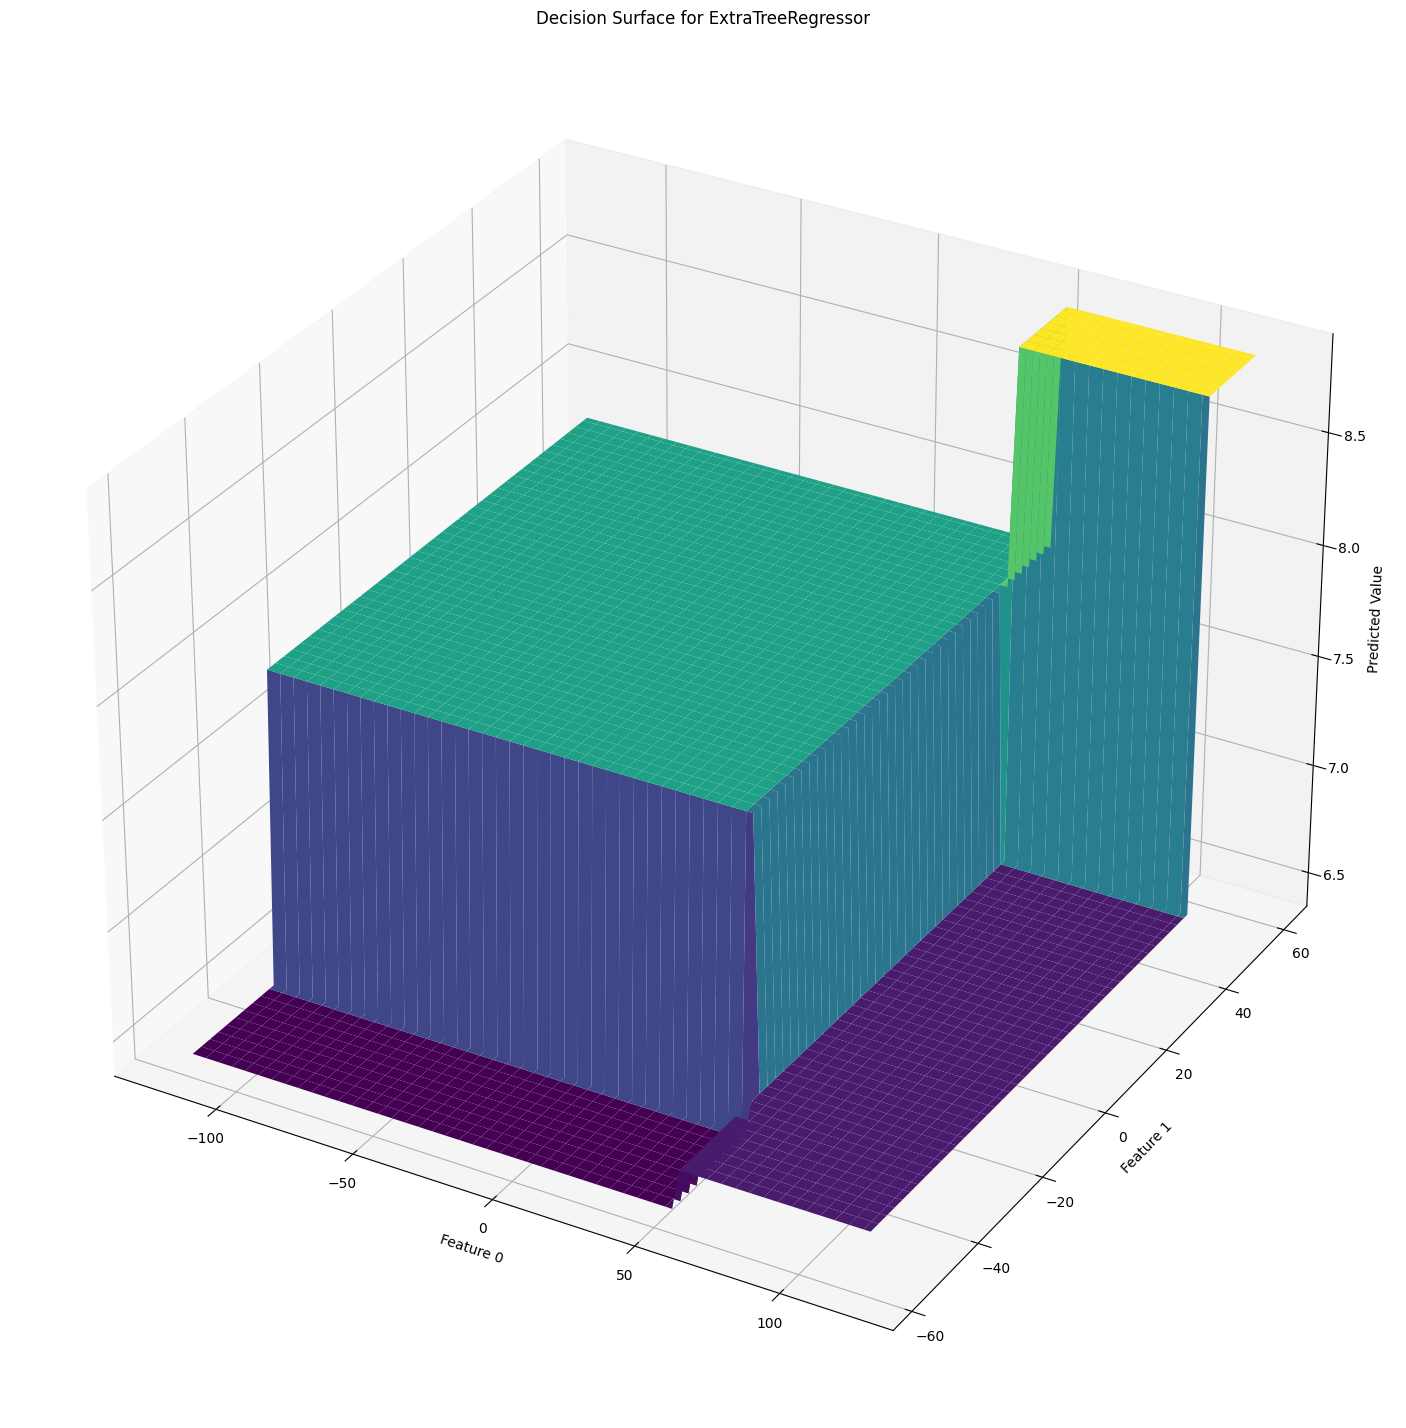

In [34]:
# Prepare input for prediction on the mesh grid
mesh_points = np.zeros((x1.size, x_test.shape[1]))
mesh_points[:, feature_1_idx] = x1.ravel()
mesh_points[:, feature_2_idx] = x2.ravel()
    
# Fill the remaining features with the mean of x_train (or another strategy)
for i in range(x_test.shape[1]):
    if i not in [feature_1_idx, feature_2_idx]:
        mesh_points[:, i] = x_train[:, i].mean()

# Predict on the mesh grid
predictions = best_model.predict(mesh_points)
predictions = predictions.reshape(x1.shape)

# Plot the decision surface as a heatmap
plt.figure(figsize=(18, 10))
plt.contourf(x1, x2, predictions, cmap='viridis', levels=50)
plt.colorbar(label='Predicted Value')
plt.scatter(x_test[:, feature_1_idx], x_test[:, feature_2_idx], c=y_test, edgecolor='k', cmap='RdBu', alpha=0.6)
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.title(f'Decision Surface for {name}')
plt.tight_layout()
plt.show()
print('-'*100)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, predictions, cmap='viridis')
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.set_zlabel('Predicted Value')
plt.title(f'Decision Surface for {name}')
plt.show()

## Evaluate accuracy of the model on regression metrics

### Evaluate accuracy of the model on regression metrics and visualize model on test dataset

Test Set Metrics:
R² Score: -0.1223
Mean Absolute Error (MAE): 2.6290
Mean Squared Error (MSE): 11.1068
Root Mean Squared Error (RMSE): 3.3327



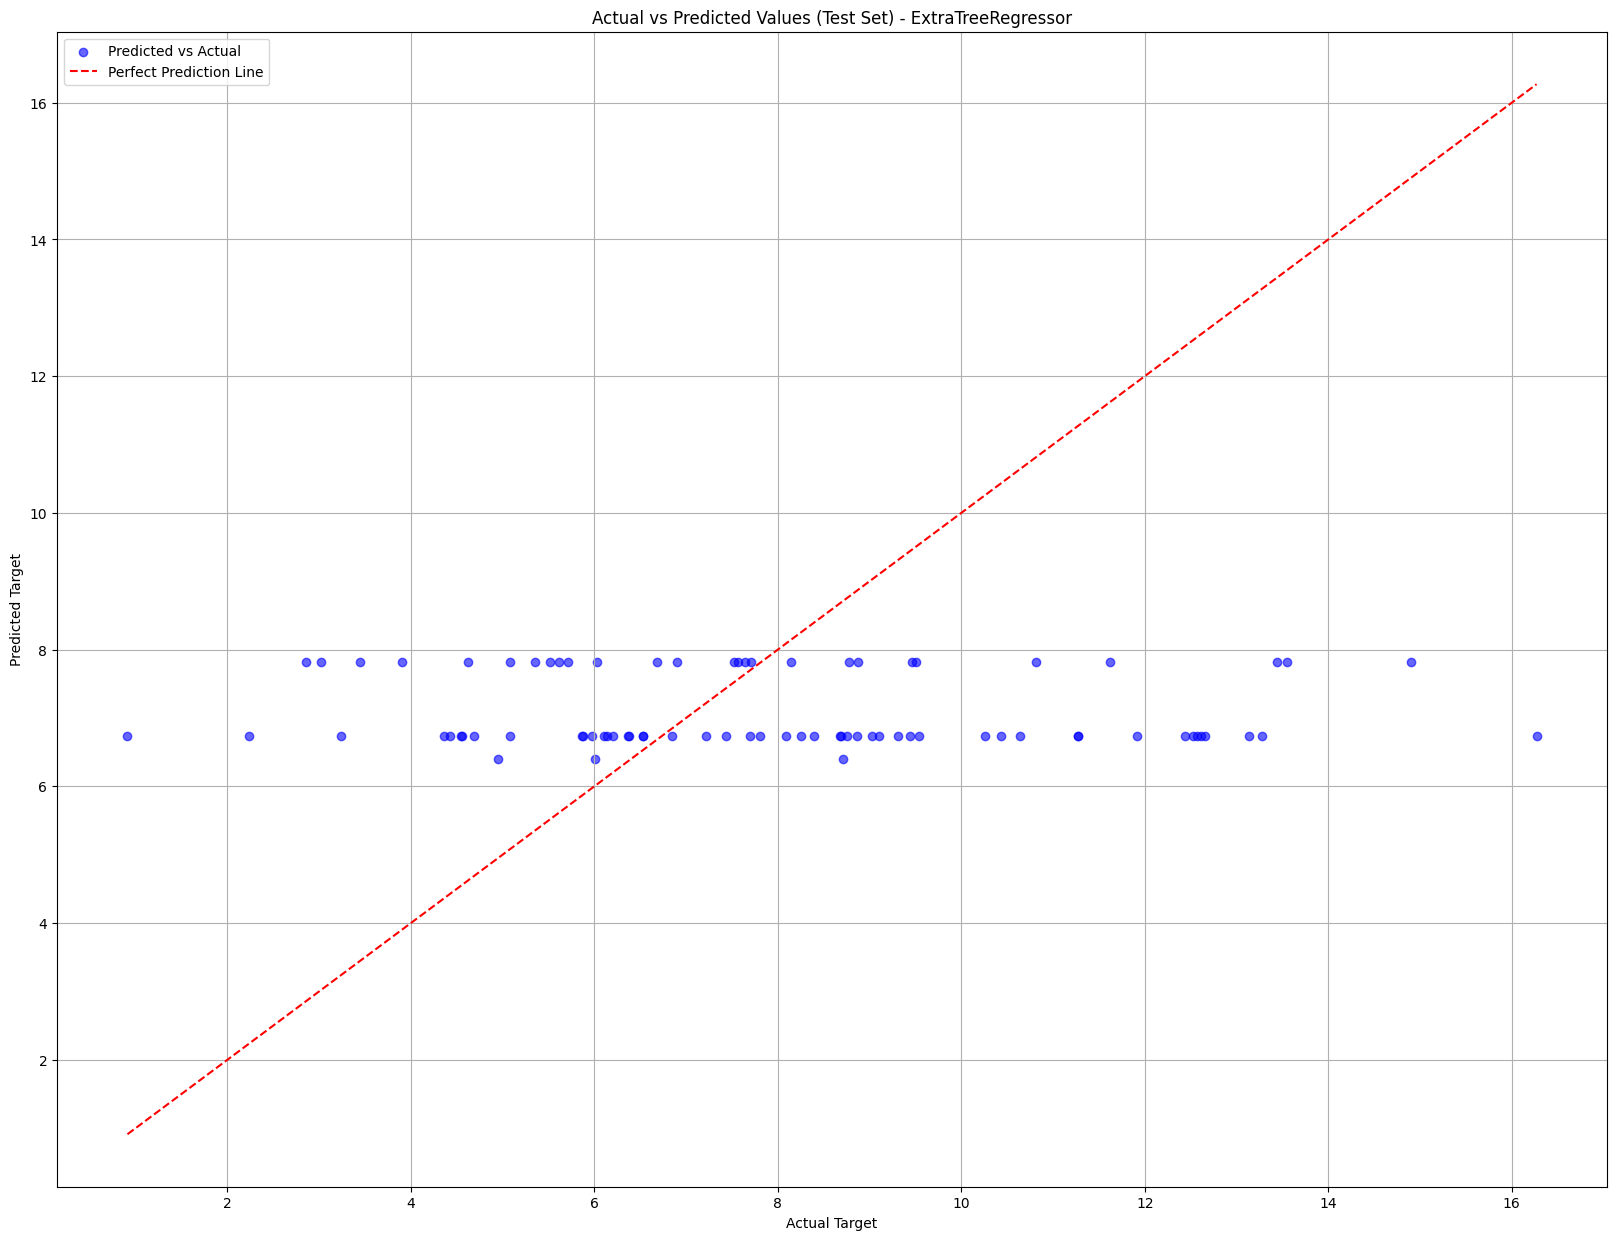

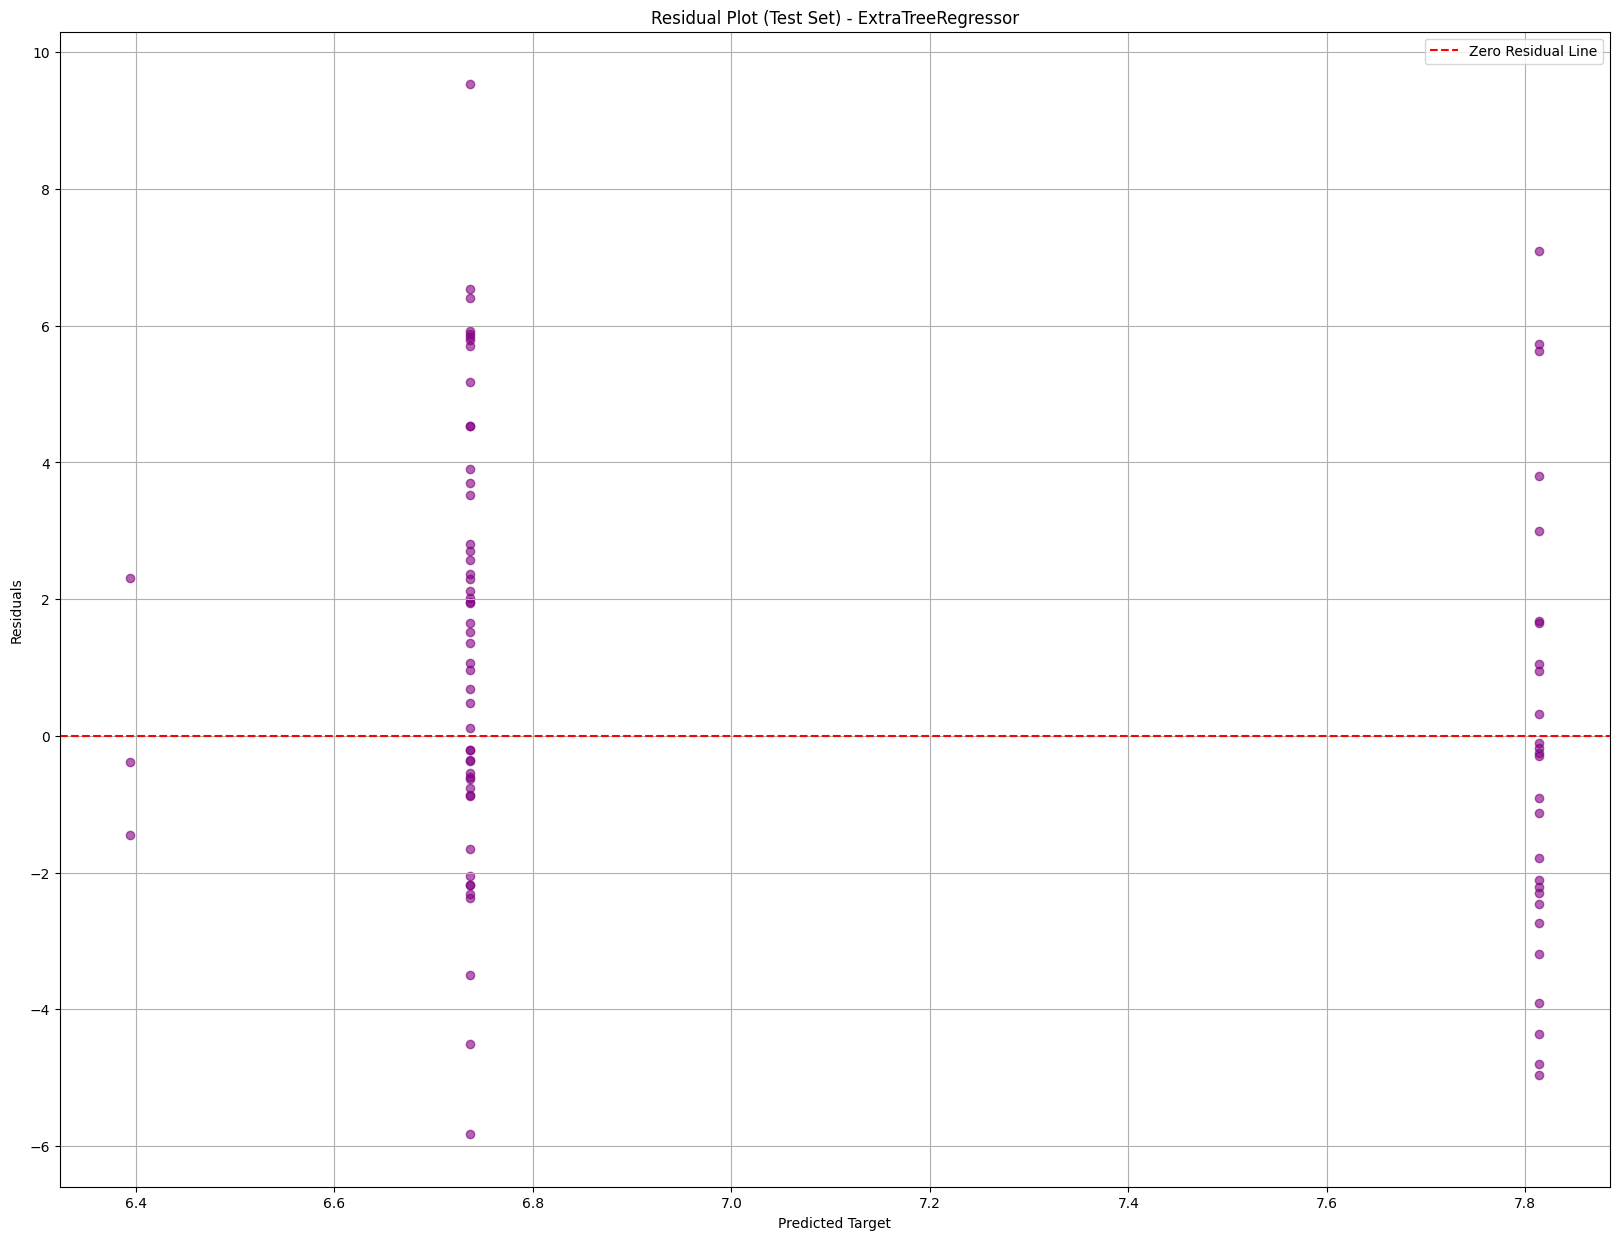

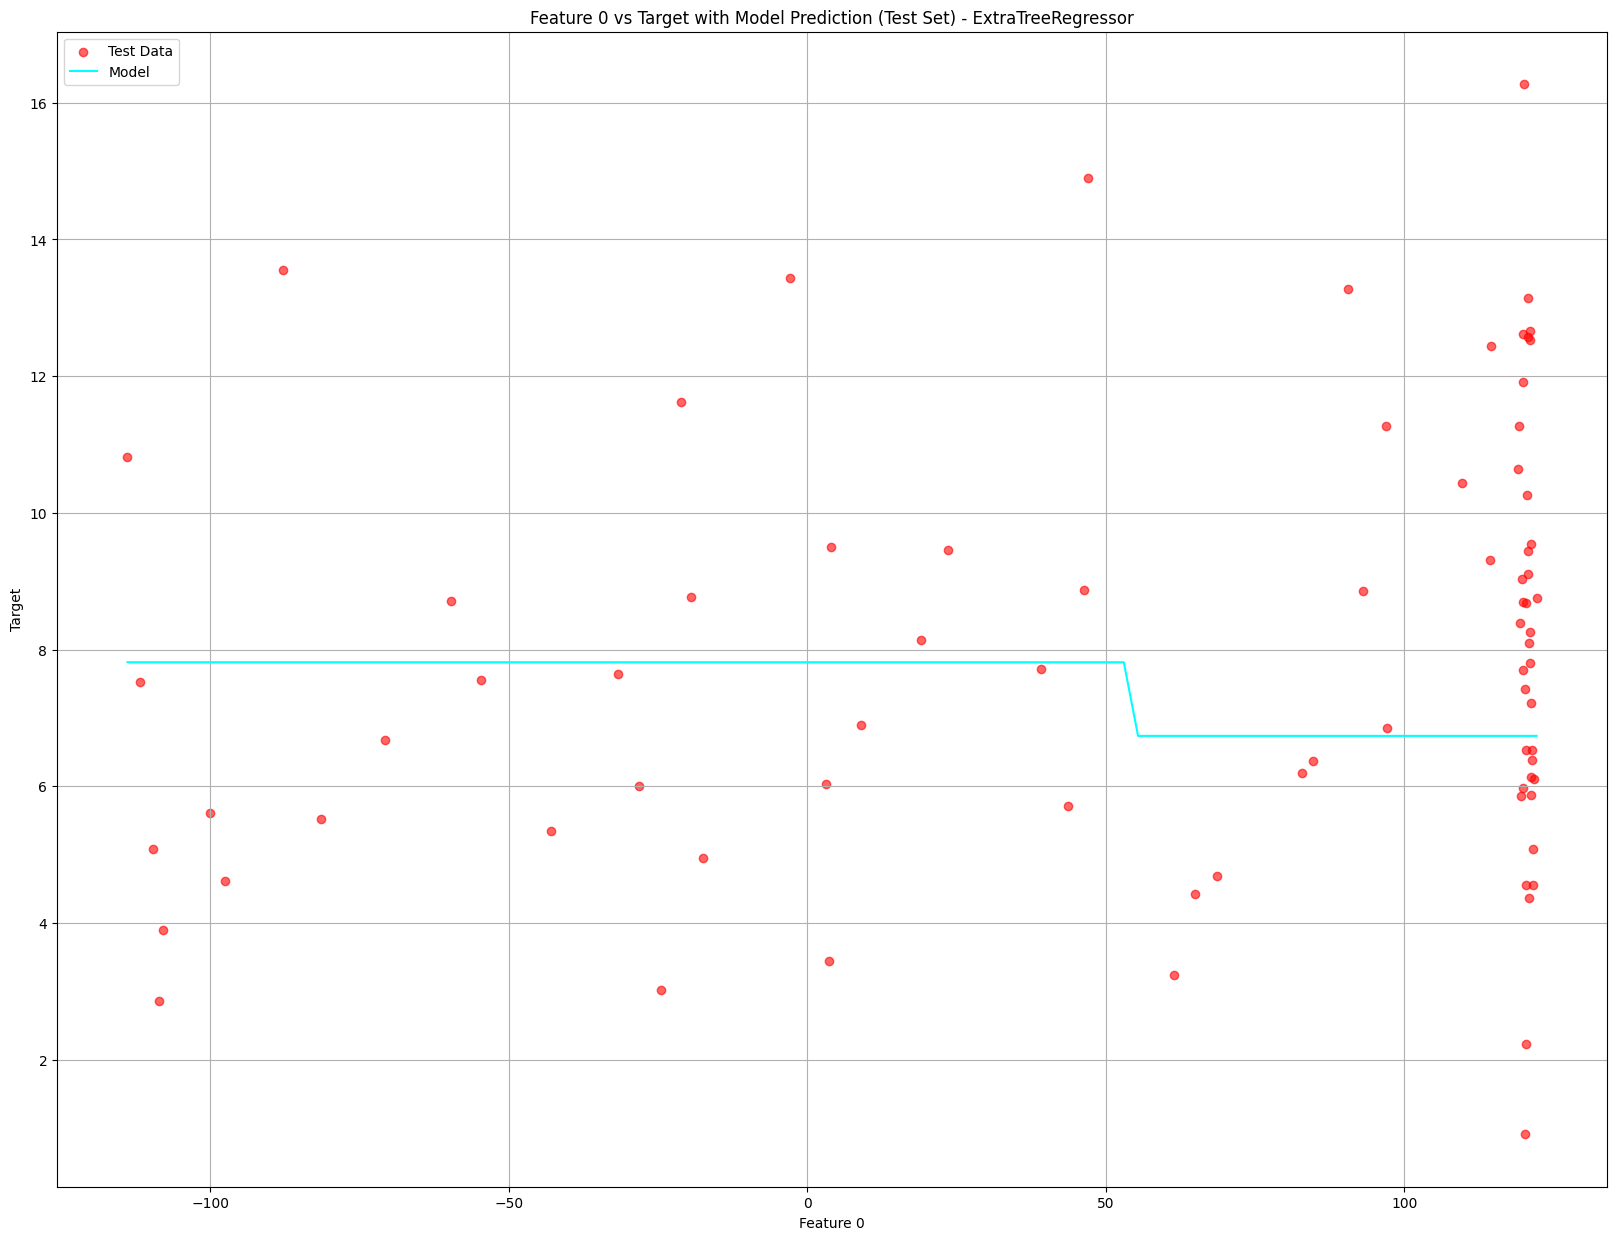

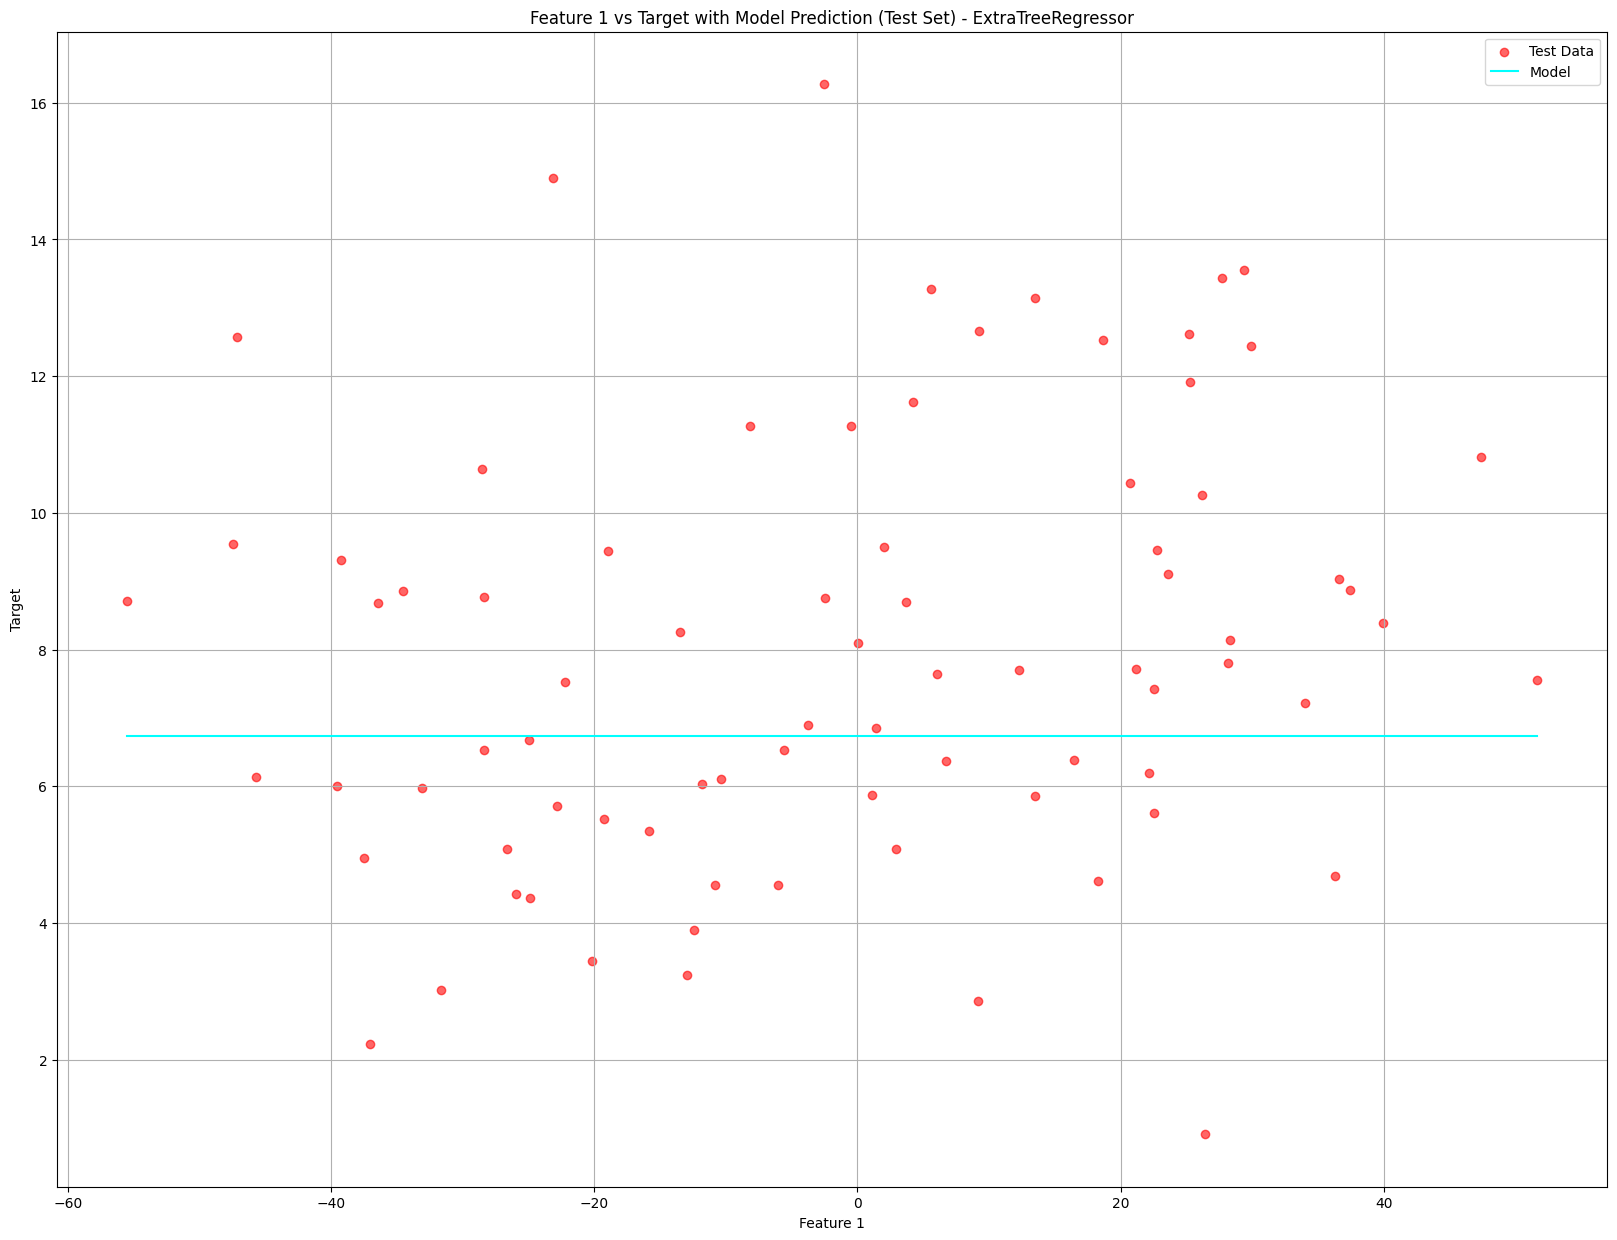

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming best_model is already defined with best hyperparameters from Optuna
# If not, initialize with best params (replace with actual best params from your study)
best_params = {
    'criterion': 'squared_error',
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'min_impurity_decrease': 0.05,
    'ccp_alpha': 0.01
}
best_model = ExtraTreeRegressor(random_state=42, **best_params)
best_model.fit(x_train, y_train)

# Make predictions on the test set
y_test_pred = best_model.predict(x_test)

# Evaluate the model
def evaluate_regression(y_true, y_pred, dataset_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_name} Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    return r2, mae, mse, rmse

# Evaluate on test set
evaluate_regression(y_test, y_test_pred, "Test Set")

# Visualization 1: Actual vs. Predicted Plot (Test Set)
plt.figure(figsize=(20, 15))
plt.scatter(y_test, y_test_pred, color="blue", label="Predicted vs Actual", alpha=0.6)
# Perfect prediction line as a reference (45-degree line)
plt.plot([min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())],
         [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Values (Test Set) - ExtraTreeRegressor")
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Residual Plot (Test Set)
residuals = y_test - y_test_pred
plt.figure(figsize=(20, 15))
plt.scatter(y_test_pred, residuals, color="purple", alpha=0.6)
# Horizontal line at zero for residuals
plt.axhline(y=0, color='r', linestyle='--', label="Zero Residual Line")
plt.xlabel("Predicted Target")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set) - ExtraTreeRegressor")
plt.legend()
plt.grid(True)
plt.show()

# Visualization 3: Feature 0 vs. Target with Model Line (Test Set)
# Use feature 0 (index 0)
feature_idx = 0
feature_name = f"Feature {feature_idx}" if not isinstance(x_test, pd.DataFrame) else x_test.columns[feature_idx]

# Convert x_test to numpy array if it's a DataFrame
x_test_array = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Scatter plot of feature 0 vs. target
plt.figure(figsize=(20, 15))
plt.scatter(x_test_array[:, feature_idx], y_test, color="red", label="Test Data", alpha=0.6)

# Generate points for the regression line
x_range = np.linspace(x_test_array[:, feature_idx].min(), x_test_array[:, feature_idx].max(), 100)

# Create an input array with the same number of features as x_test
x_full = np.zeros((100, x_test_array.shape[1]))
x_full[:, feature_idx] = x_range

# Fill the other features with their mean values from x_test
for i in range(x_test_array.shape[1]):
    if i != feature_idx:
        x_full[:, i] = x_test_array[:, i].mean()

# Predict on the generated points
y_pred_line = best_model.predict(x_full)

# Plot the model's predictions
plt.plot(x_range, y_pred_line, color="cyan", label="Model")
plt.xlabel(feature_name)
plt.ylabel("Target")
plt.title(f"{feature_name} vs Target with Model Prediction (Test Set) - ExtraTreeRegressor")
plt.legend()
plt.grid(True)
plt.show()

# Visualization 4: Feature 1 vs. Target with Model Line (Test Set)
# Use feature 1 (index 1)
feature_idx = 1
feature_name = f"Feature {feature_idx}" if not isinstance(x_test, pd.DataFrame) else x_test.columns[feature_idx]

# Convert x_test to numpy array if it's a DataFrame
x_test_array = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Scatter plot of feature 1 vs. target
plt.figure(figsize=(20, 15))
plt.scatter(x_test_array[:, feature_idx], y_test, color="red", label="Test Data", alpha=0.6)

# Generate points for the regression line
x_range = np.linspace(x_test_array[:, feature_idx].min(), x_test_array[:, feature_idx].max(), 100)

# Create an input array with the same number of features as x_test
x_full = np.zeros((100, x_test_array.shape[1]))
x_full[:, feature_idx] = x_range

# Fill the other features with their mean values from x_test
for i in range(x_test_array.shape[1]):
    if i != feature_idx:
        x_full[:, i] = x_test_array[:, i].mean()

# Predict on the generated points
y_pred_line = best_model.predict(x_full)

# Plot the model's predictions
plt.plot(x_range, y_pred_line, color="cyan", label="Model")
plt.xlabel(feature_name)
plt.ylabel("Target")
plt.title(f"{feature_name} vs Target with Model Prediction (Test Set) - ExtraTreeRegressor")
plt.legend()
plt.grid(True)
plt.show()